In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# load file into dataframe
data = pd.read_csv('crypto_combined_scaled.csv', index_col=0)
data = data.rename(columns={'Date':'date'})
data.head()

date     Price    Volume  Market_cap crypto_name  \
0  2019-06-21 -0.179309 -0.268262   -0.234533    Algorand   
1  2019-06-22 -0.179021 -0.239189   -0.233562    Algorand   
2  2019-06-23 -0.179207 -0.226184   -0.233797    Algorand   
3  2019-06-24 -0.179255 -0.234139   -0.233894    Algorand   
4  2019-06-25 -0.179345 -0.242704   -0.234003    Algorand   

   name_price_attention    return  
0             -0.366125 -0.009700  
1             -0.499227  0.996449  
2             -0.376773 -0.338734  
3             -0.499227 -0.133554  
4             -0.499227 -0.275601

In [14]:
# summary statistics
data.describe()

Price        Volume    Market_cap  name_price_attention  \
count  5.282000e+04  5.212600e+04  5.111700e+04          5.289200e+04   
mean   5.380861e-17  6.106802e-17  1.779241e-17          5.857155e-17   
std    1.000009e+00  1.000010e+00  1.000010e+00          1.000009e+00   
min   -1.796038e-01 -2.683704e-01 -2.345328e-01         -4.992271e-01   
25%   -1.795852e-01 -2.628819e-01 -2.295596e-01         -4.992271e-01   
50%   -1.791879e-01 -2.393593e-01 -2.055666e-01         -4.033936e-01   
75%   -1.751885e-01 -1.490563e-01 -1.513045e-01          1.987096e-02   
max    1.224704e+01  2.889007e+01  1.204508e+01          8.374243e+00   

             return  
count  5.289200e+04  
mean   1.094858e-17  
std    1.000009e+00  
min   -1.035640e+00  
25%   -3.531427e-02  
50%   -9.700294e-03  
75%    1.622017e-02  
max    2.246303e+02

In [15]:
#adding the dummy variable for covid. 

split_date = '2020-01-01'
data['Post-covid'] = (data['date'] >= split_date).astype(int)
#data['Post-covid'] = (df_lag.index >= split_date).astype(int)

data.head()

date     Price    Volume  Market_cap crypto_name  \
0  2019-06-21 -0.179309 -0.268262   -0.234533    Algorand   
1  2019-06-22 -0.179021 -0.239189   -0.233562    Algorand   
2  2019-06-23 -0.179207 -0.226184   -0.233797    Algorand   
3  2019-06-24 -0.179255 -0.234139   -0.233894    Algorand   
4  2019-06-25 -0.179345 -0.242704   -0.234003    Algorand   

   name_price_attention    return  Post-covid  
0             -0.366125 -0.009700           0  
1             -0.499227  0.996449           0  
2             -0.376773 -0.338734           0  
3             -0.499227 -0.133554           0  
4             -0.499227 -0.275601           0

# Visualizations

1. Time series of price and attention proxies
    * Time series for each stock 
    * Time series pre and post covid
    * Time series per industry
    * Quarterly and Monthly look
2. Distributions of dependend and independent variables 
3. Scatter plots with the Relationships 

### 1. Time Series Analysis

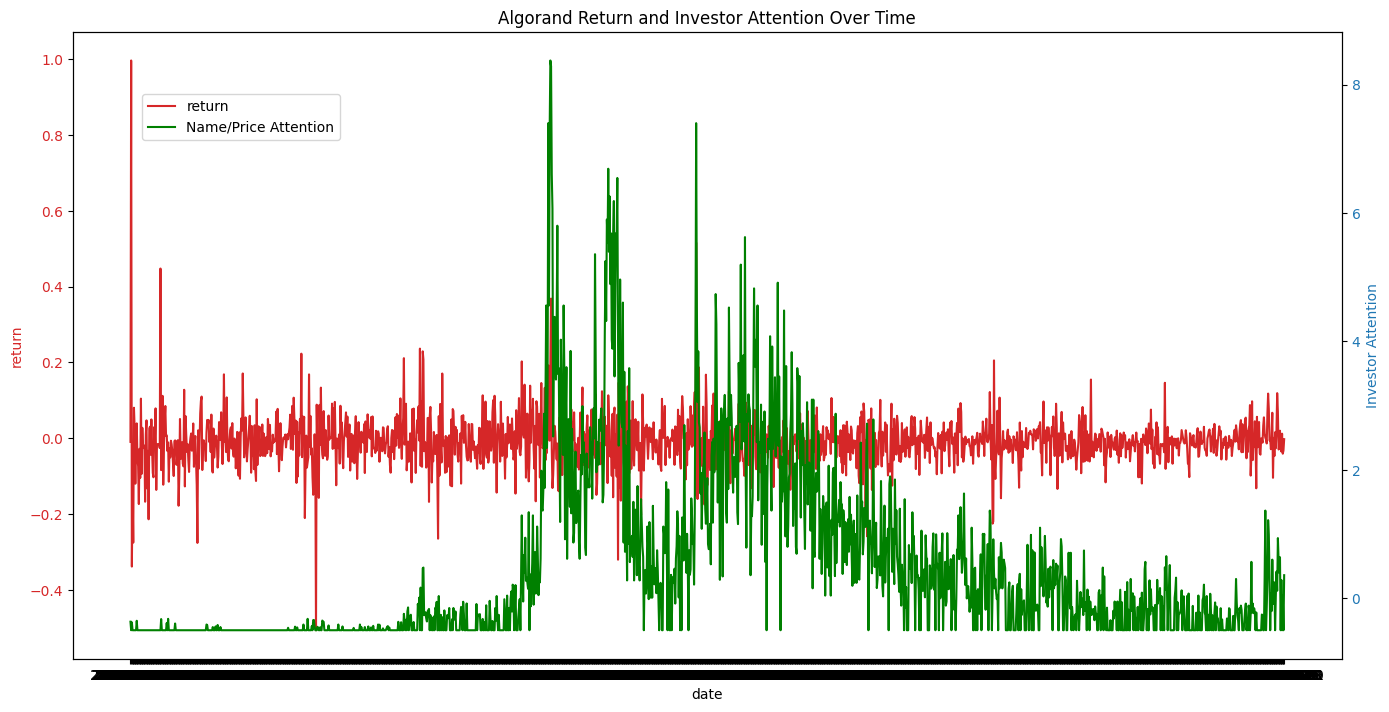

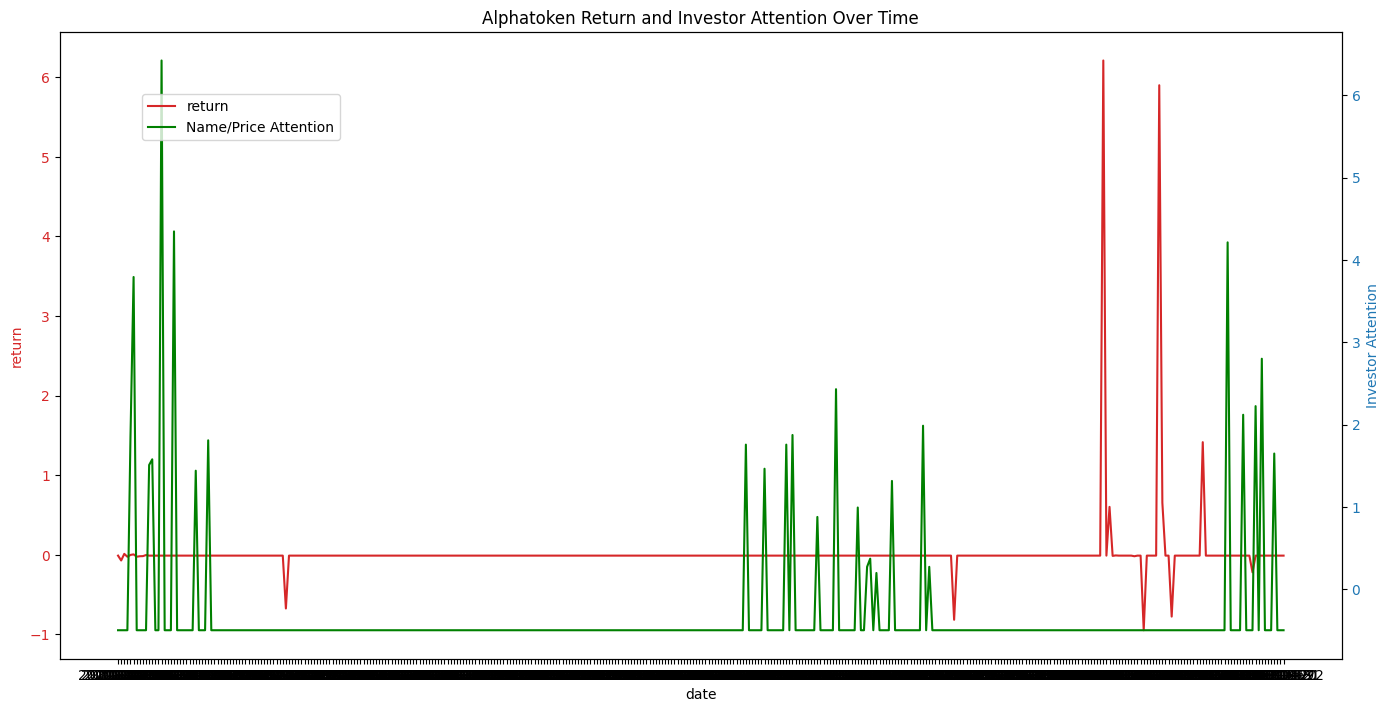

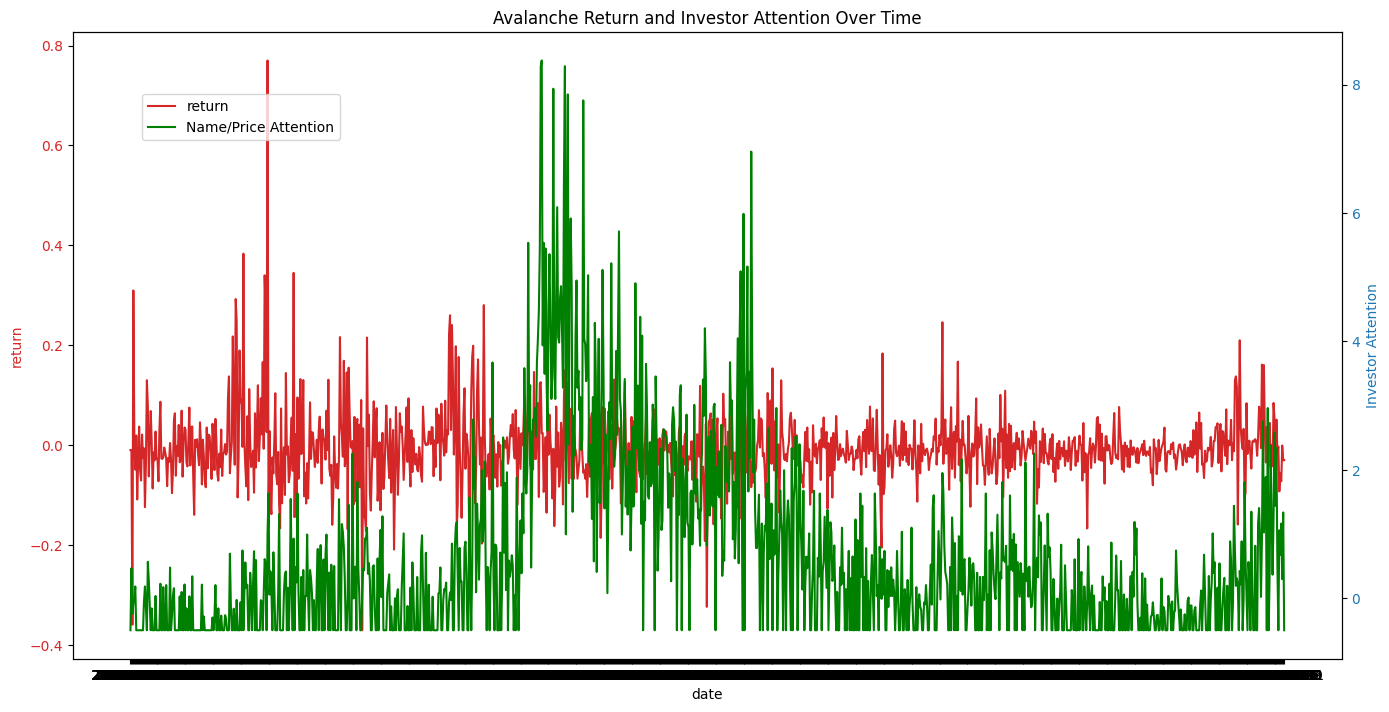

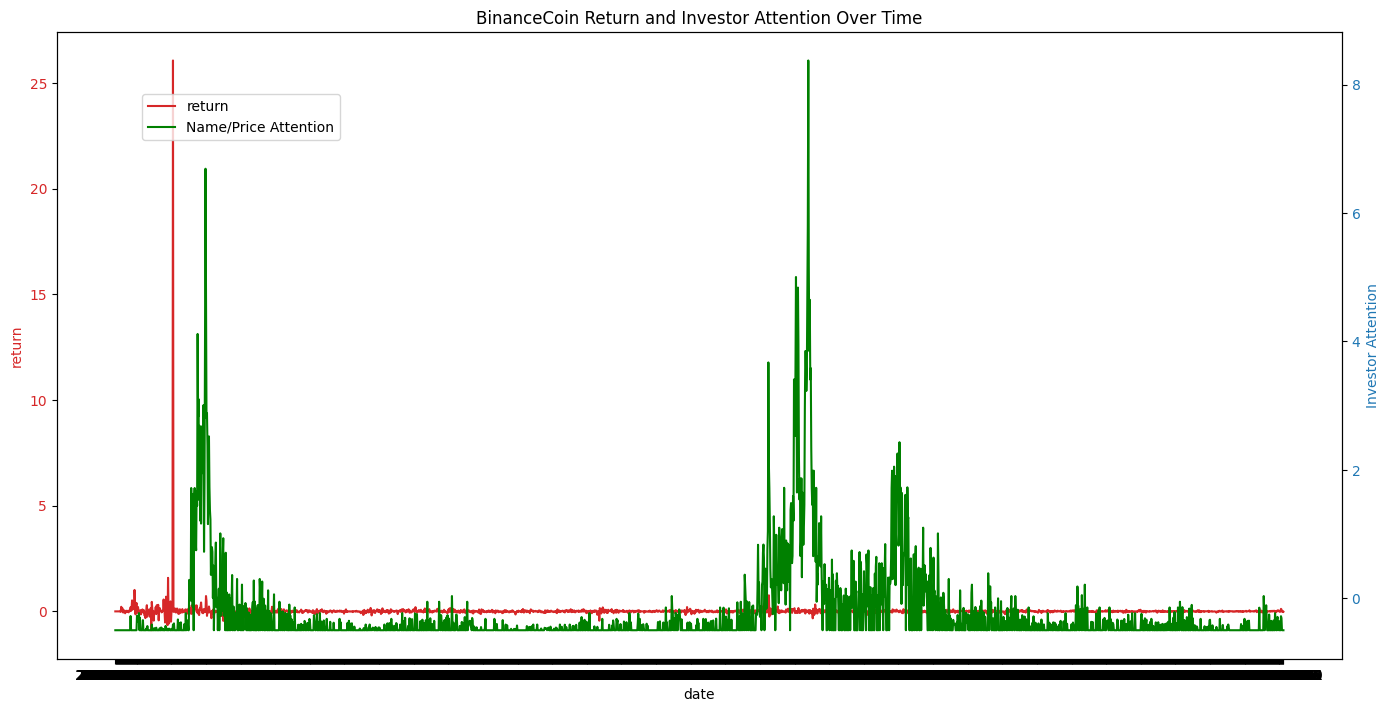

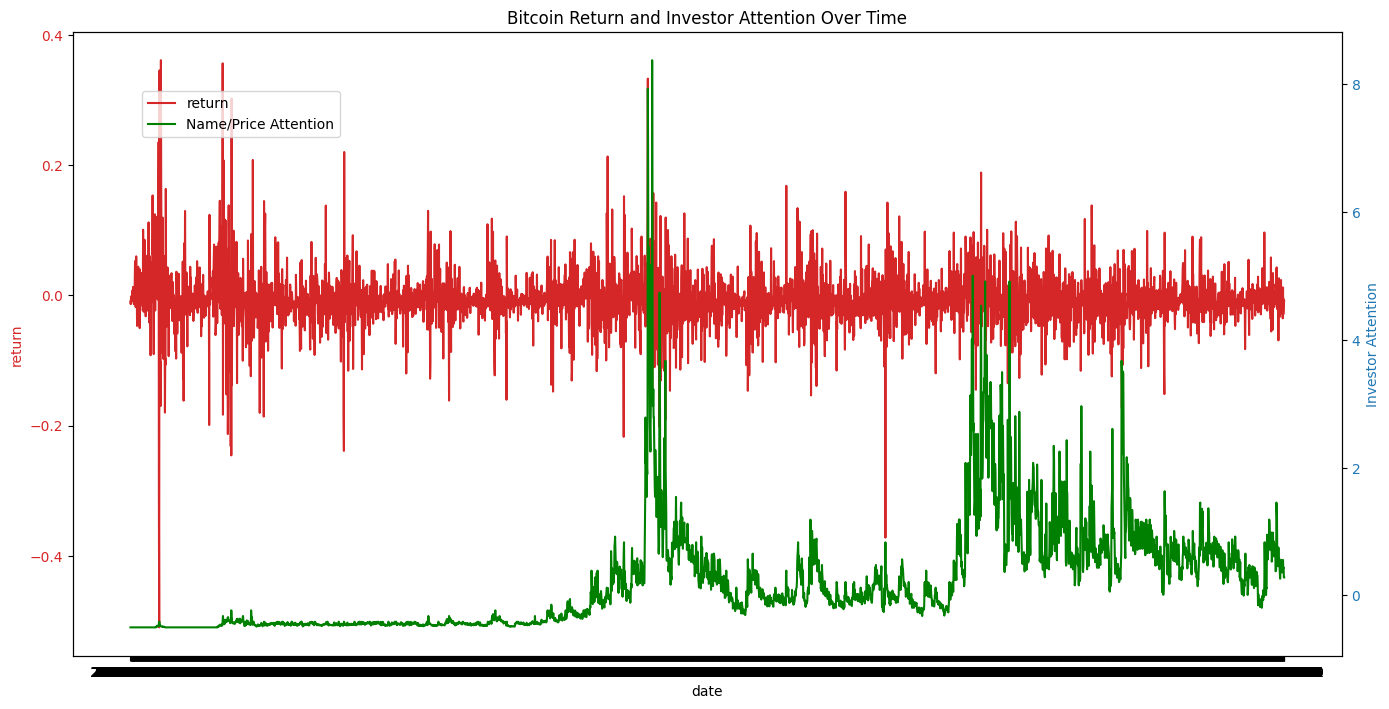

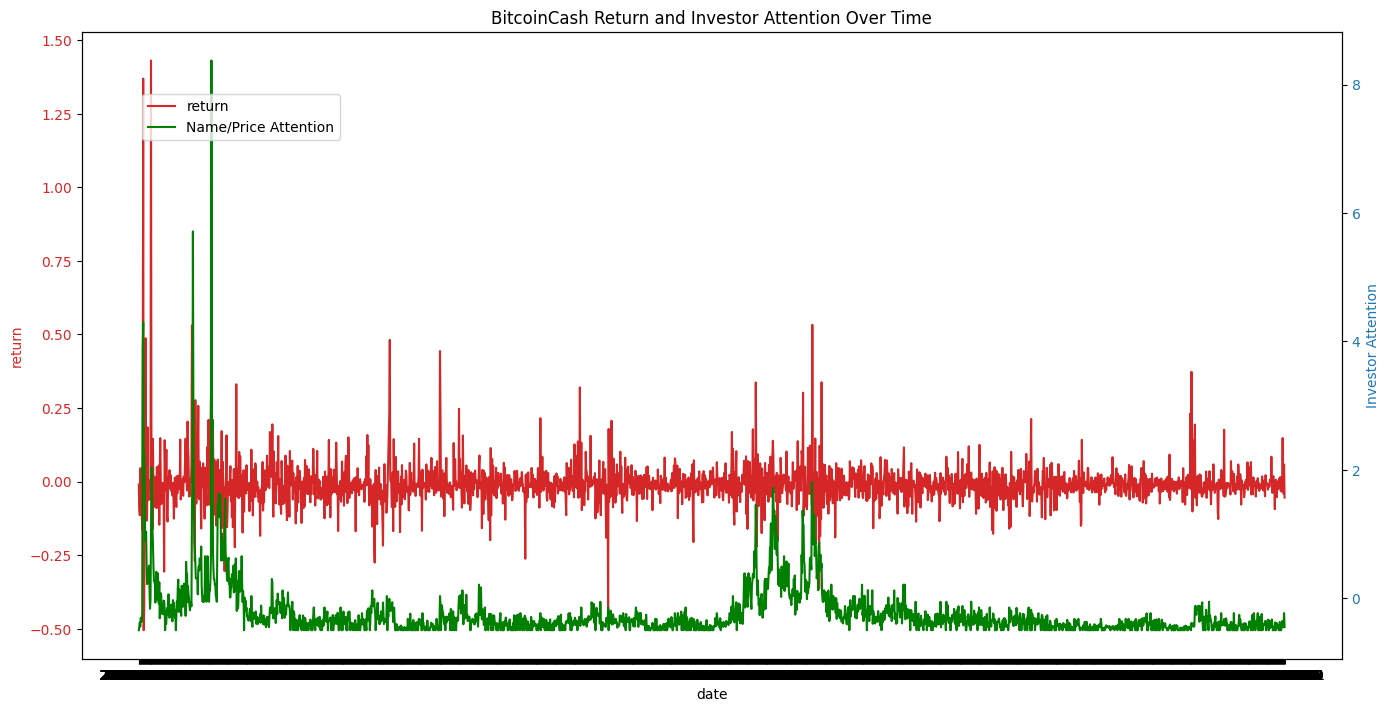

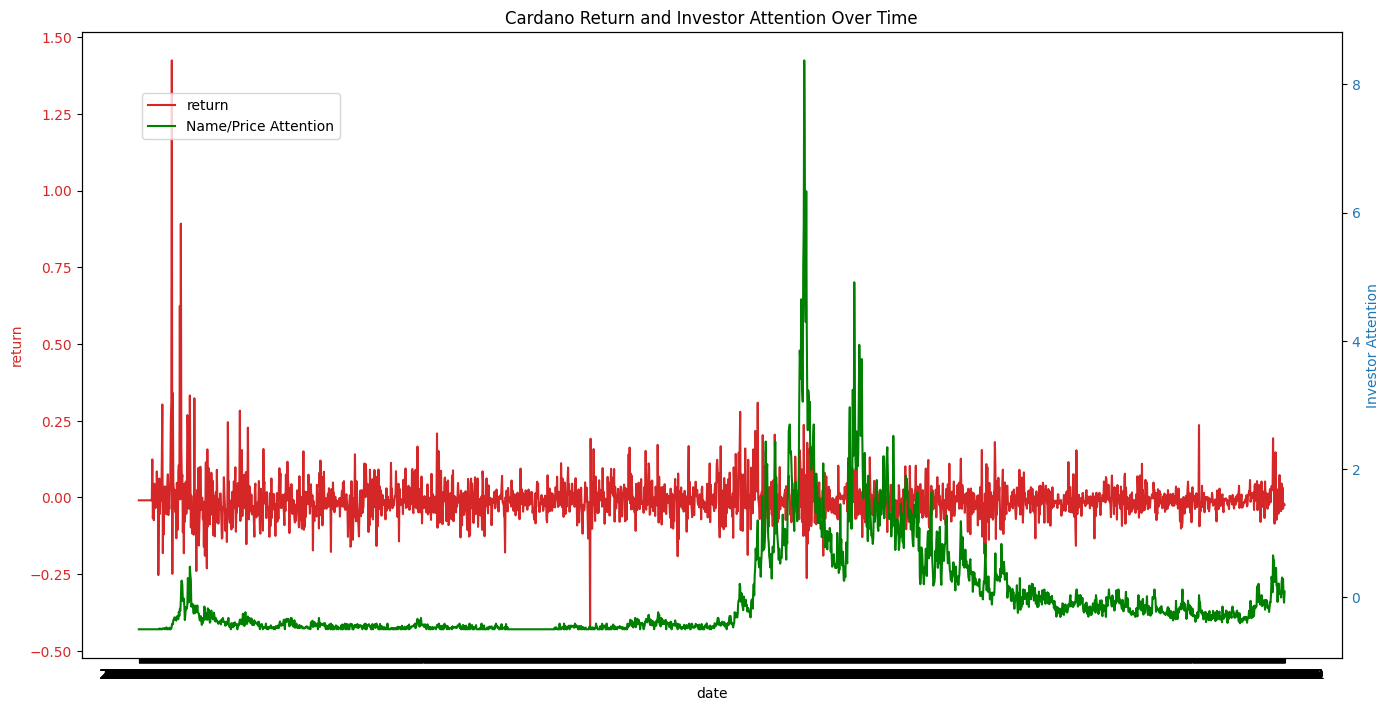

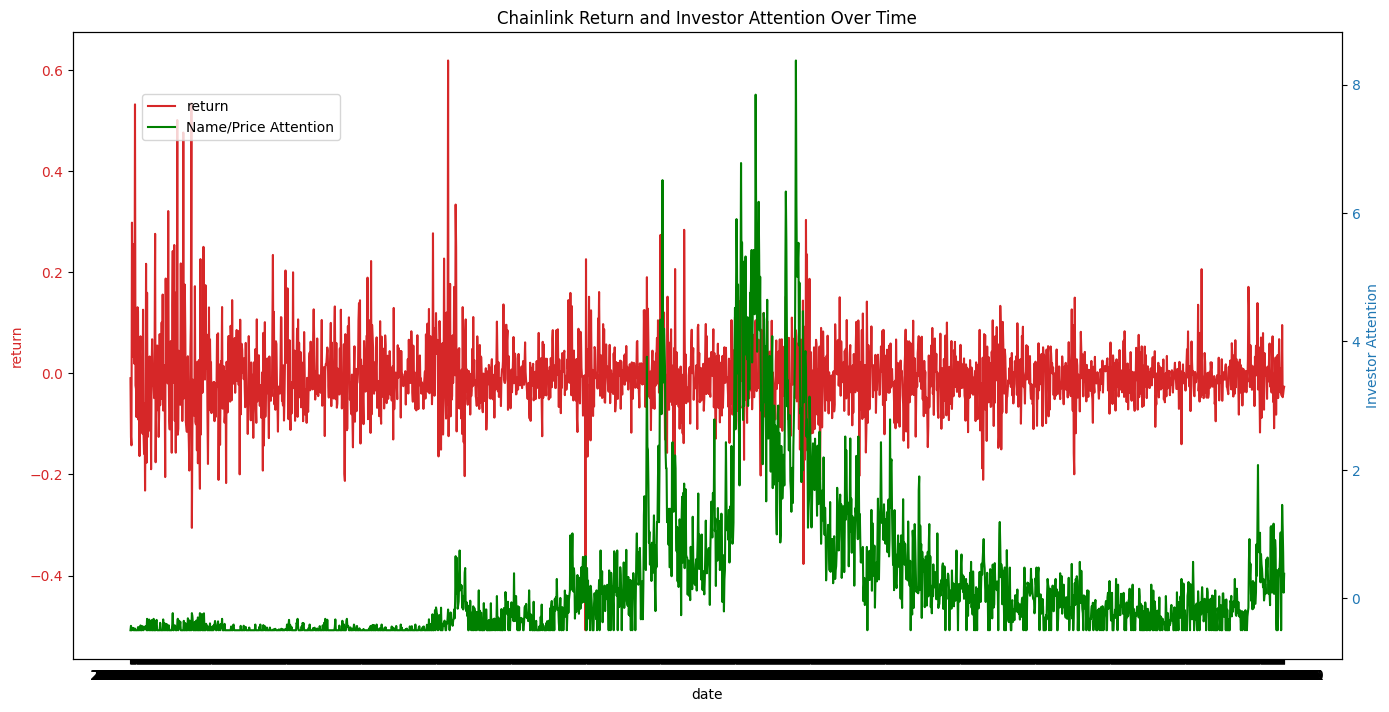

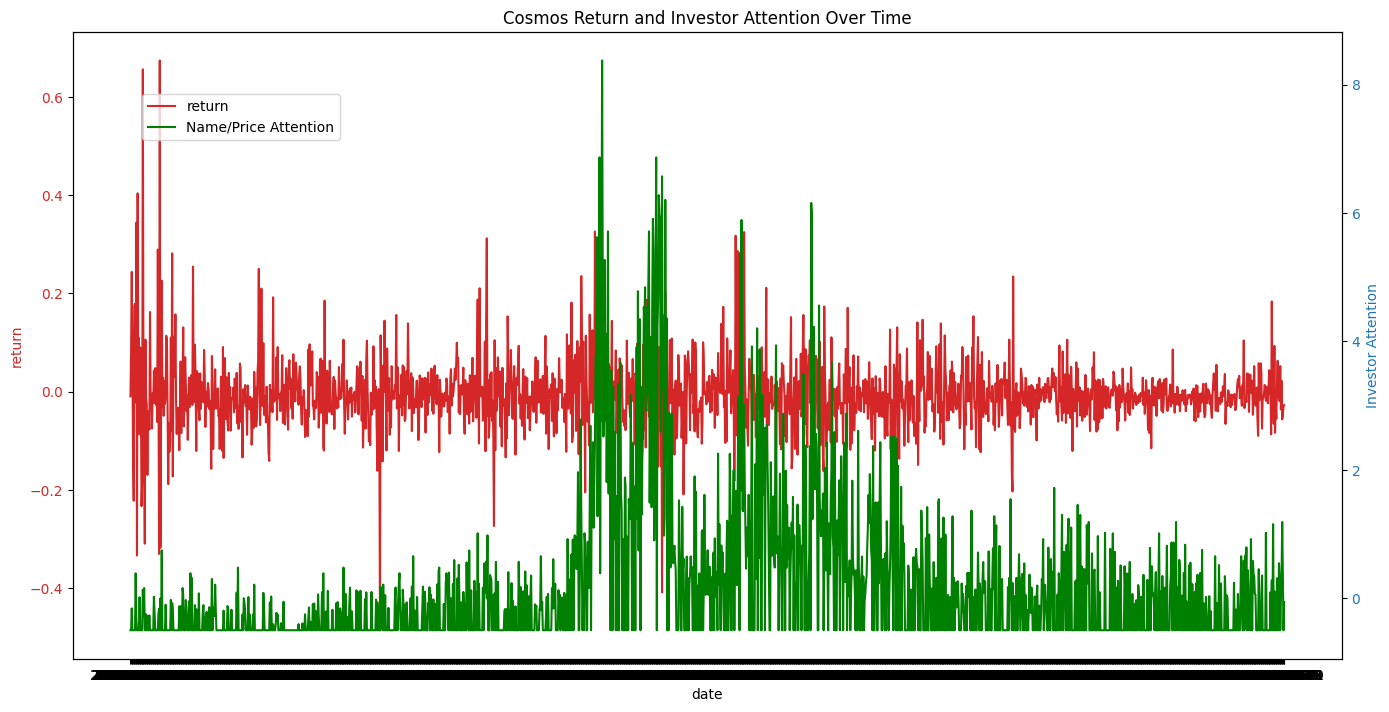

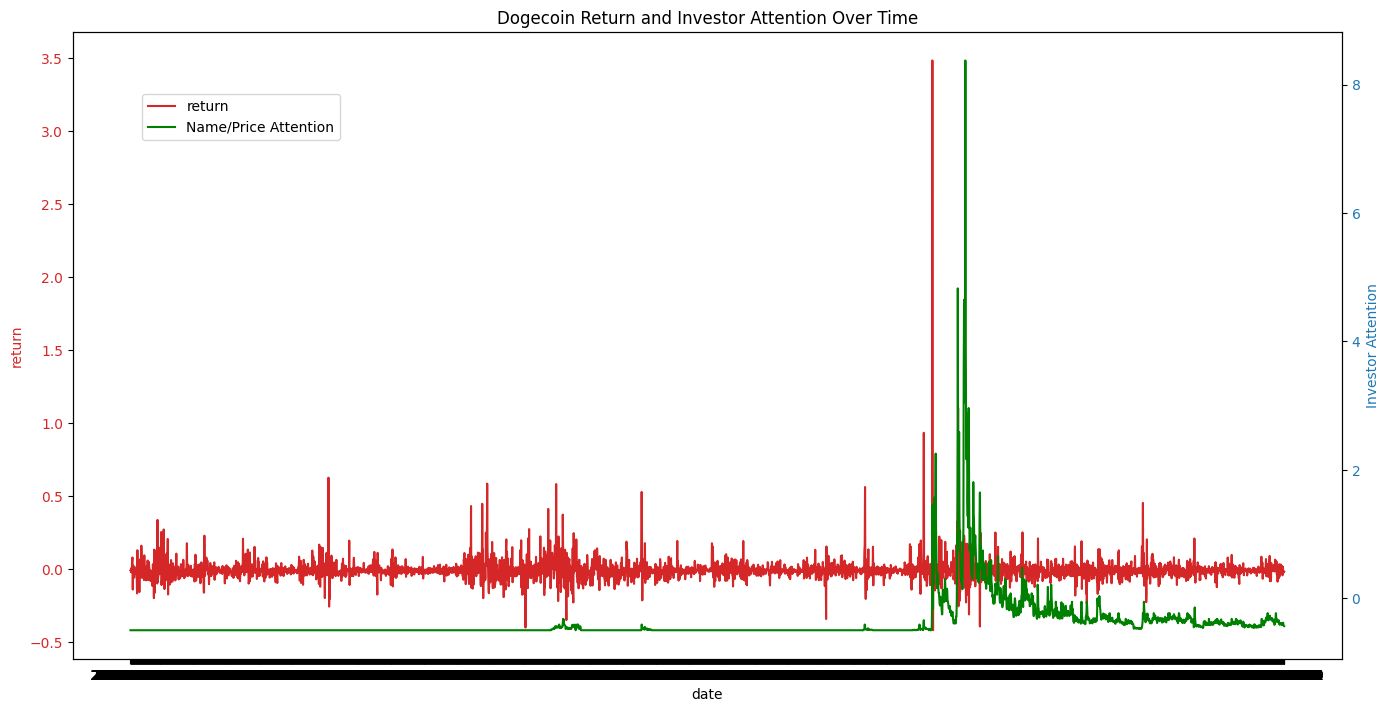

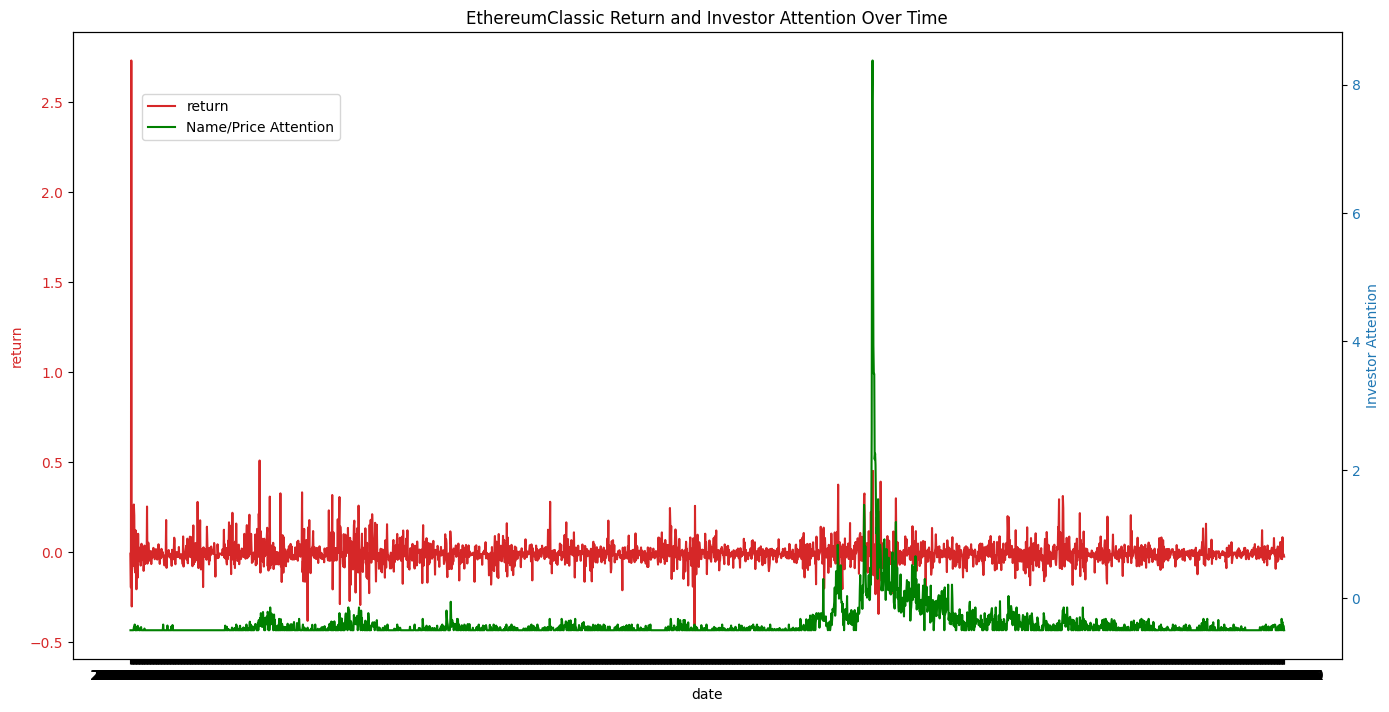

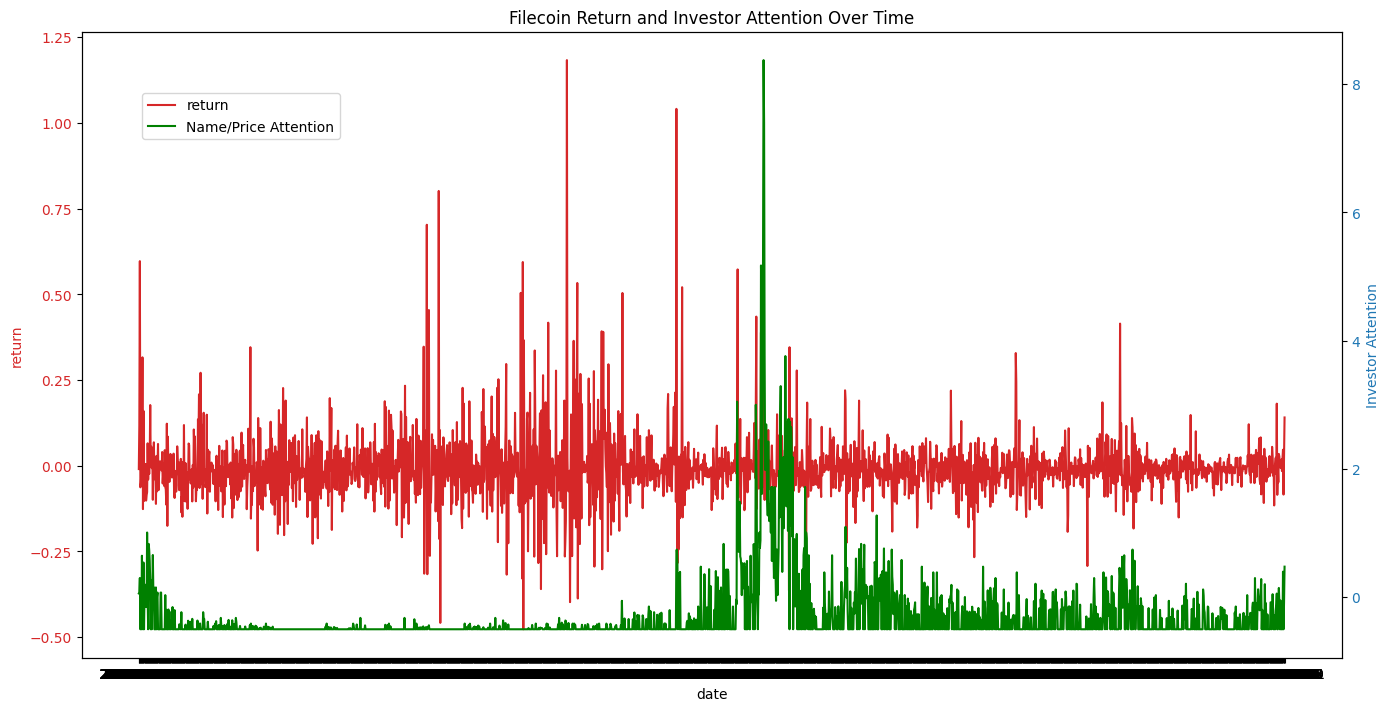

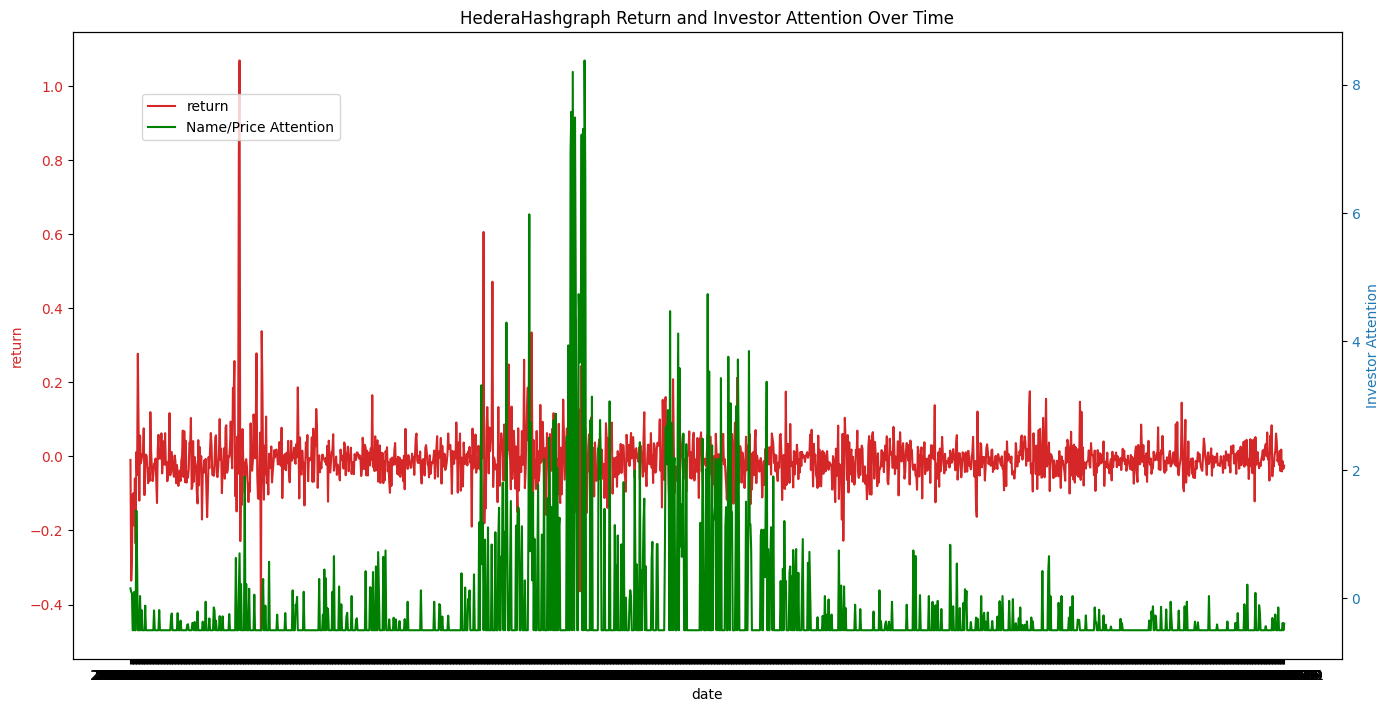

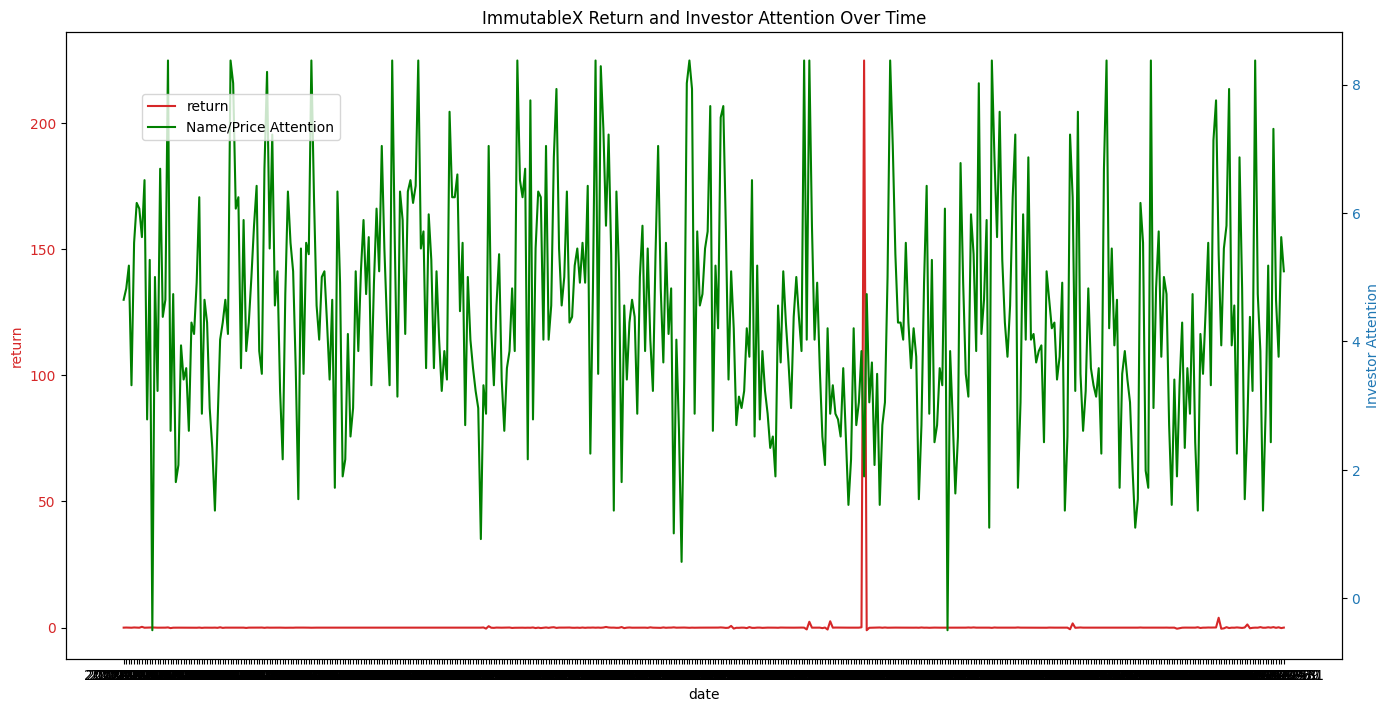

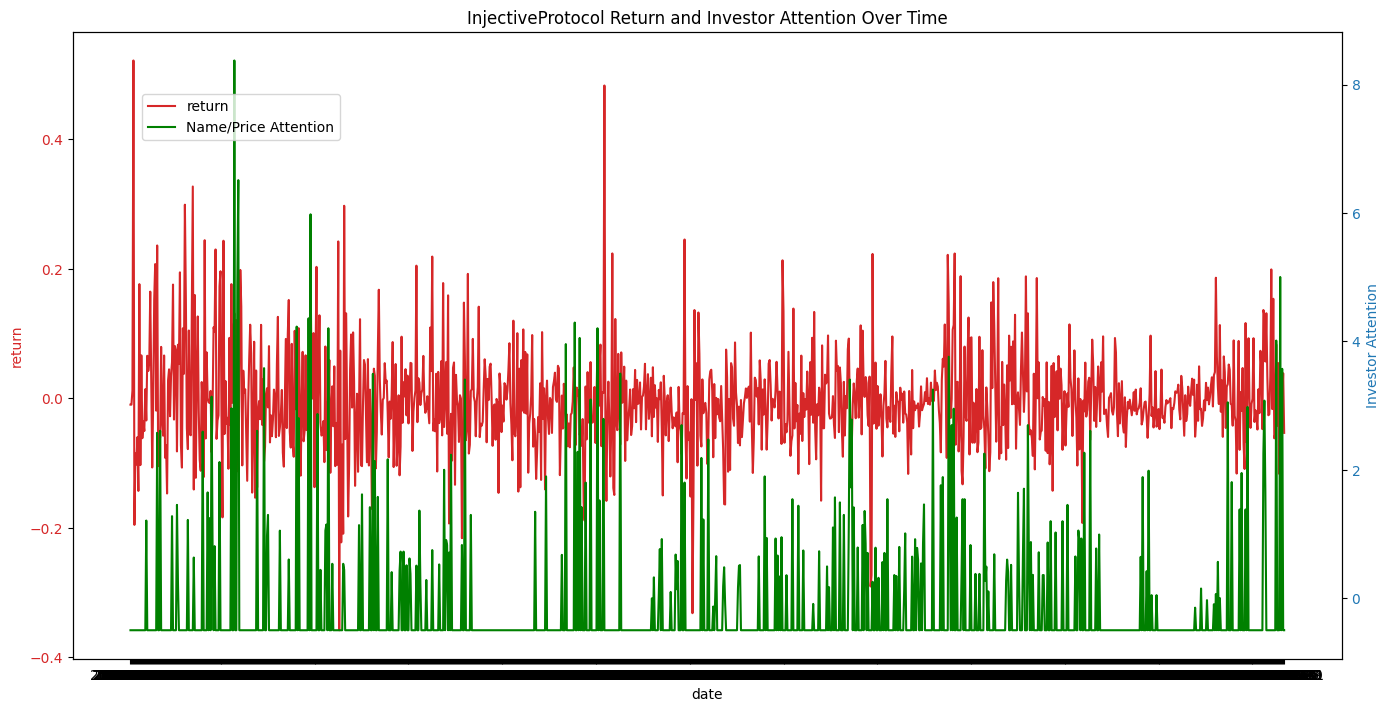

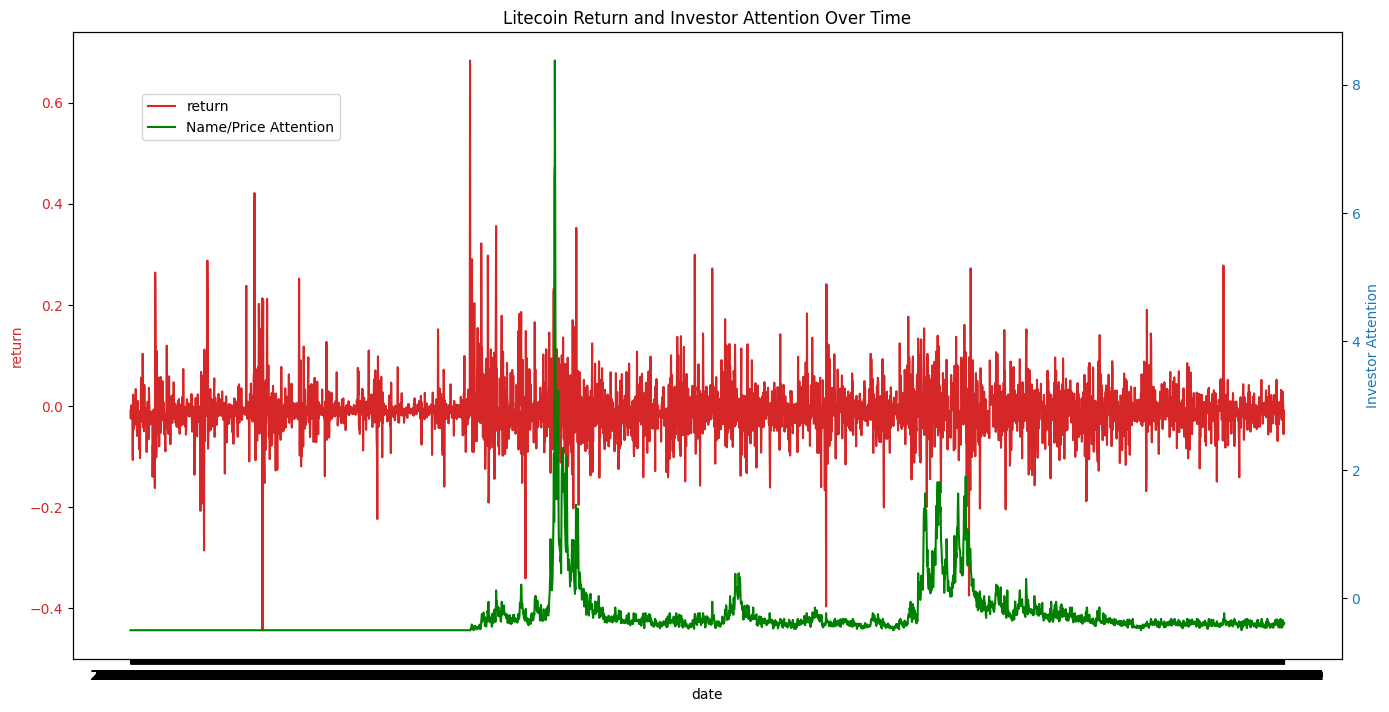

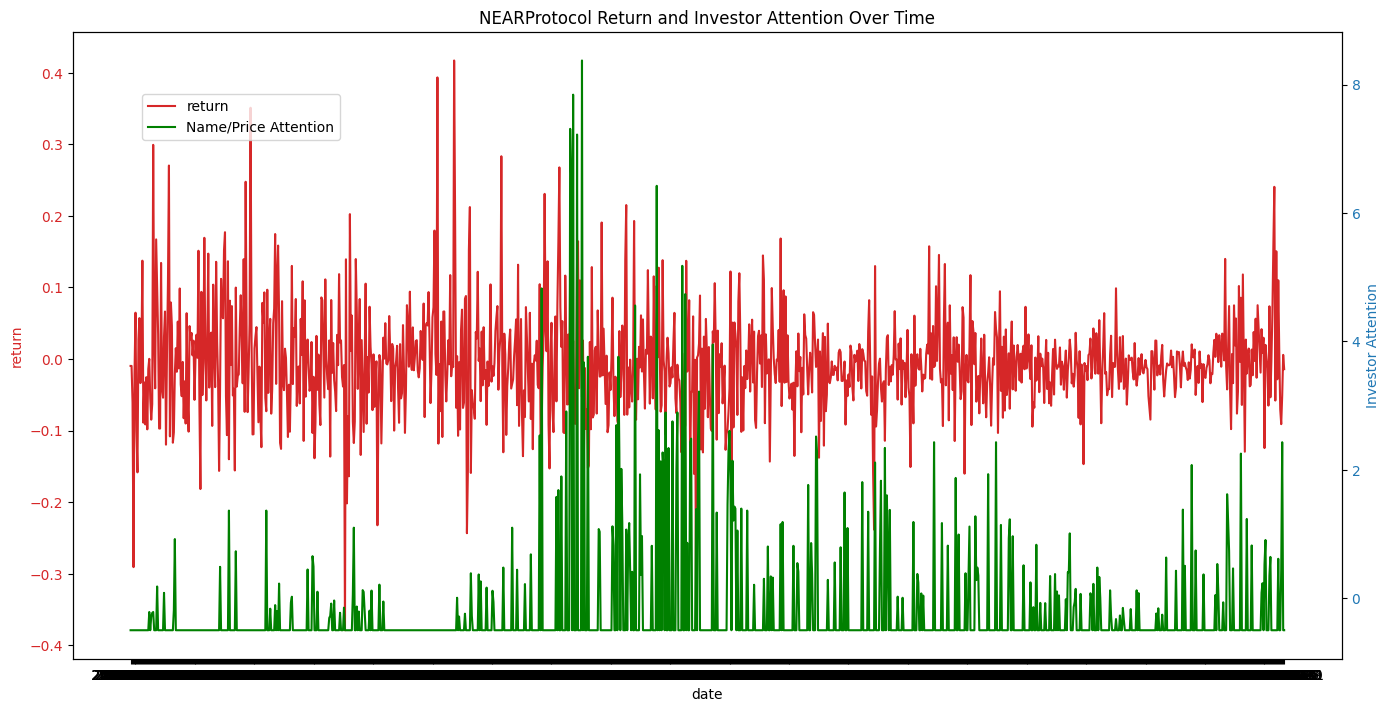

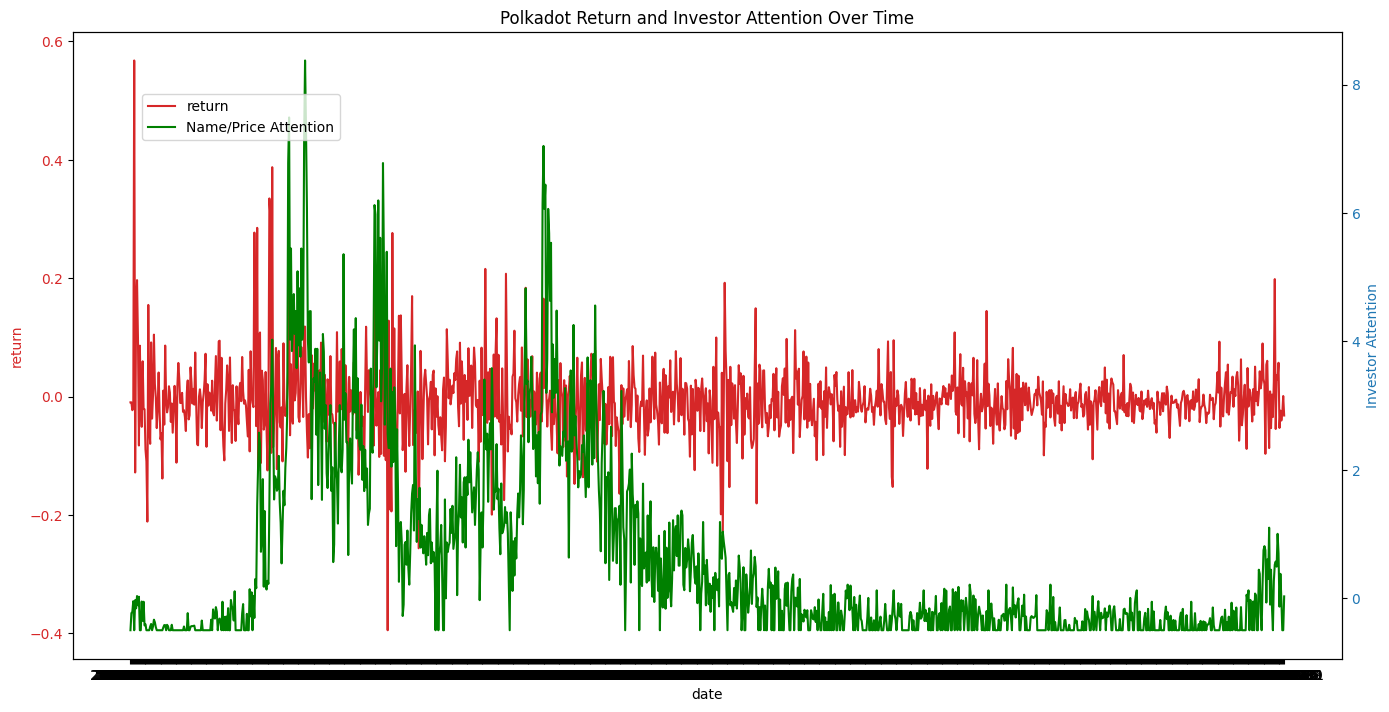

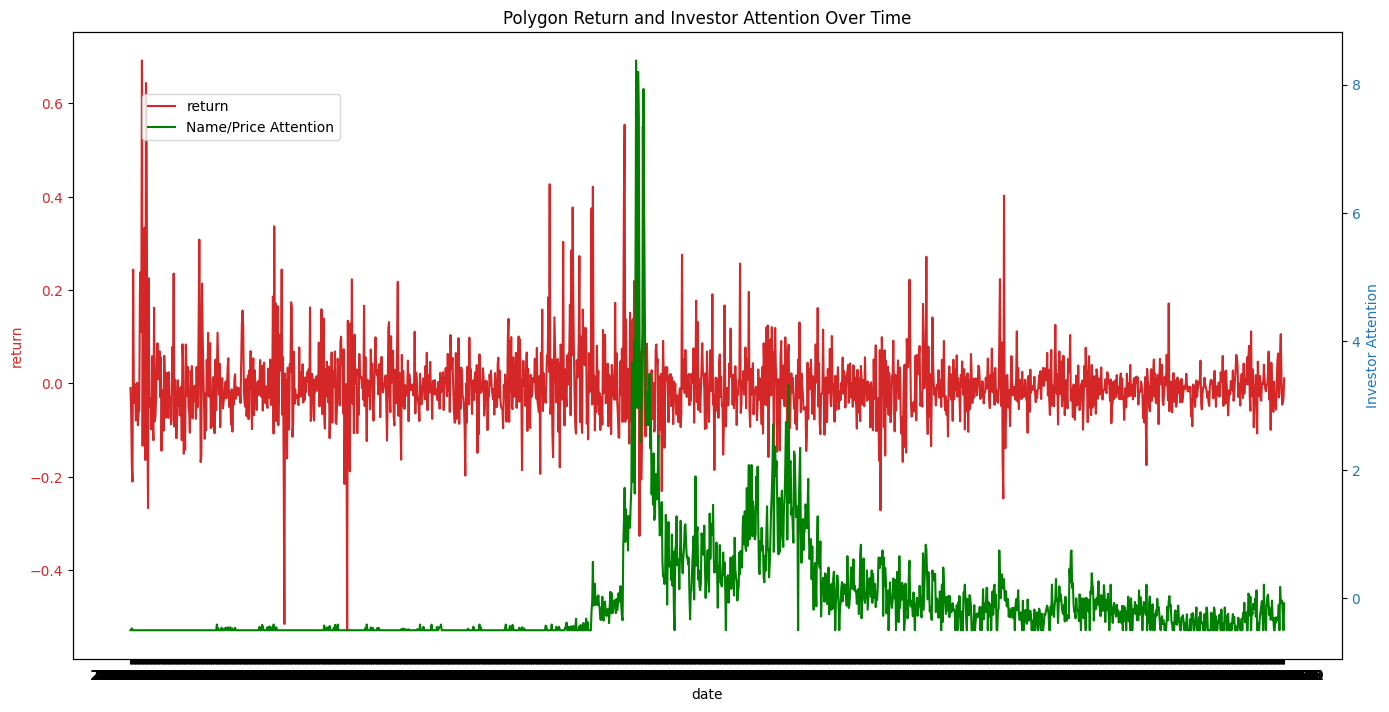

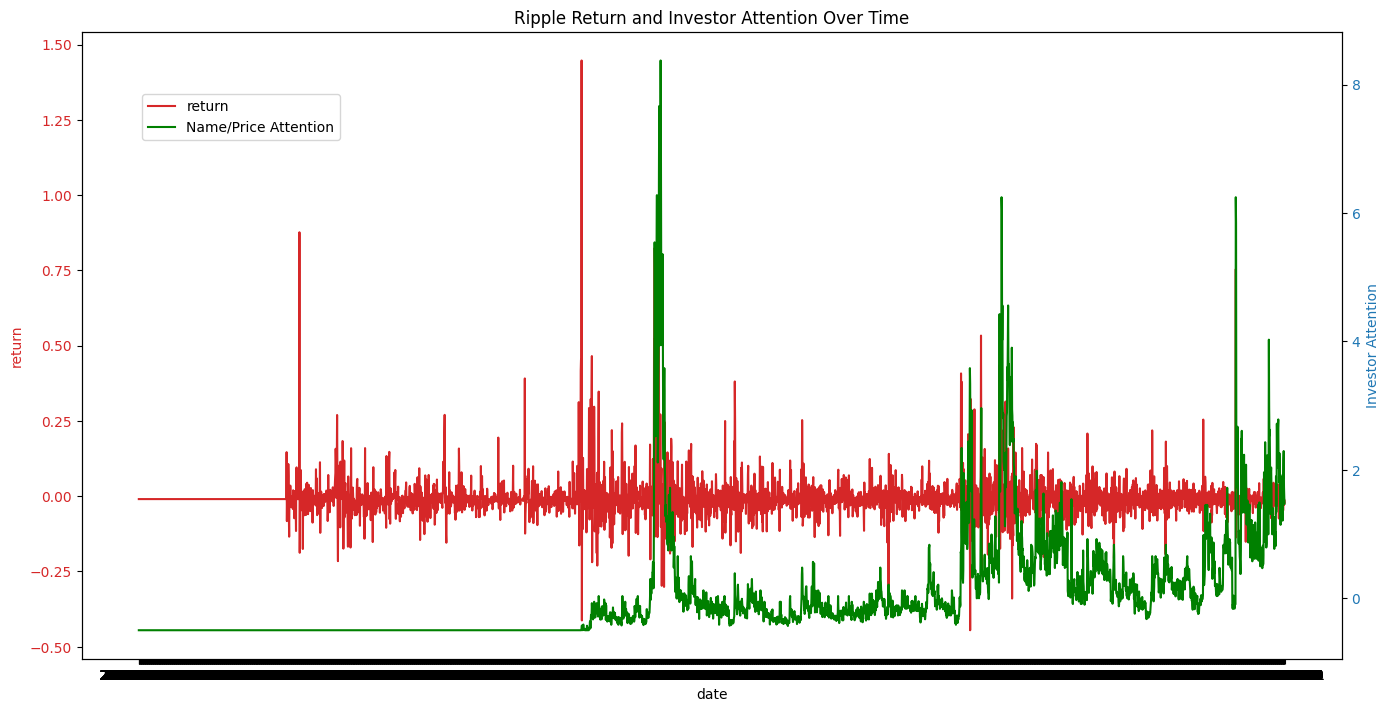

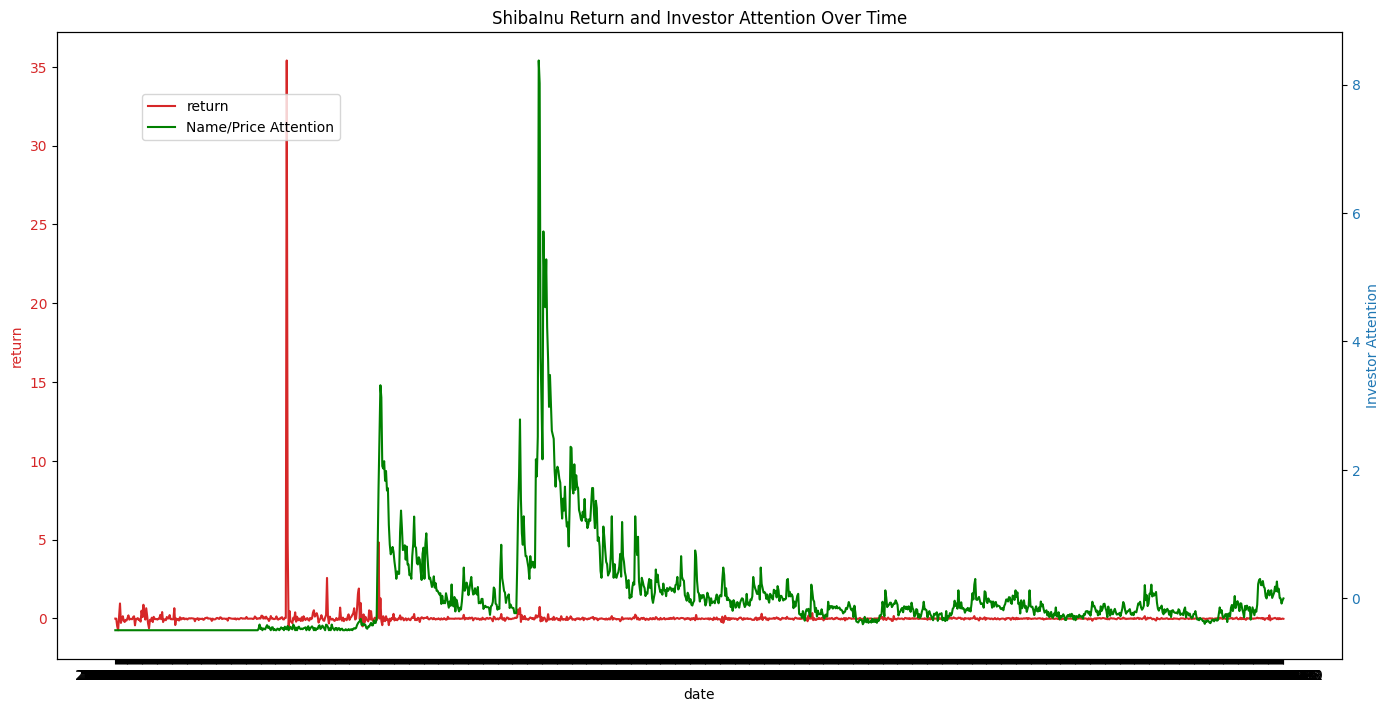

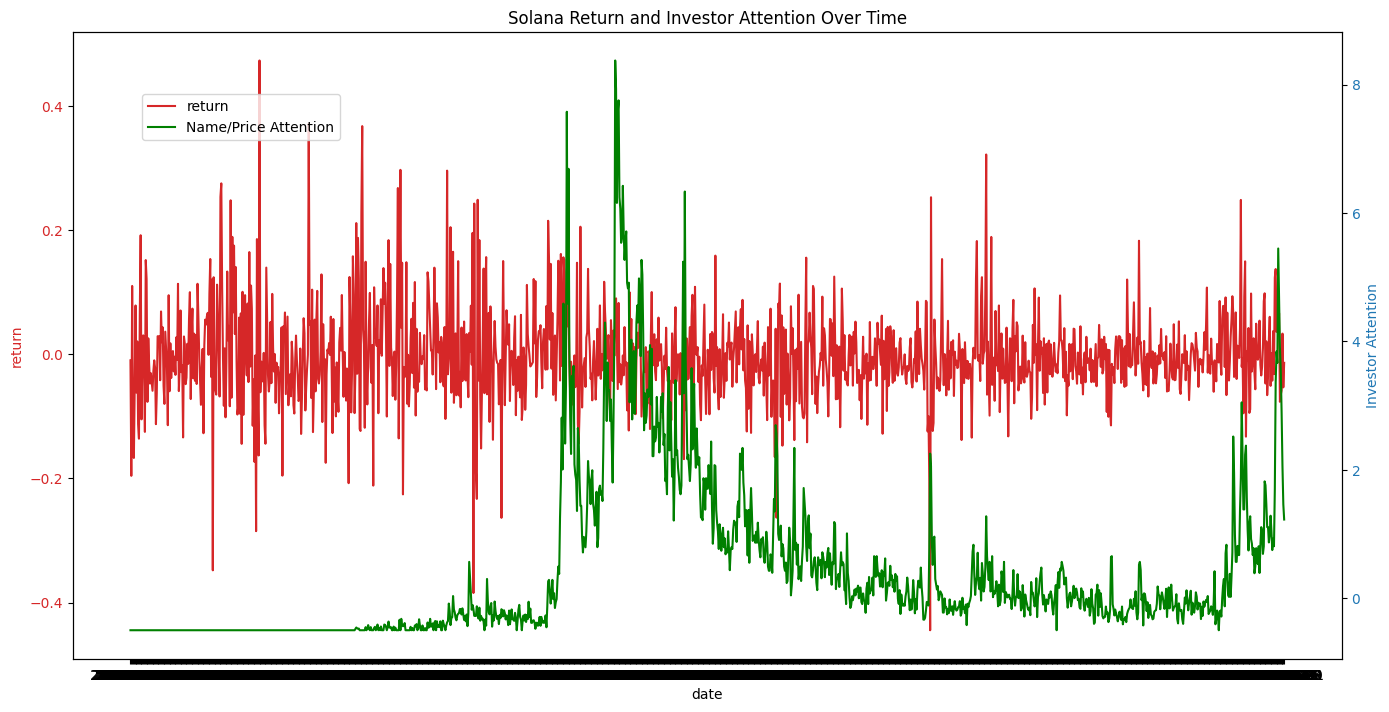

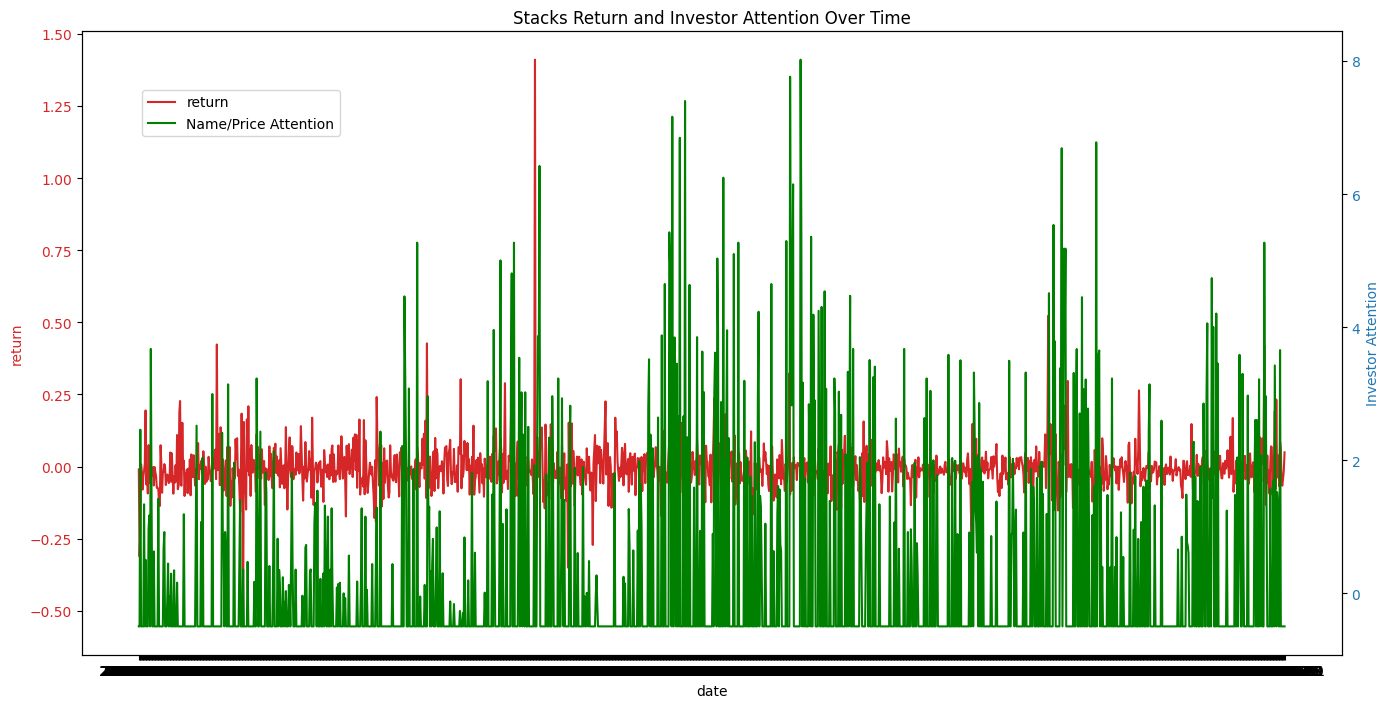

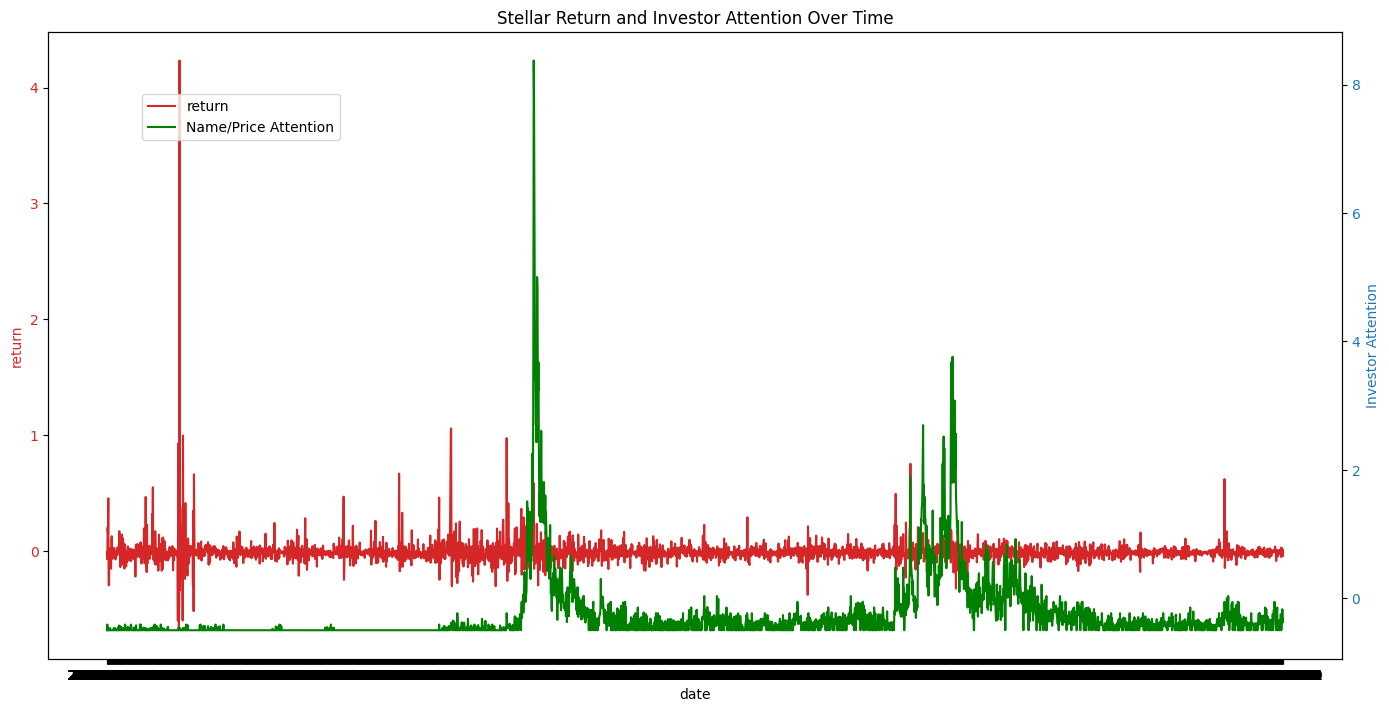

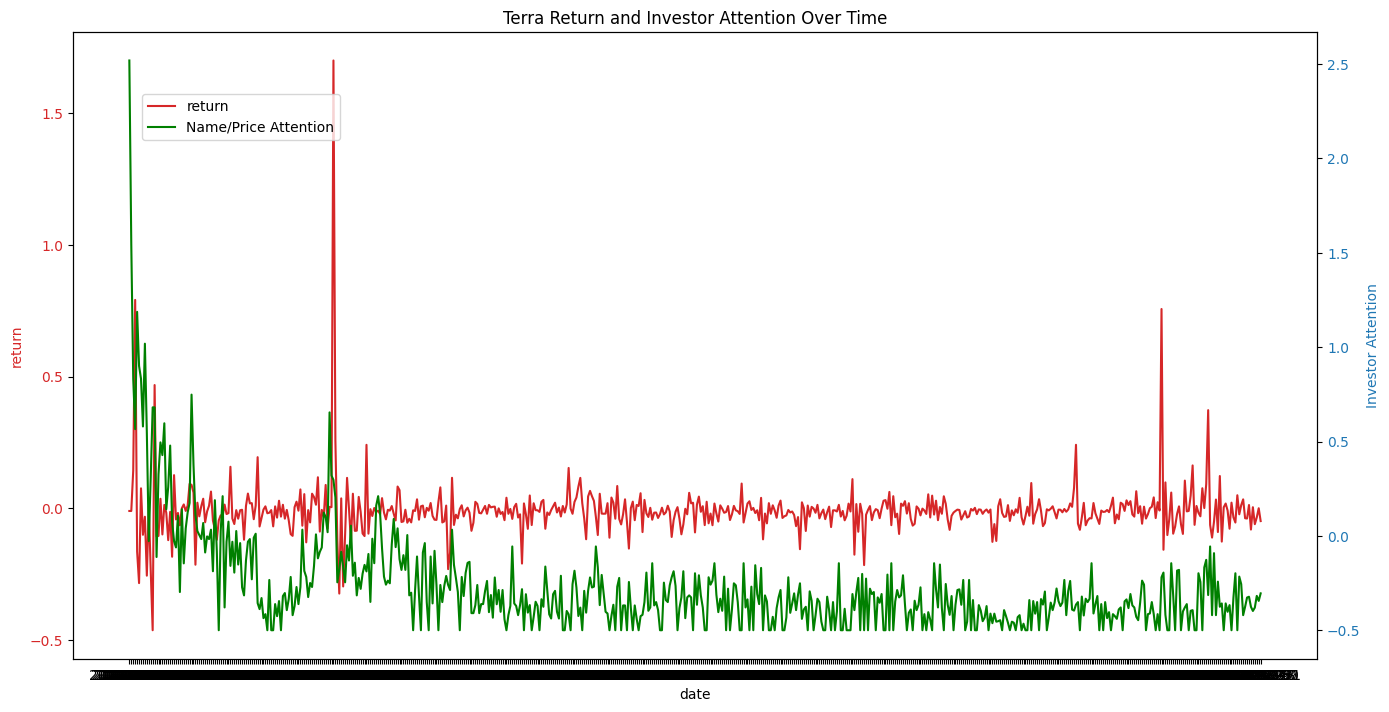

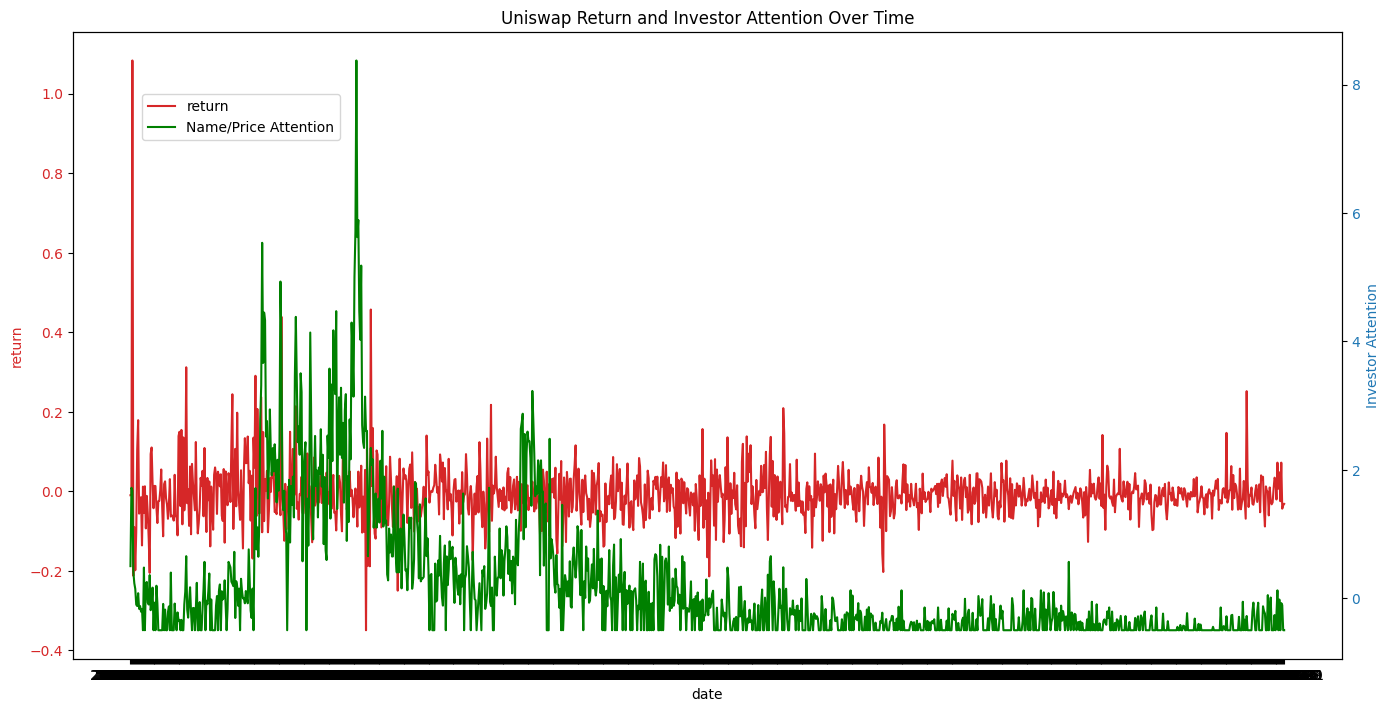

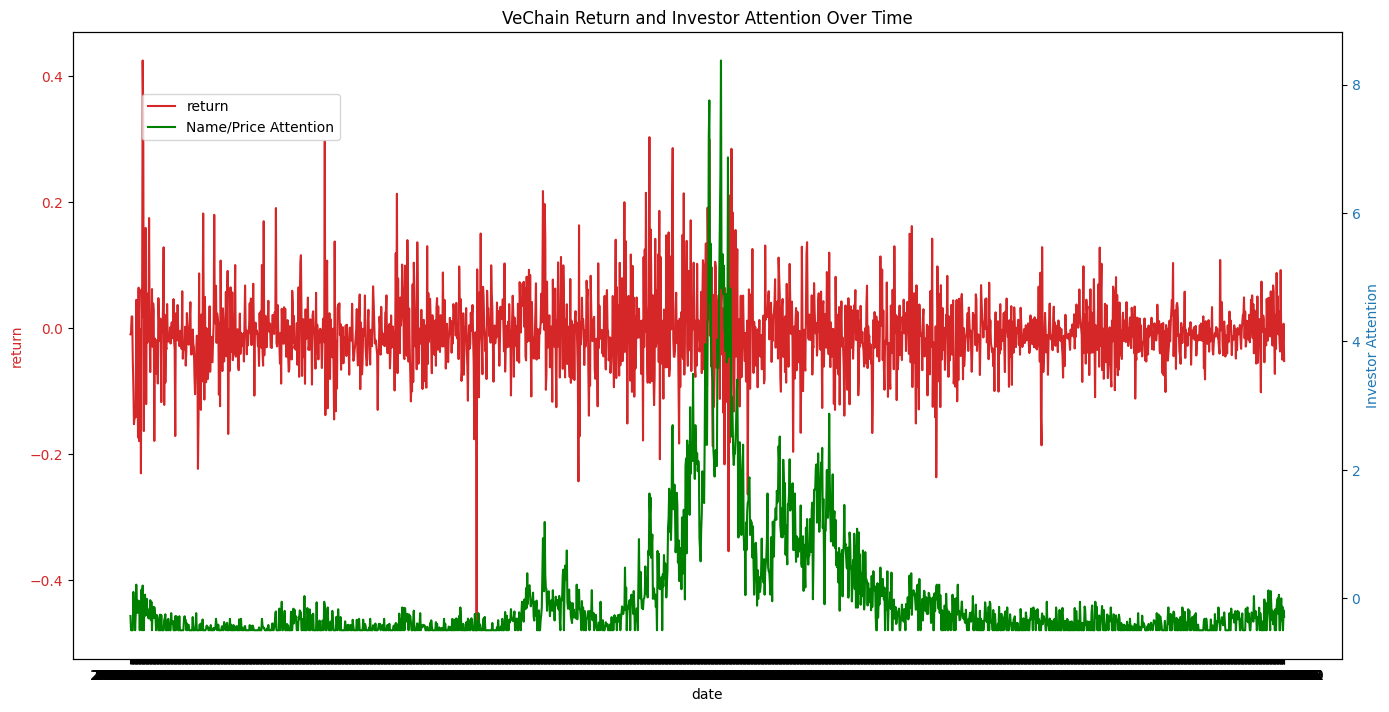

In [16]:
# Creating a time series plot for each crypto currency containing return and name_price_attention

crypto = data['crypto_name'].unique()

for currency in crypto:
    stock_data = data[data['crypto_name'] == currency]
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color = 'tab:red'
    ax1.set_xlabel('date')
    ax1.set_ylabel('return', color=color)
    ax1.plot(stock_data['date'], stock_data['return'], color=color, label='return')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Investor Attention', color=color)  # we already handled the x-label with ax1
    ax2.plot(stock_data['date'], stock_data['name_price_attention'], color='green', label='Name/Price Attention')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'{currency} Return and Investor Attention Over Time')
    fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
    plt.show()

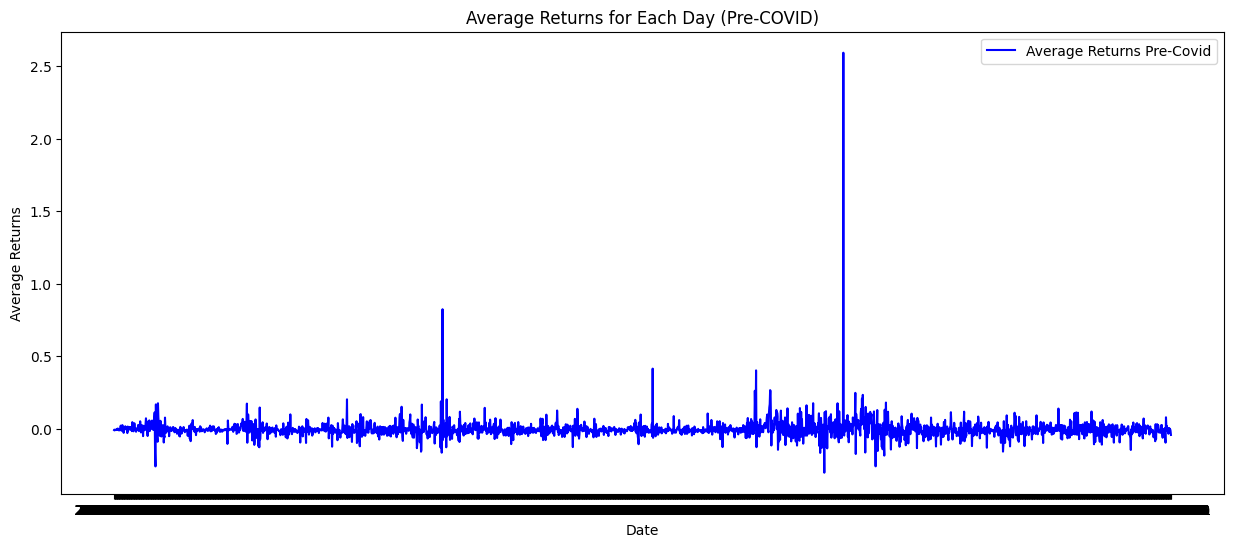

In [19]:
# Looking at the impact of Covid: Average Returns per day Pre-covid 

average_returns_pre_covid = data[data['Post-covid'] == 0].groupby('date')['return'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_returns_pre_covid.index, average_returns_pre_covid, label='Average Returns Pre-Covid',color='blue')
plt.title('Average Returns for Each Day (Pre-COVID)')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()

In [ ]:
#maybe remove that outlier?

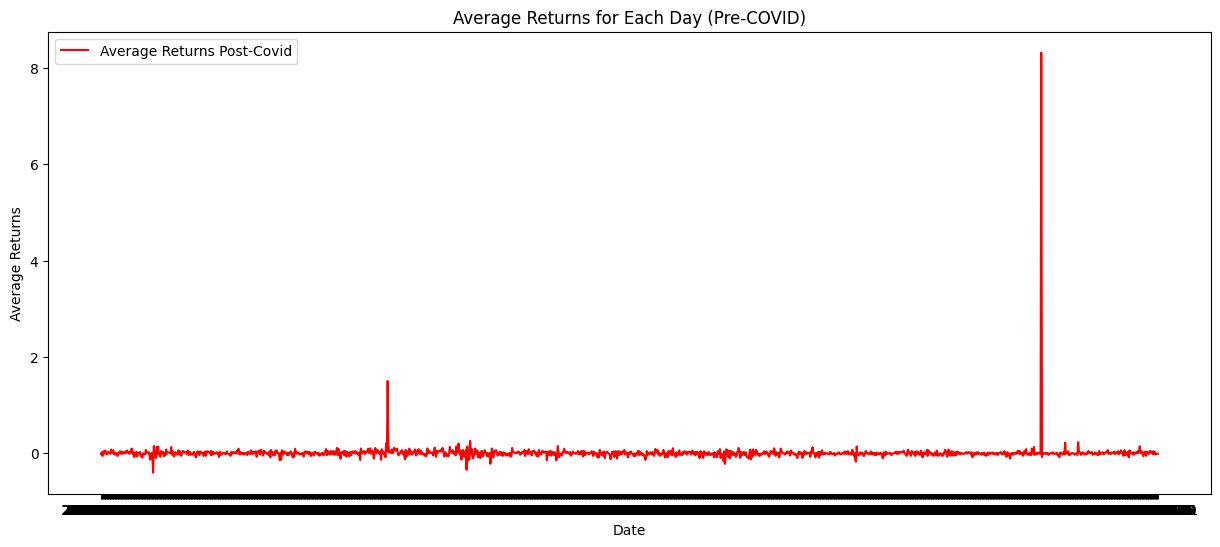

In [20]:
# Looking at the impact of Covid: Average Returns per day Pre-covid 
average_returns_post_covid = data[data['Post-covid'] == 1].groupby('date')['return'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_returns_post_covid.index, average_returns_post_covid, label='Average Returns Post-Covid',color='red')
plt.title('Average Returns for Each Day (Pre-COVID)')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()

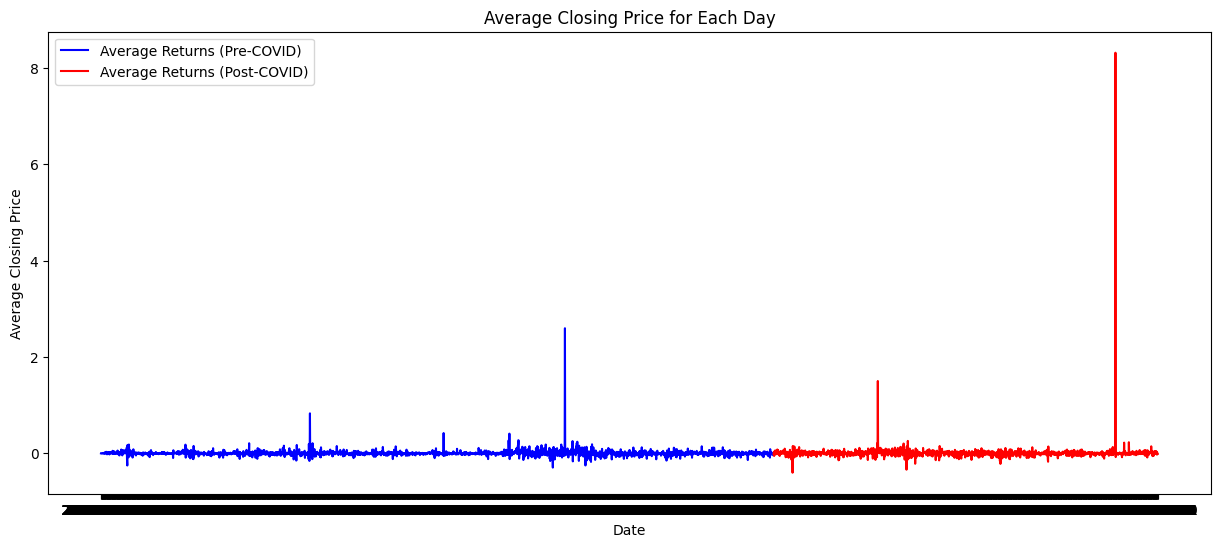

In [21]:
#Putting both together to see the on the same scale
plt.figure(figsize=(15, 6))
plt.plot(average_returns_pre_covid.index, average_returns_pre_covid, label='Average Returns (Pre-COVID)', color='blue')
plt.plot(average_returns_post_covid.index, average_returns_post_covid, label='Average Returns (Post-COVID)', color='red')
plt.title('Average Closing Price for Each Day')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()


### 2. Distributions of Independent Variables

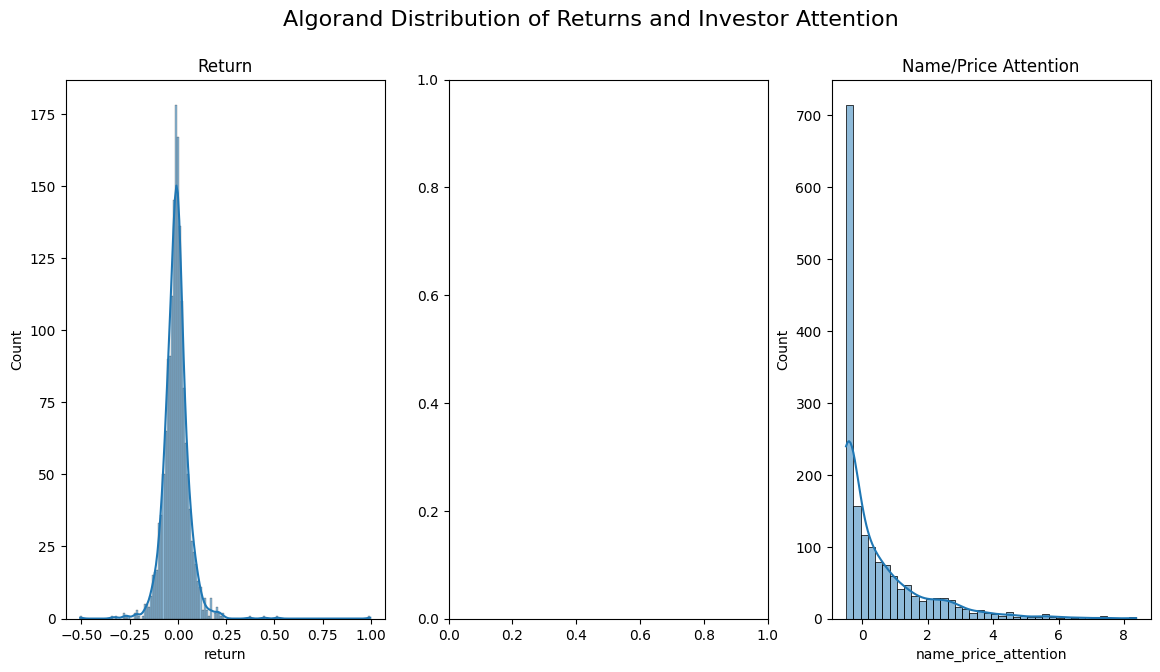

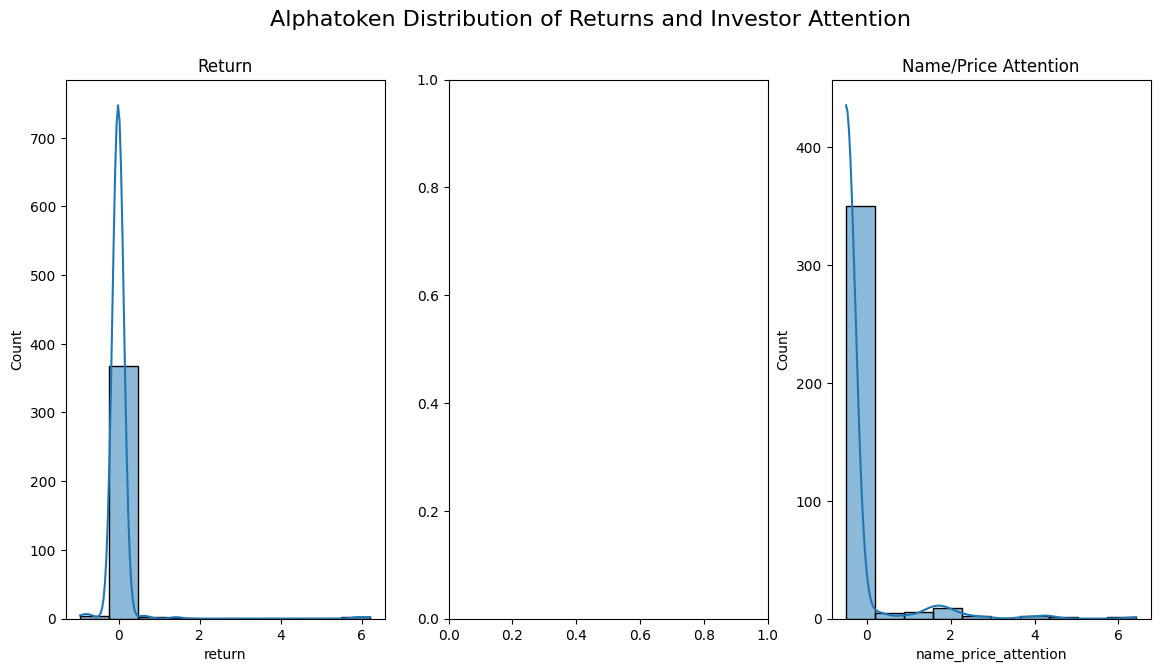

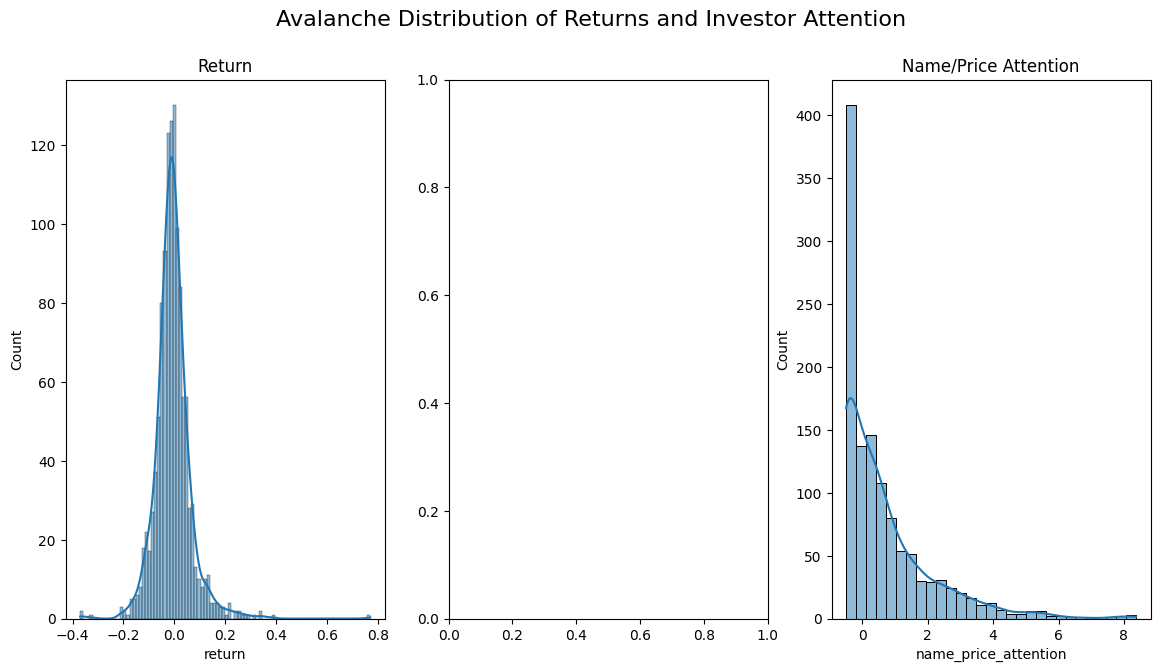

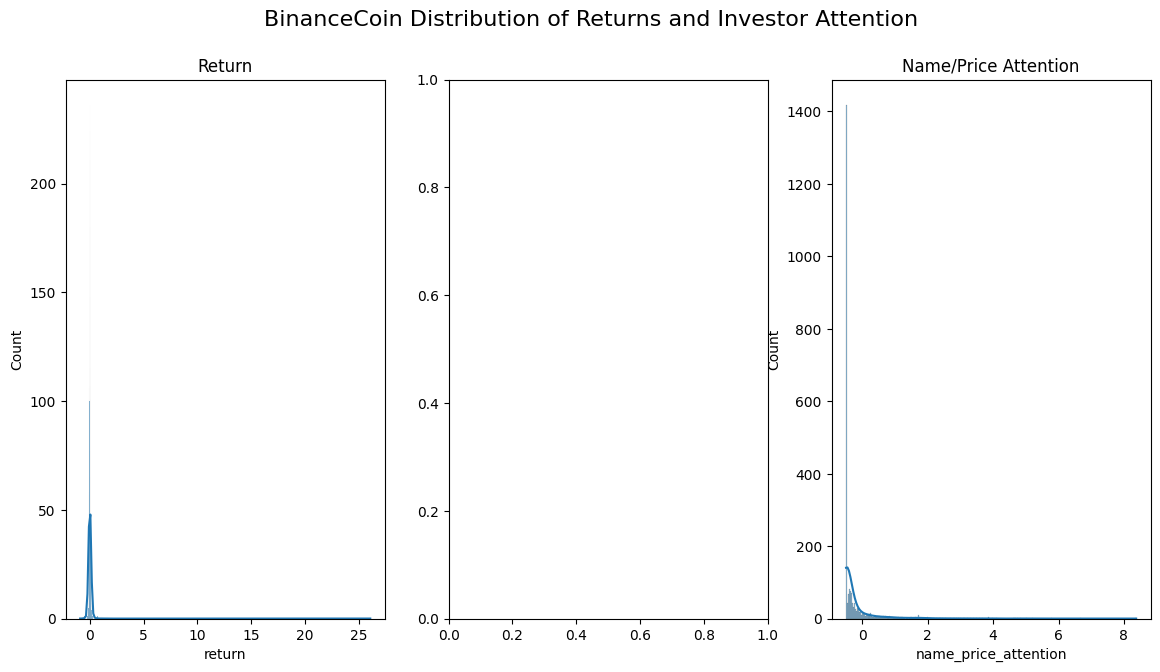

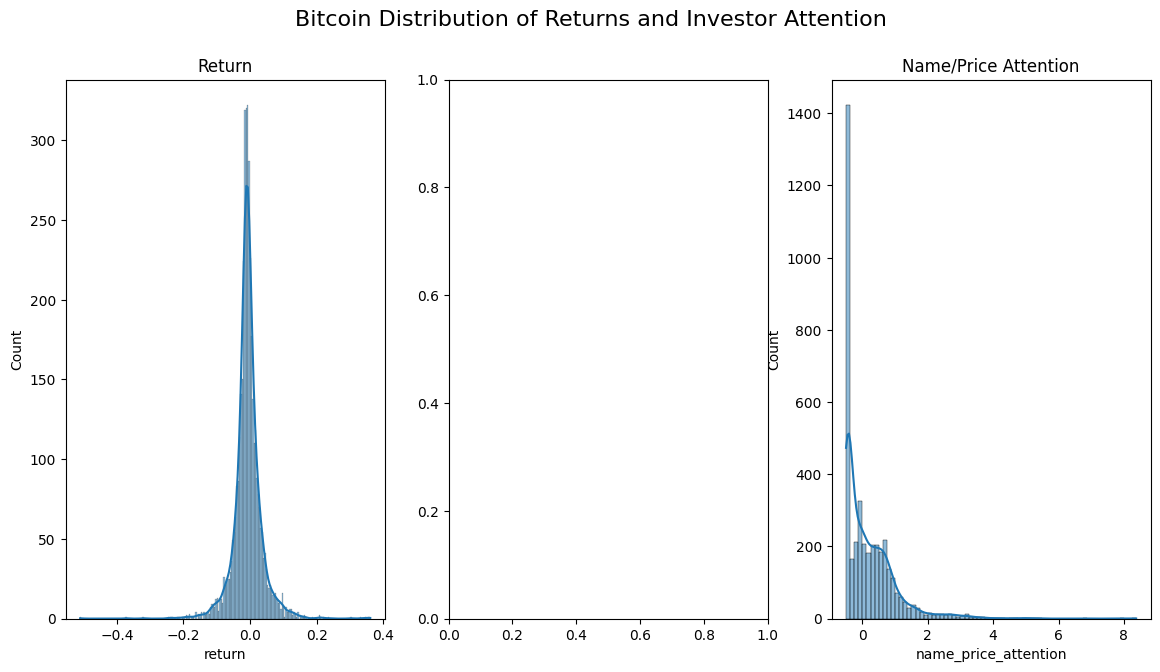

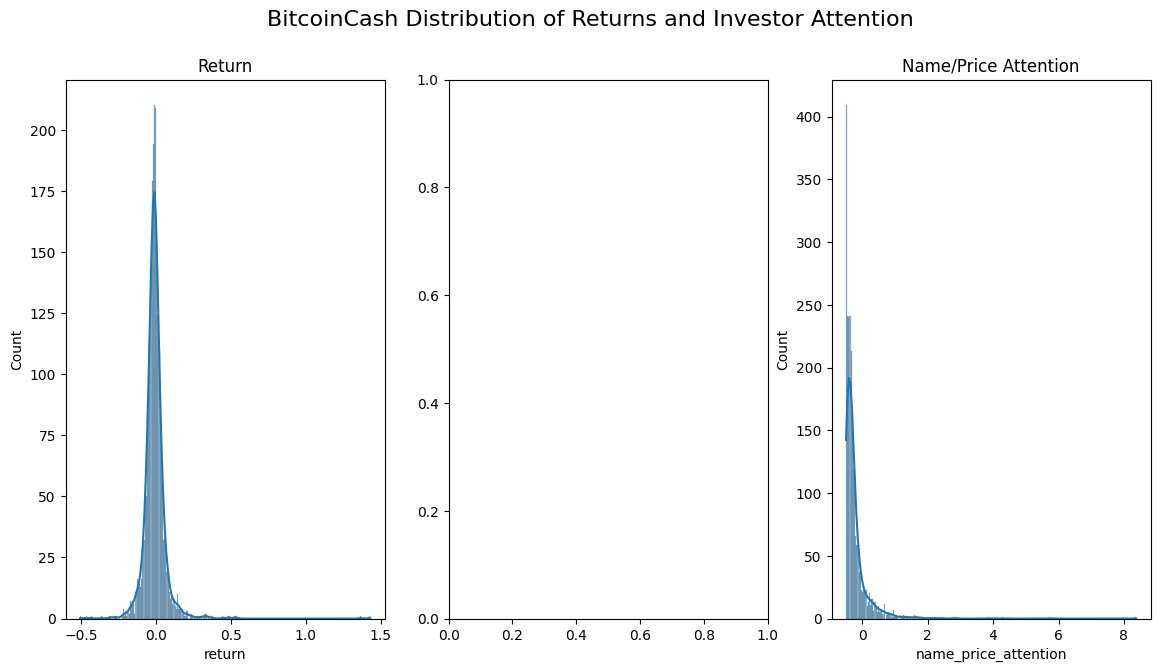

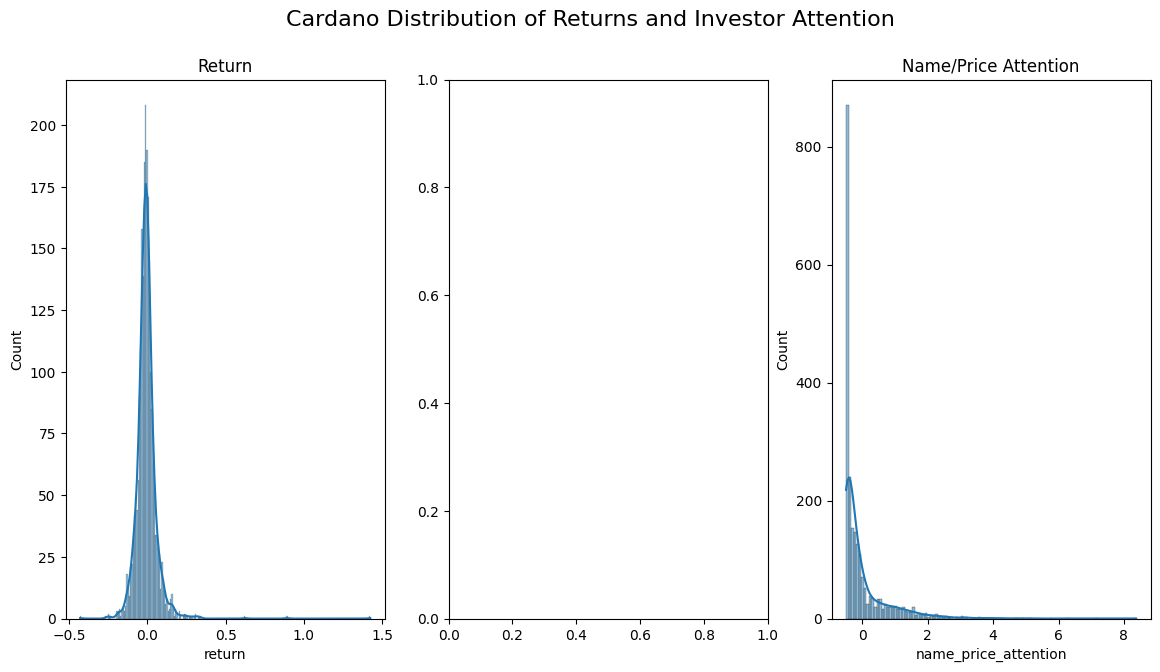

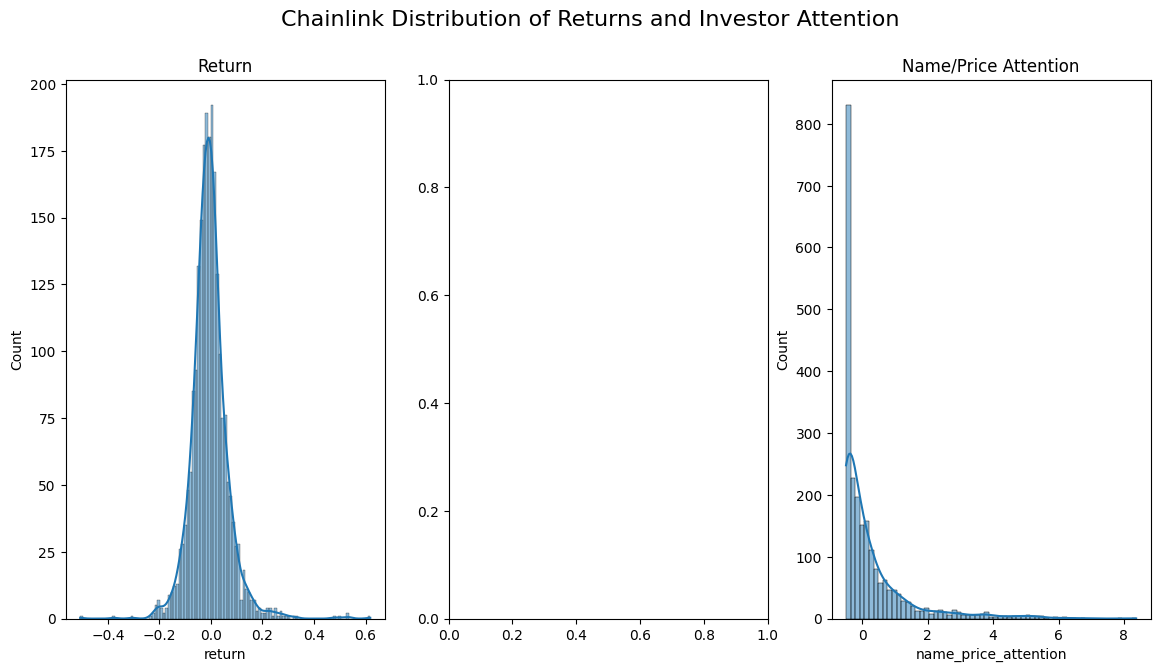

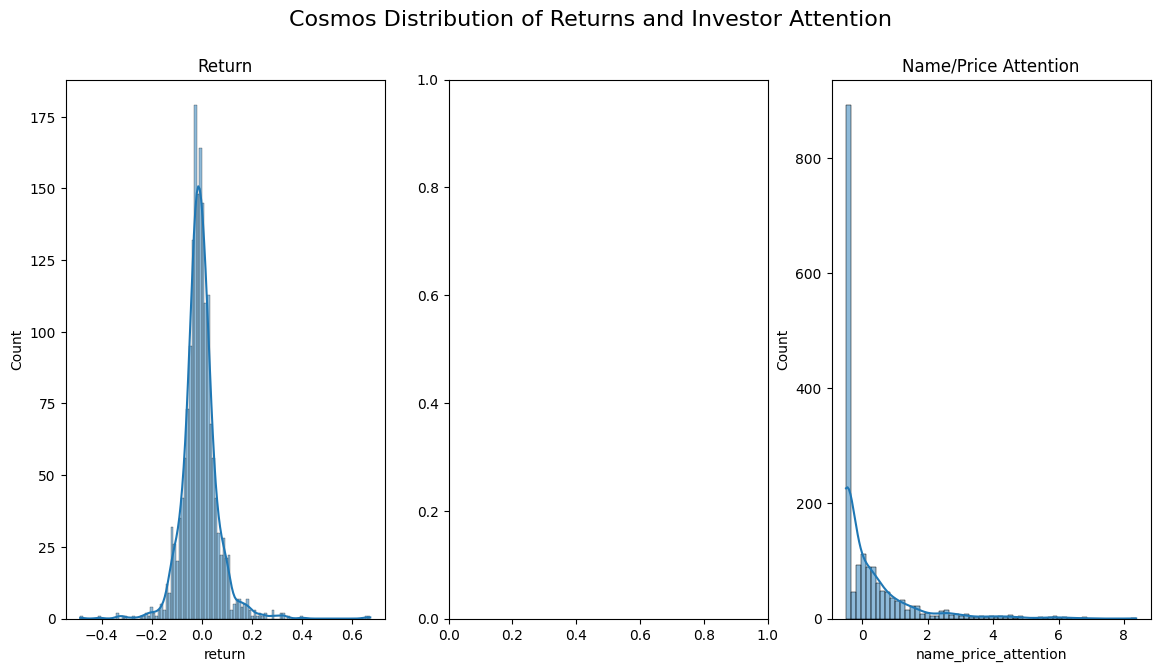

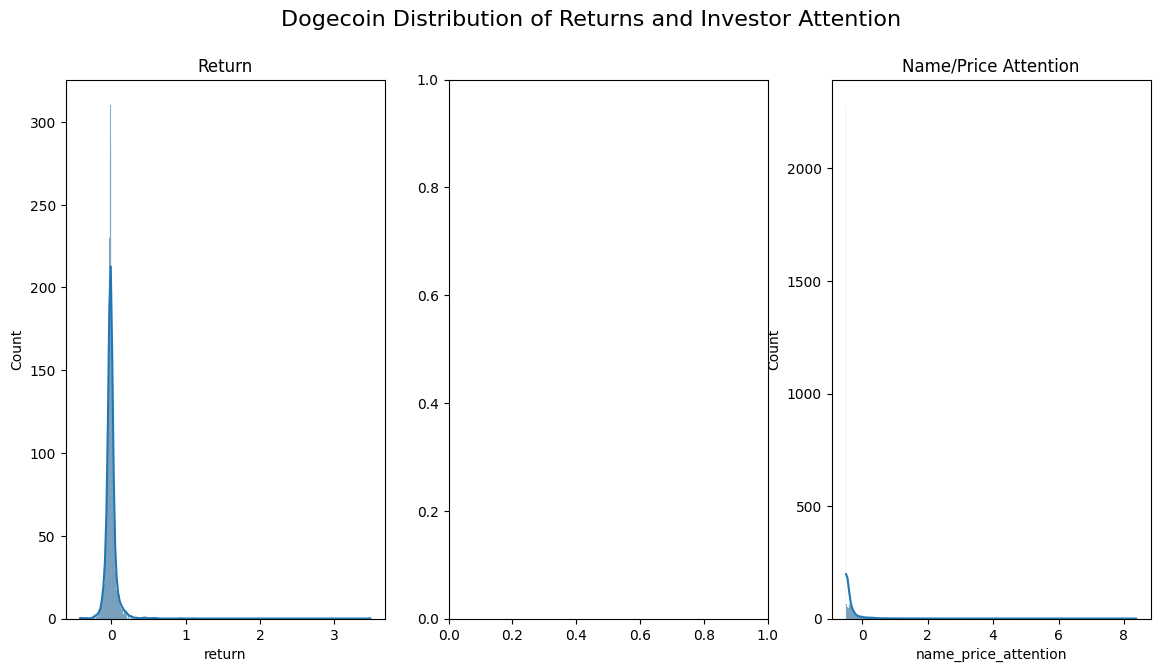

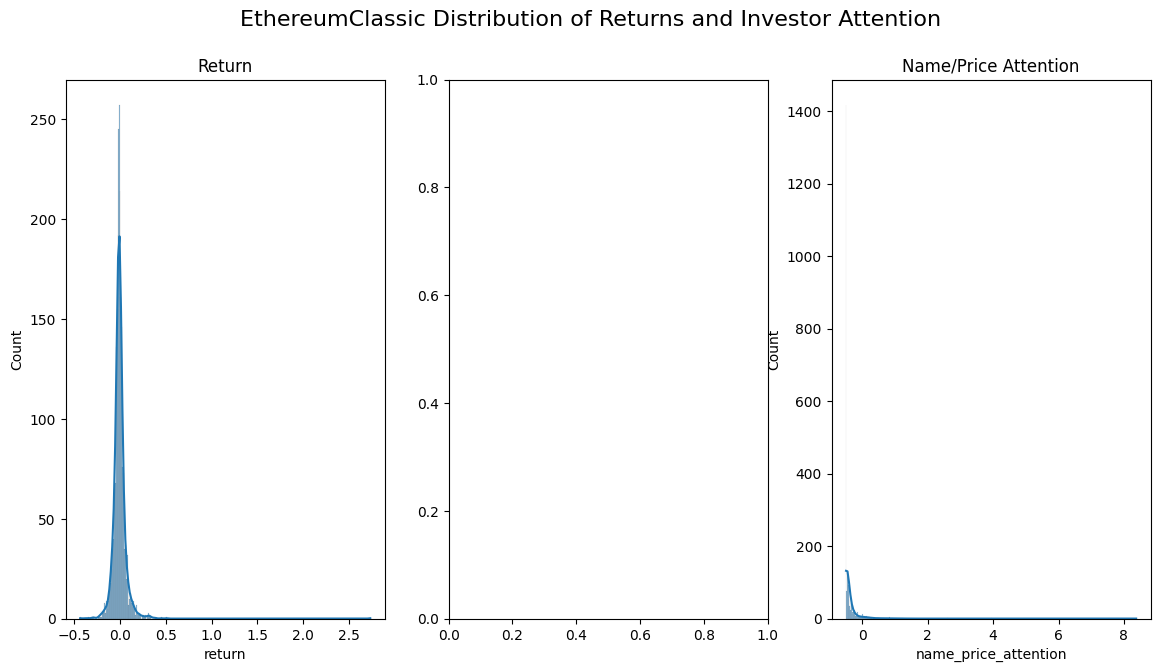

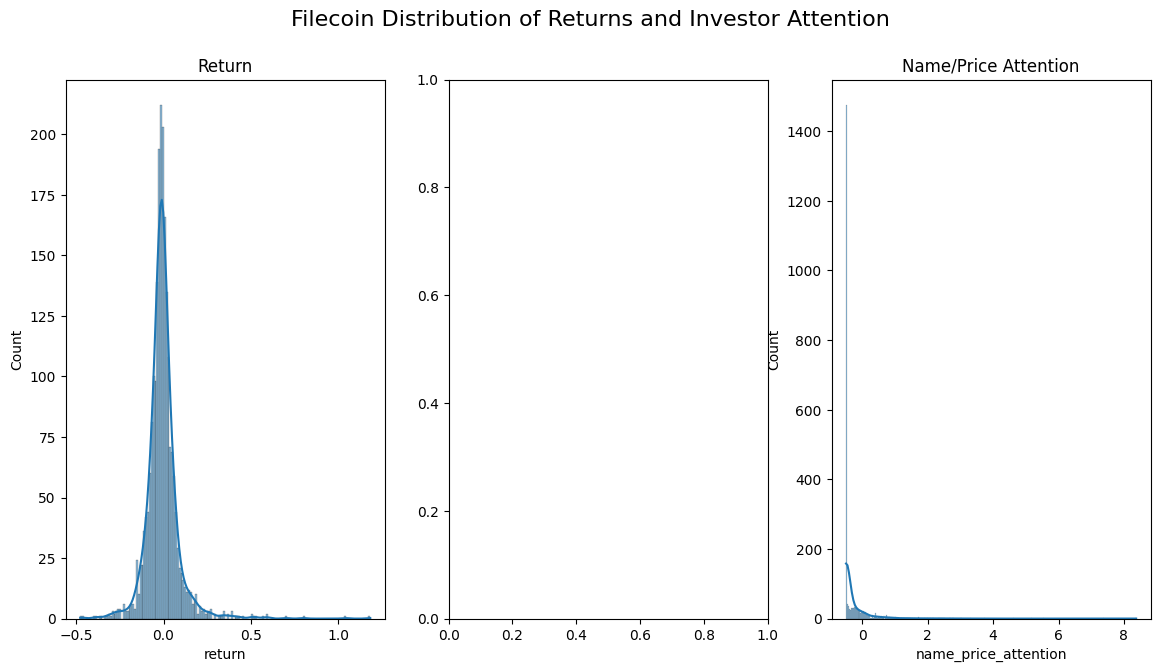

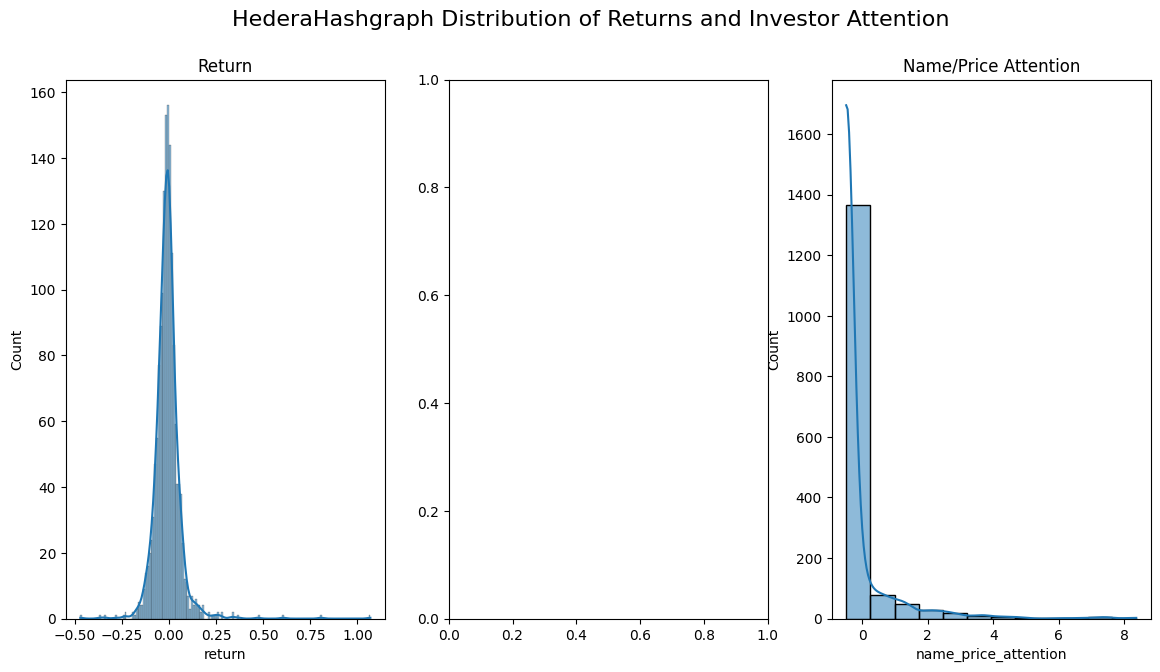

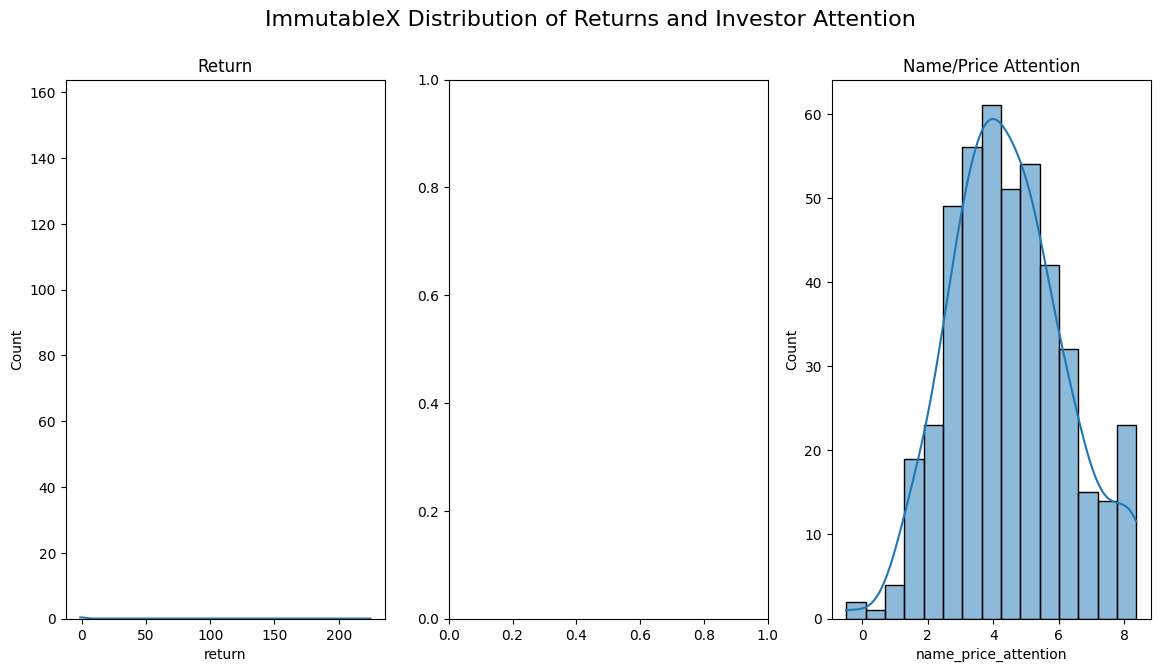

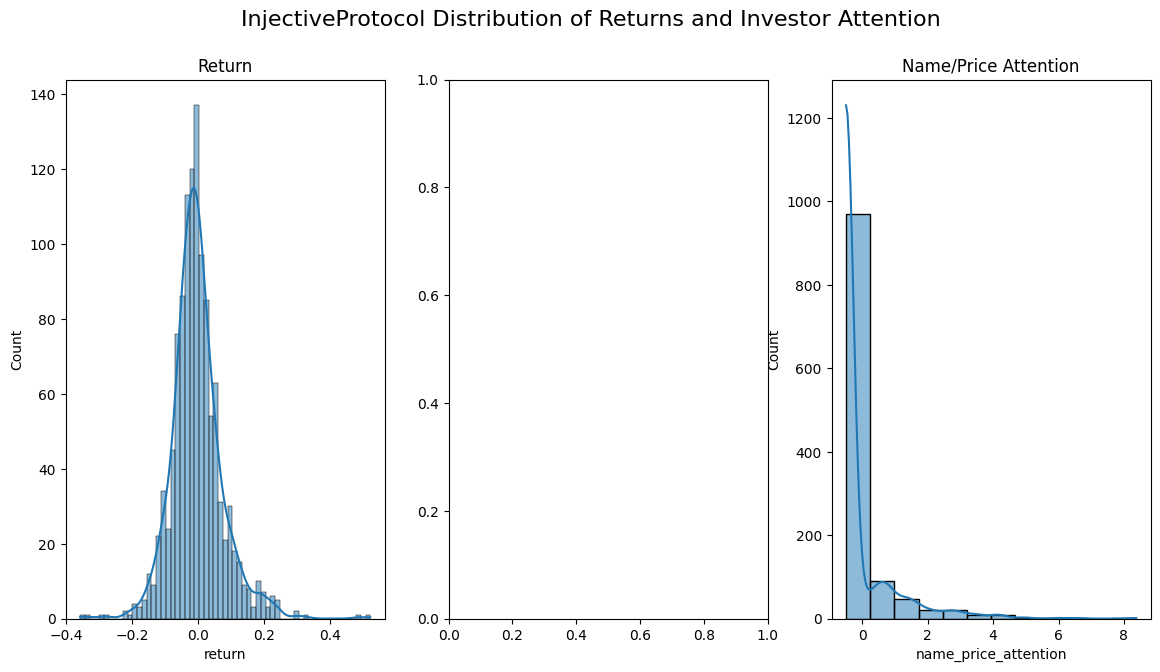

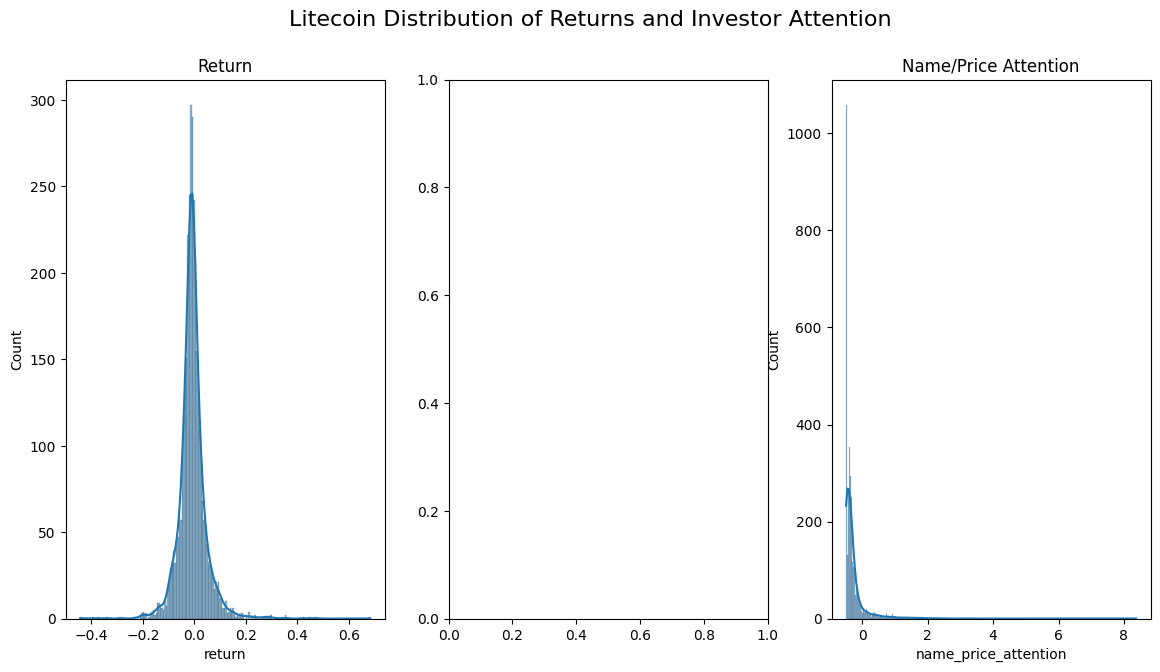

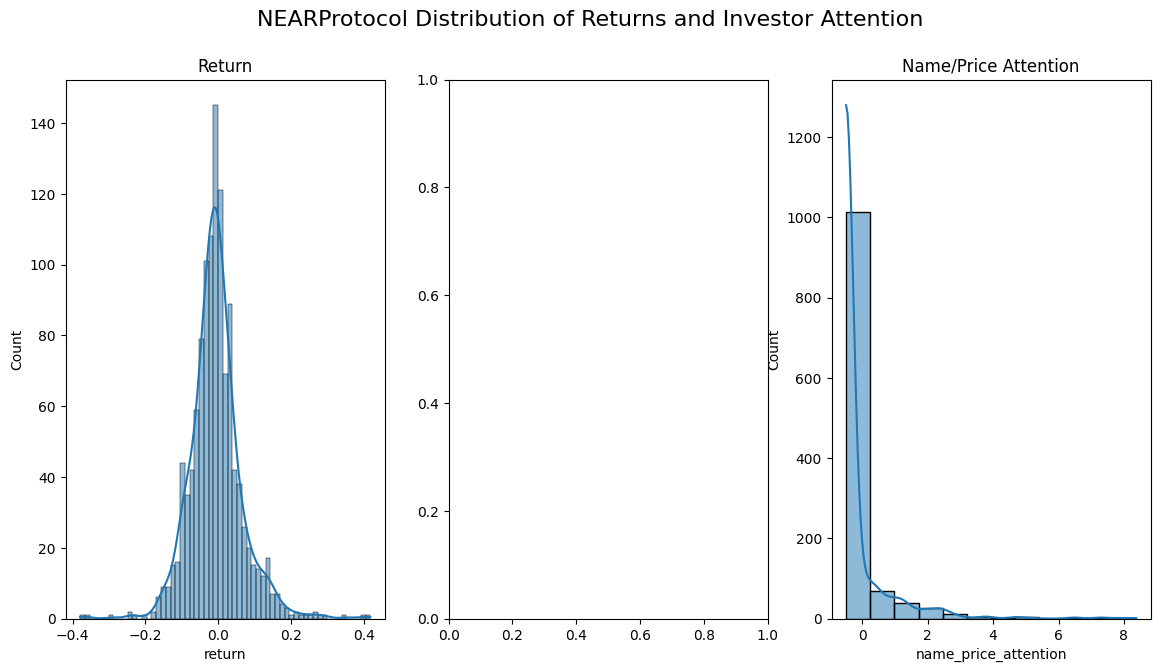

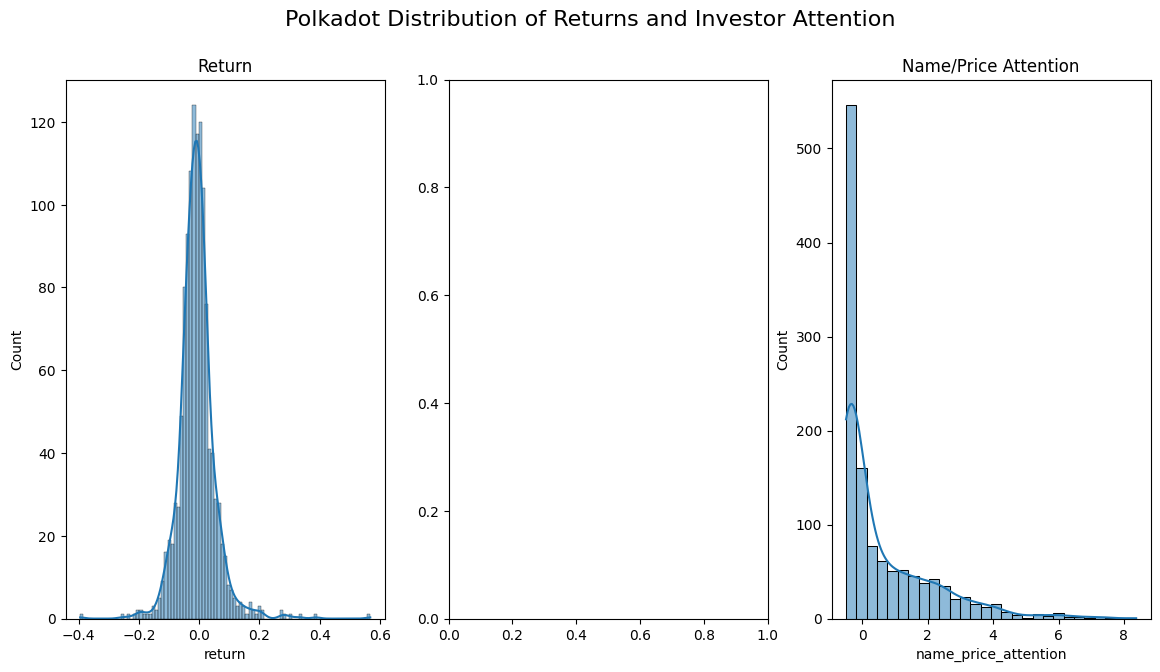

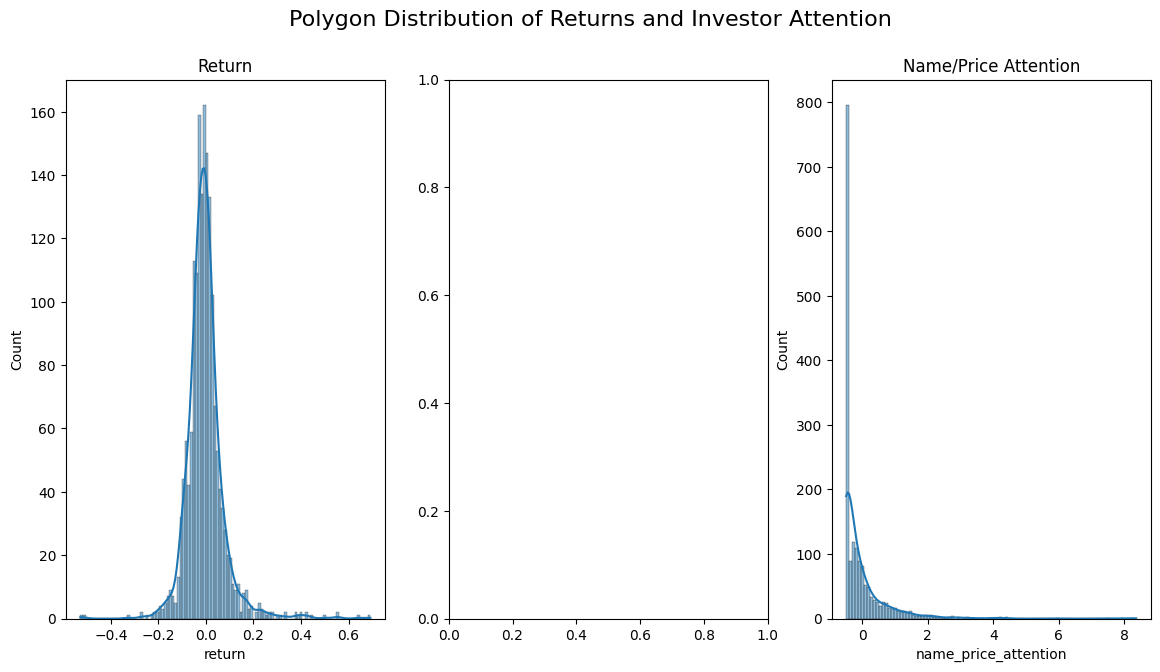

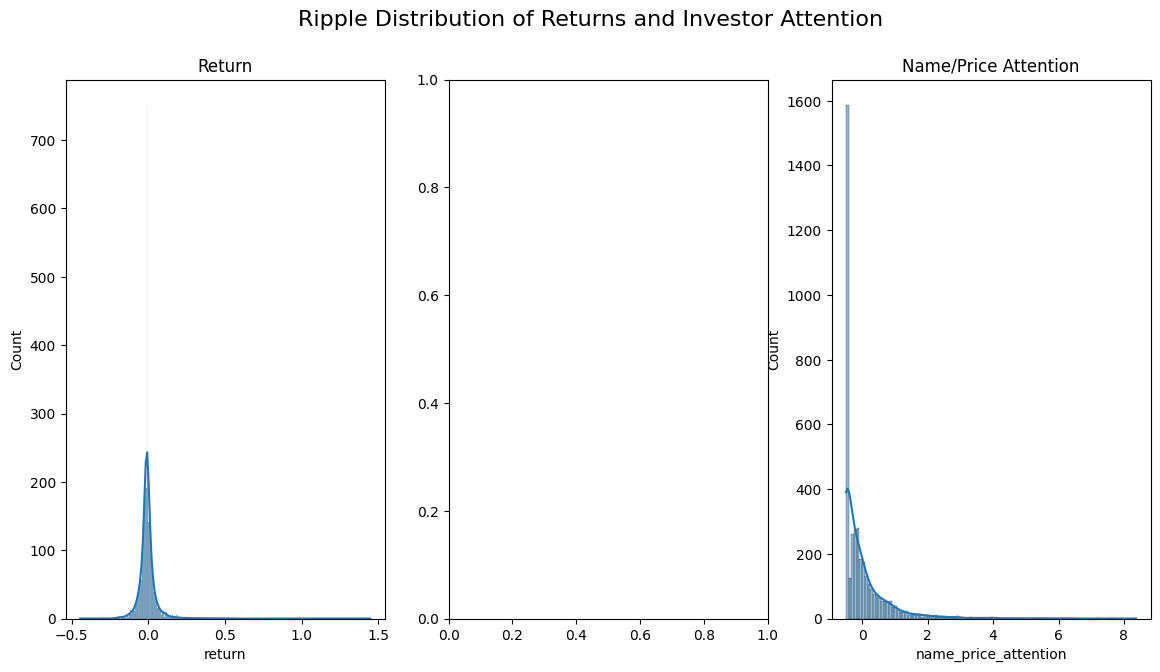

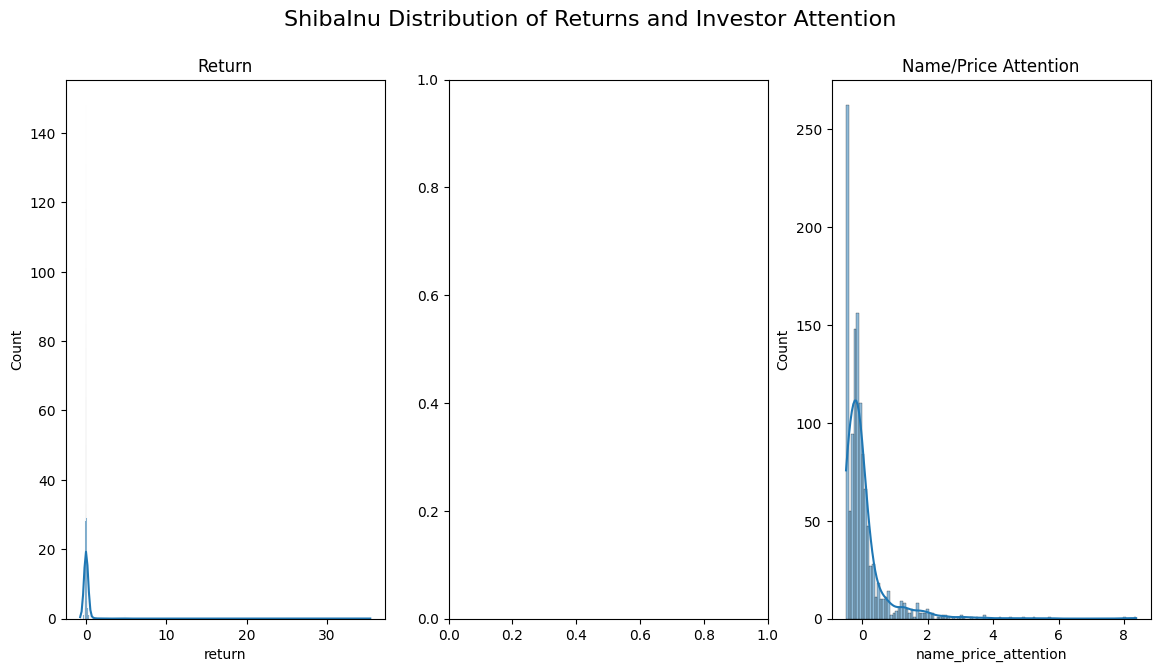

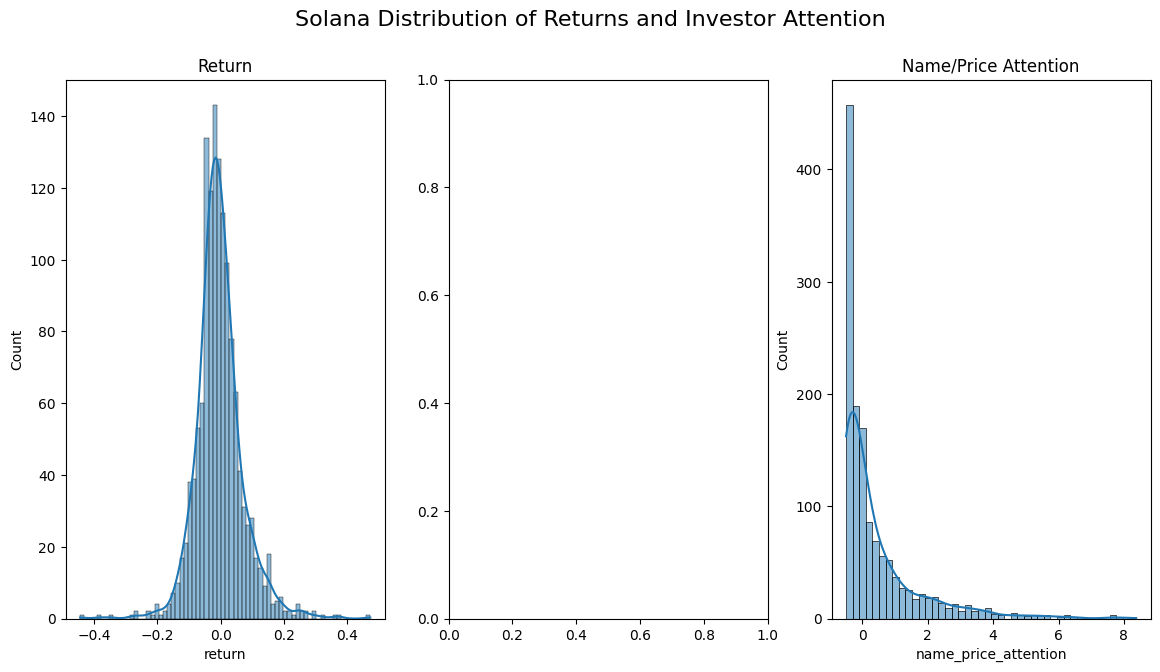

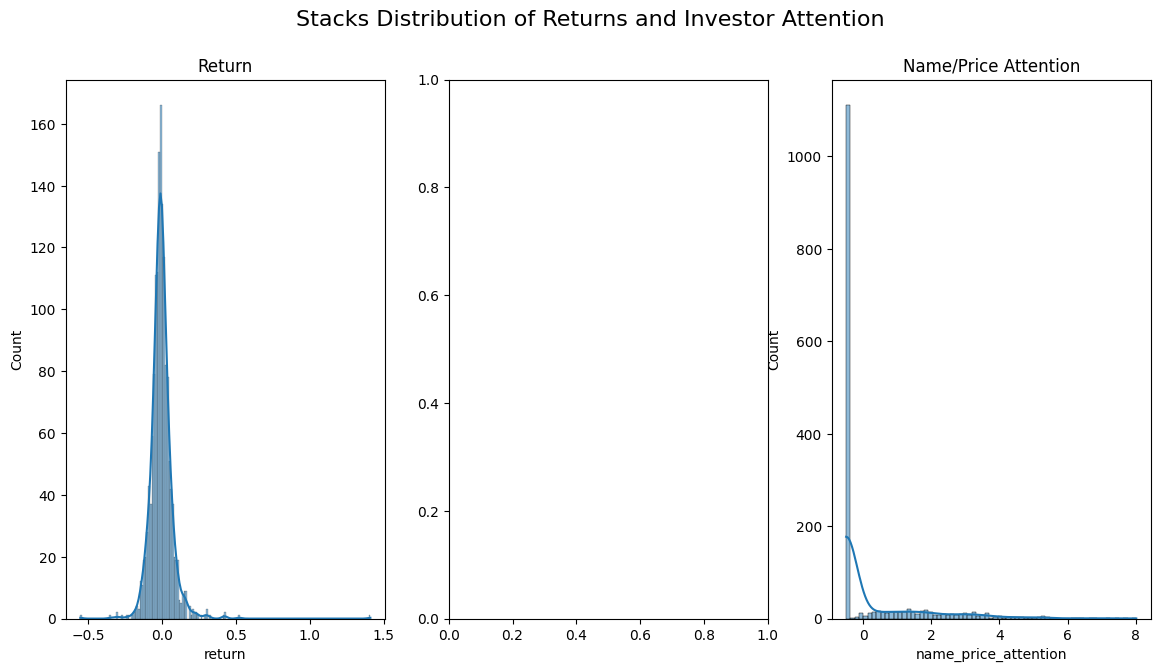

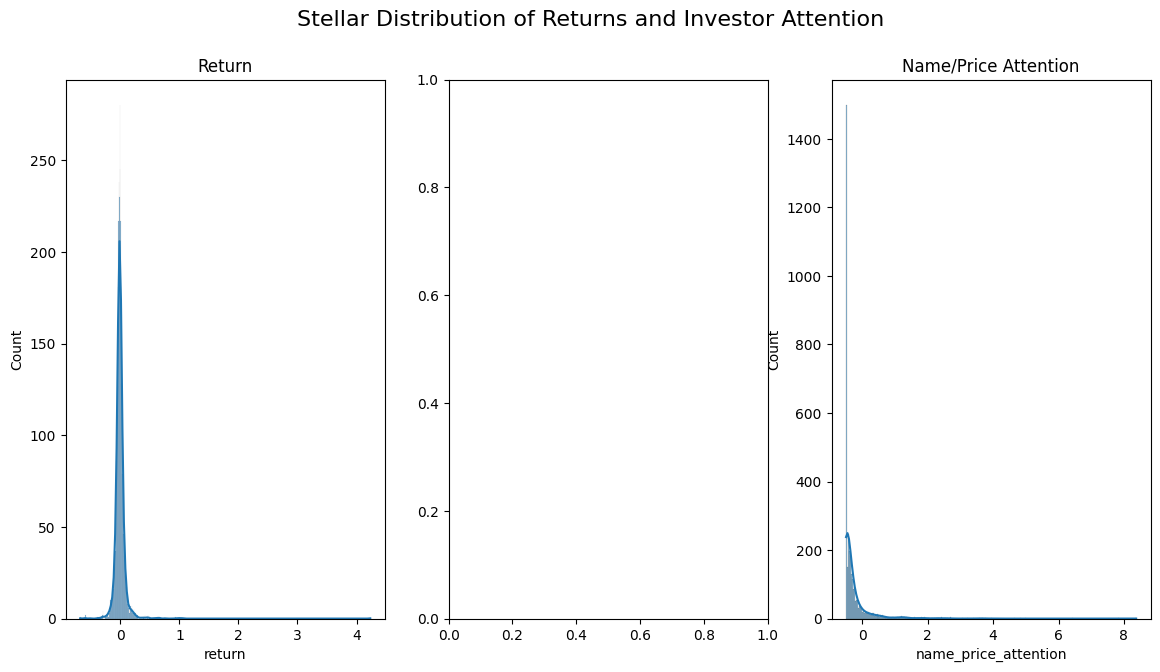

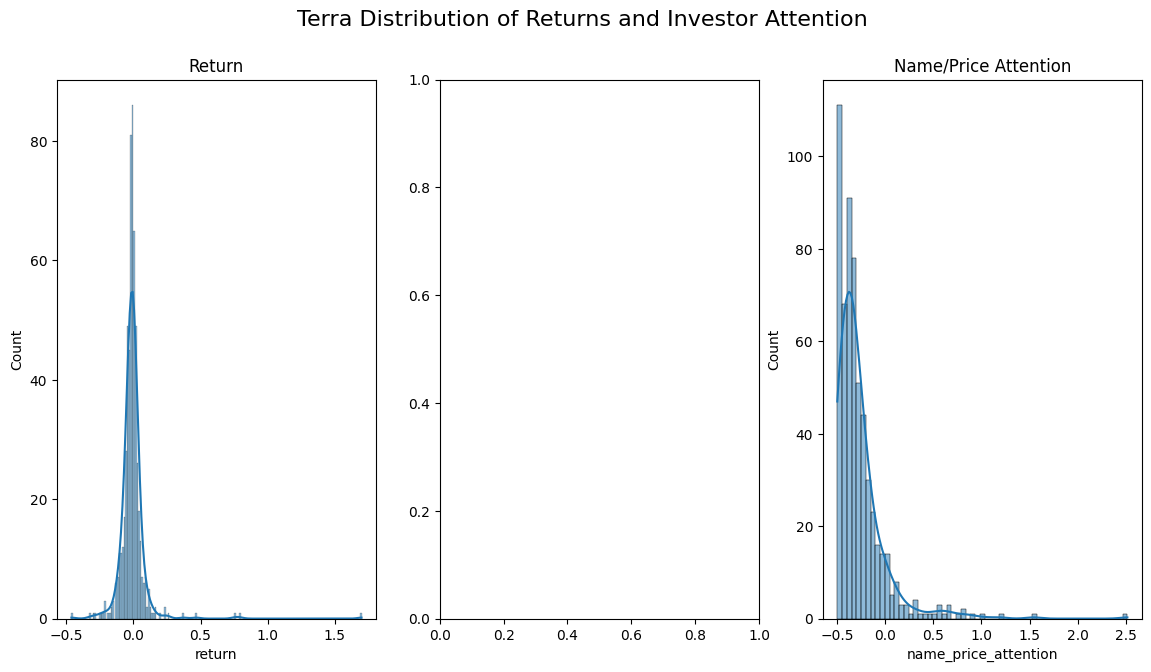

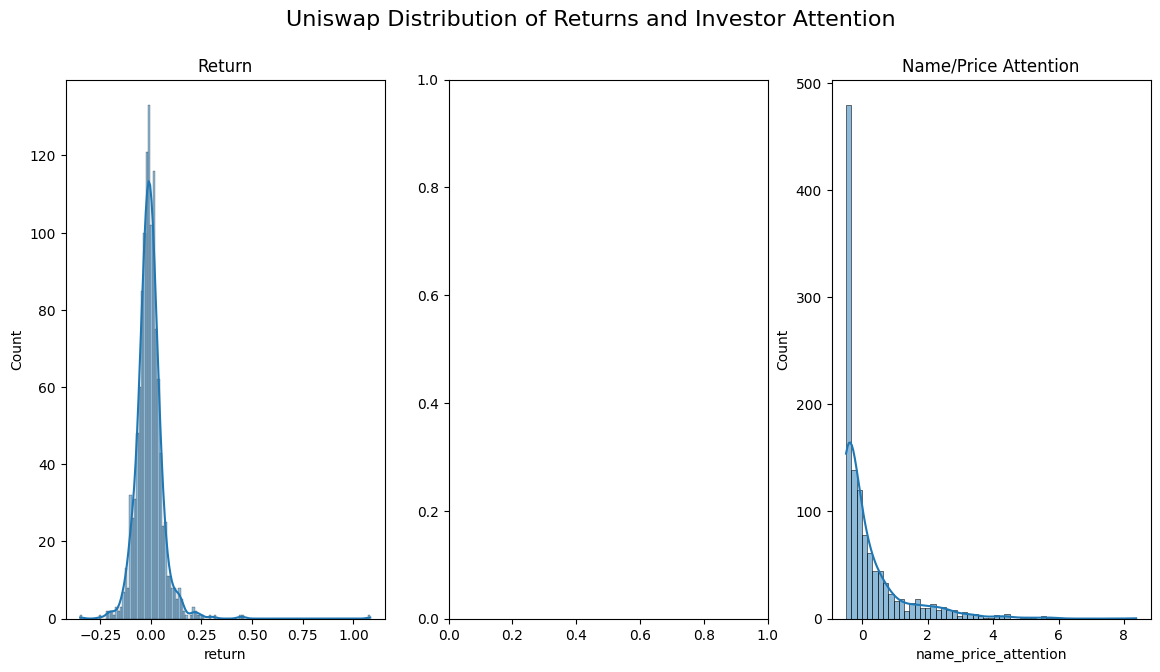

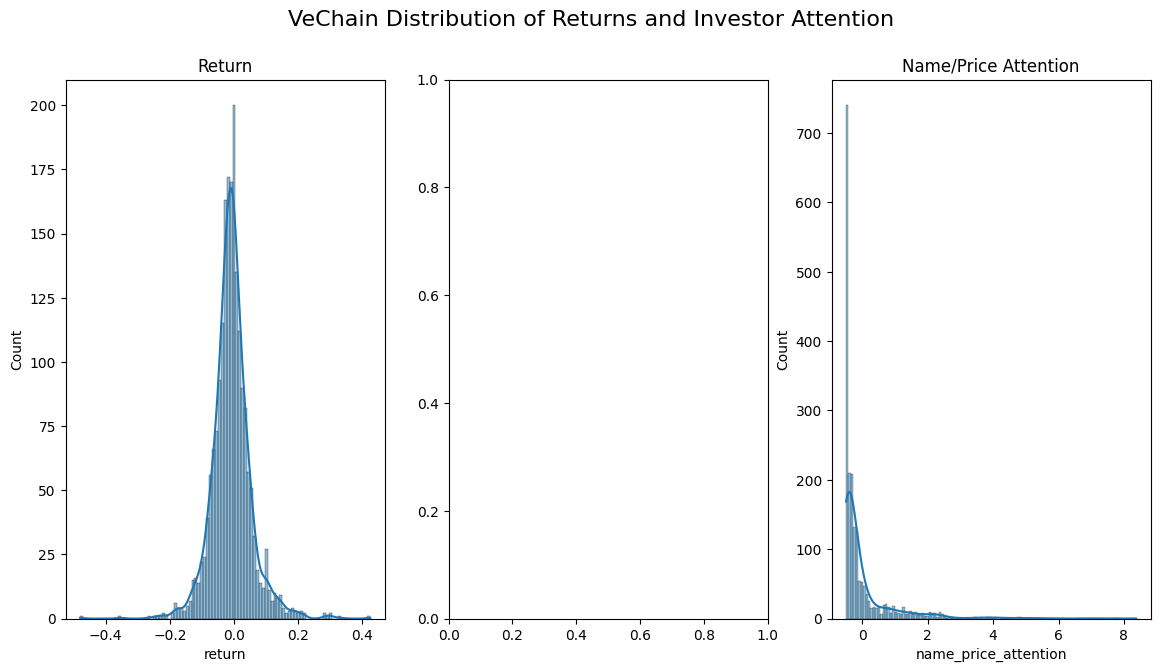

In [24]:
for currency in crypto:
    stock_data = data[data['crypto_name'] == currency]
    fig, ax = plt.subplots(1, 3, figsize=(14, 7))
    fig.suptitle(f'{currency} Distribution of Returns and Investor Attention', fontsize=16)
    sns.histplot(stock_data['return'], kde=True, ax=ax[0])
    ax[0].set_title('Return')
    sns.histplot(stock_data['name_price_attention'], kde=True, ax=ax[2])
    ax[2].set_title('Name/Price Attention')
    plt.show()



### 3. Scatter plots with the Relationships 

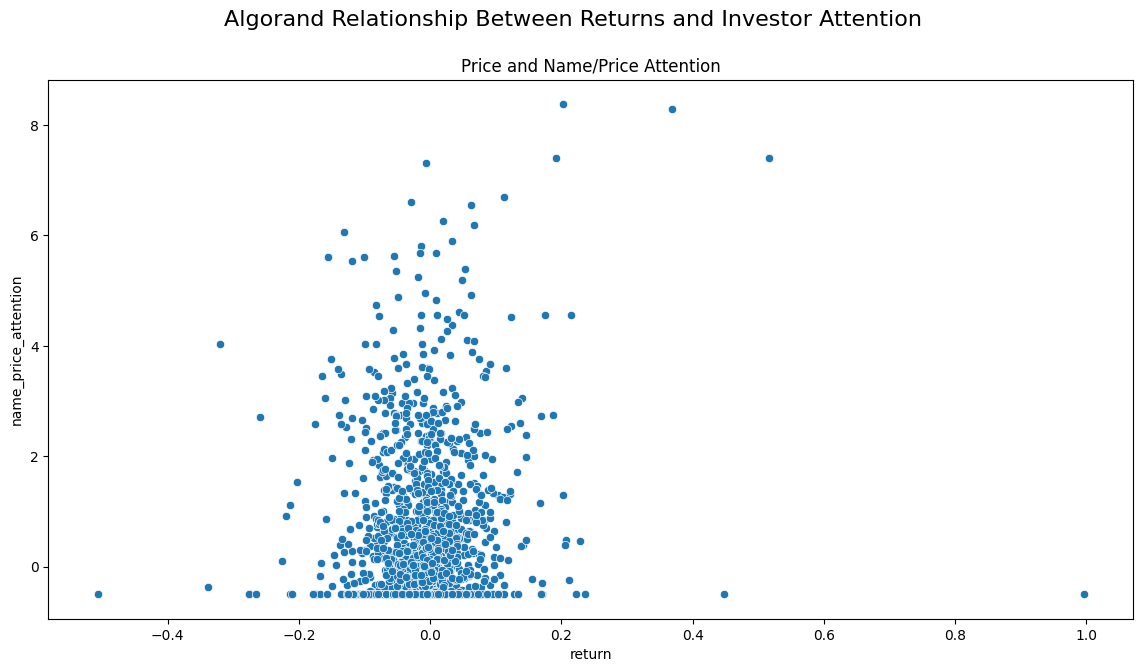

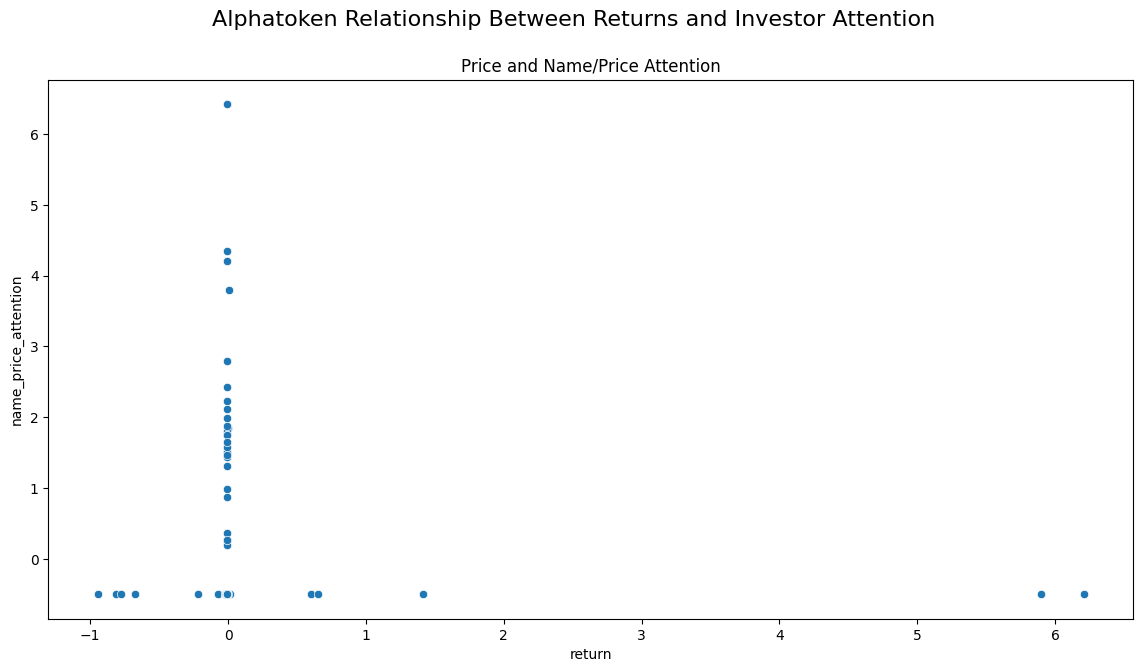

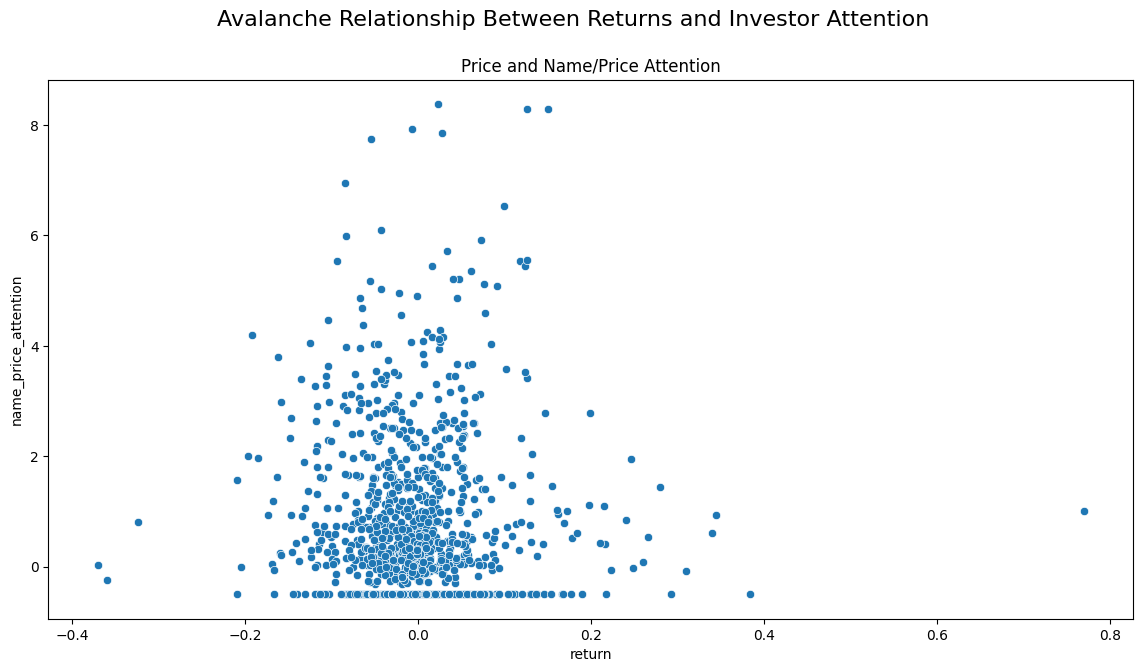

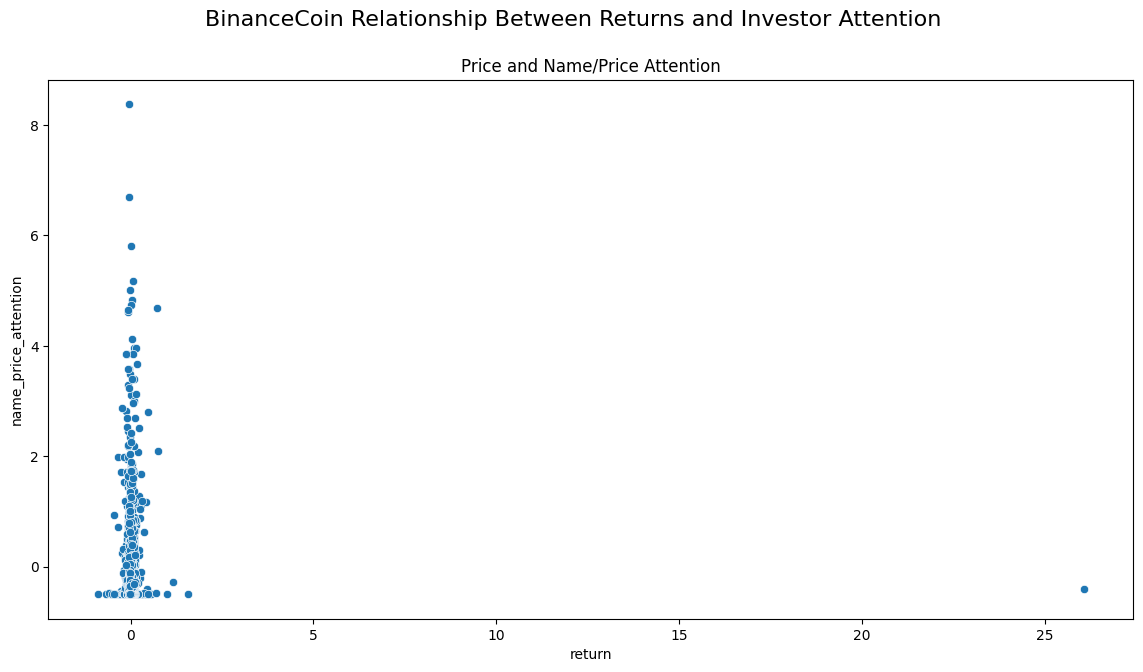

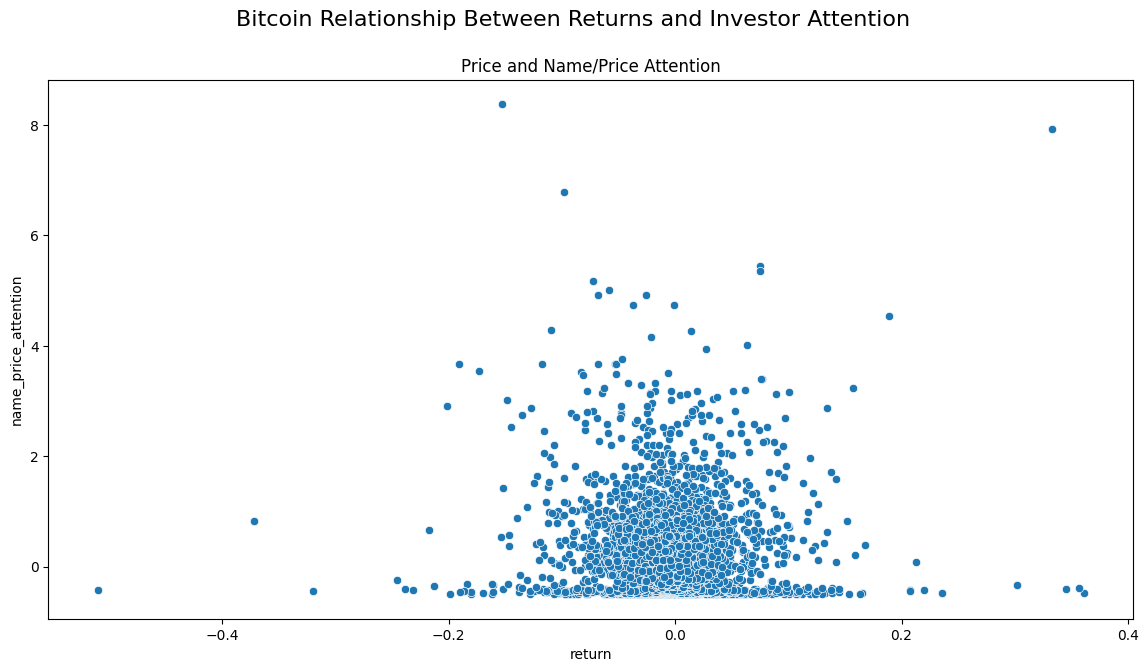

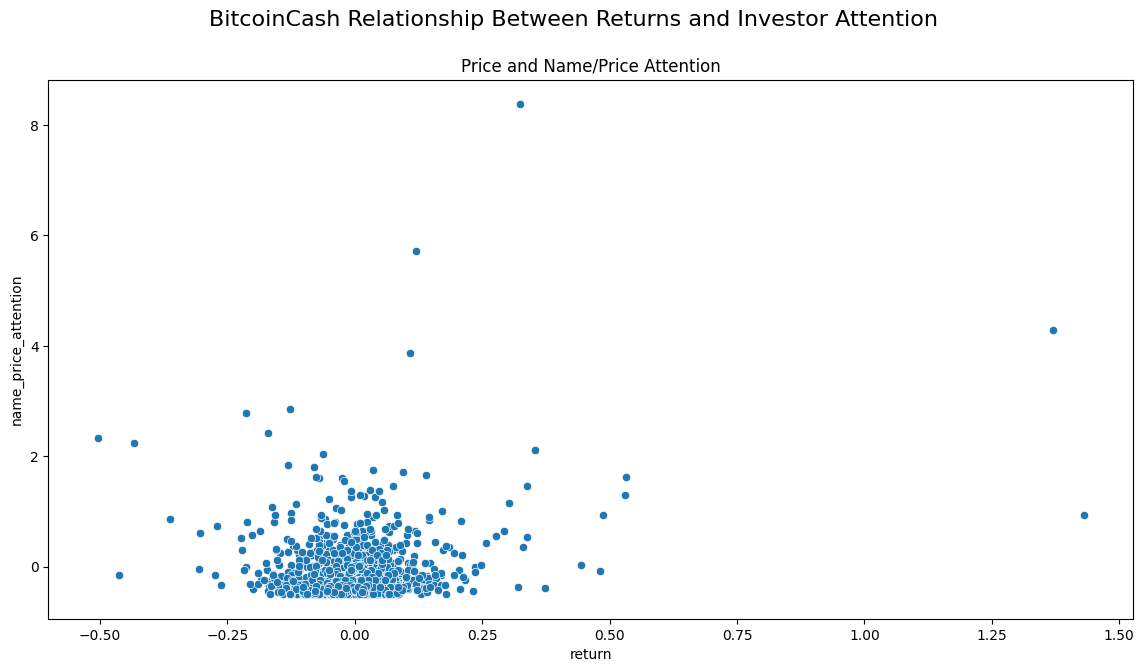

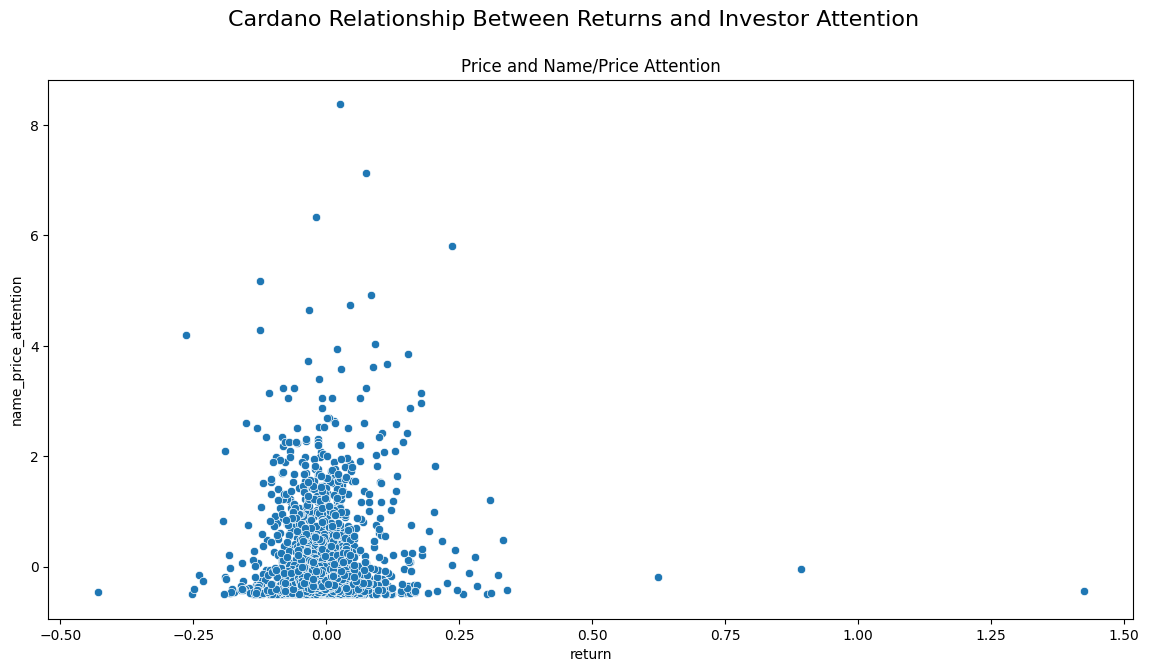

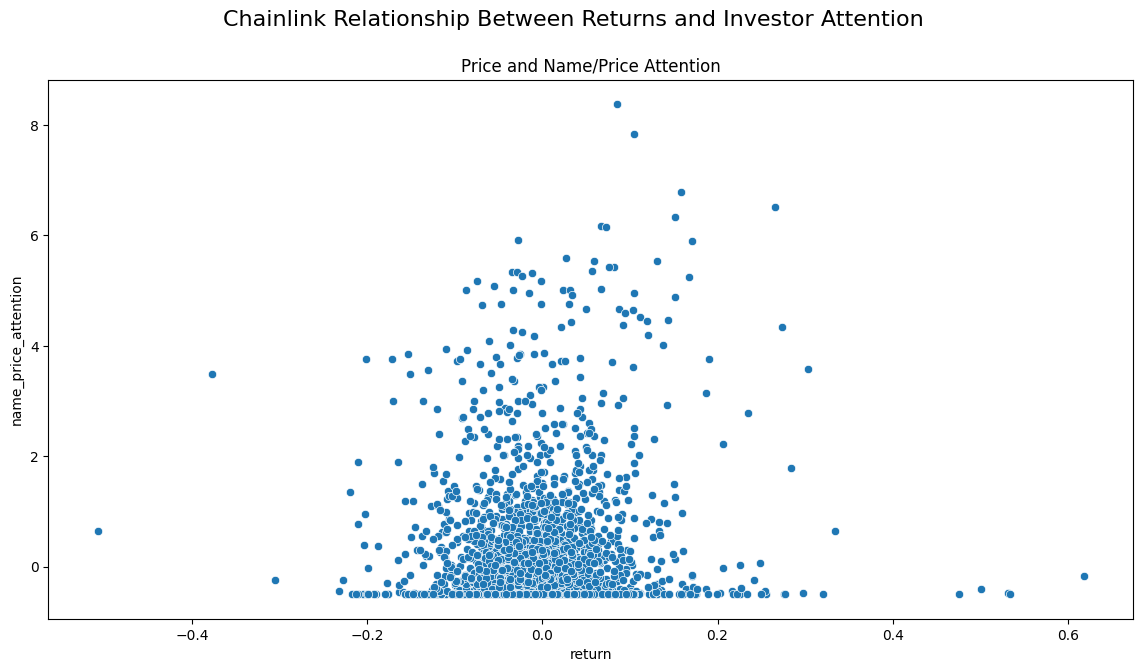

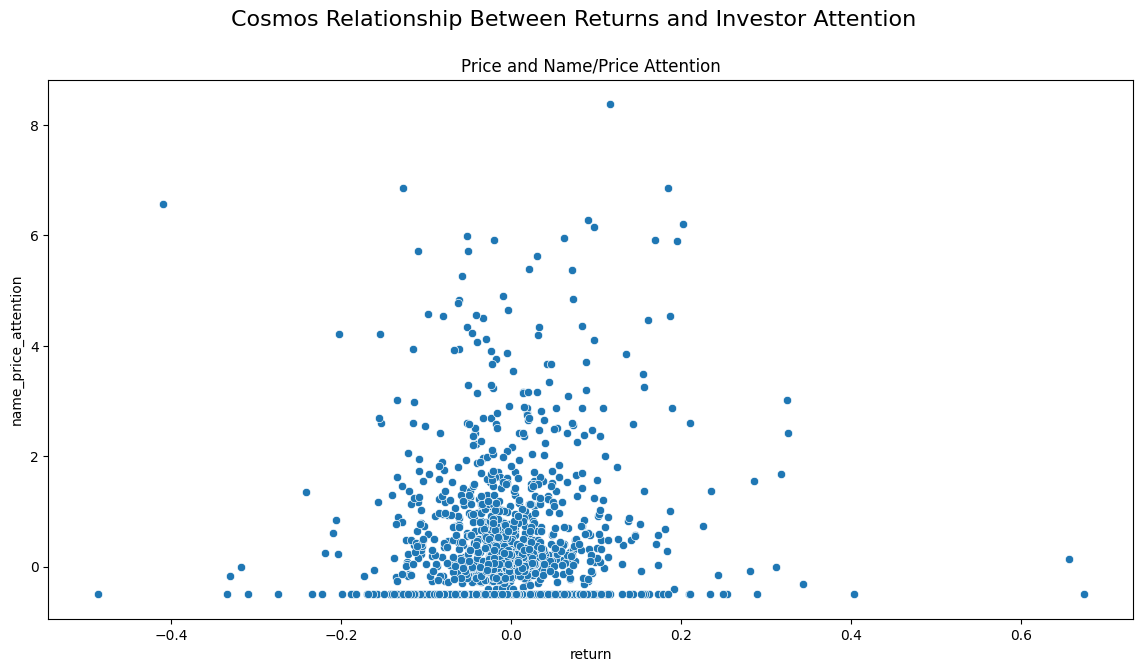

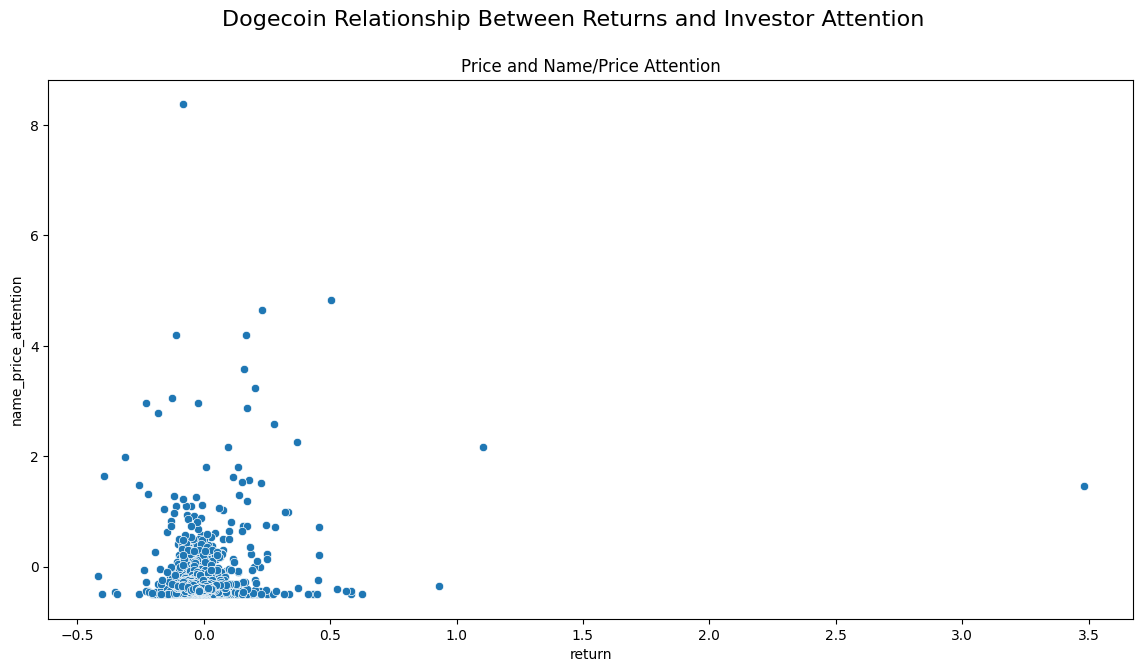

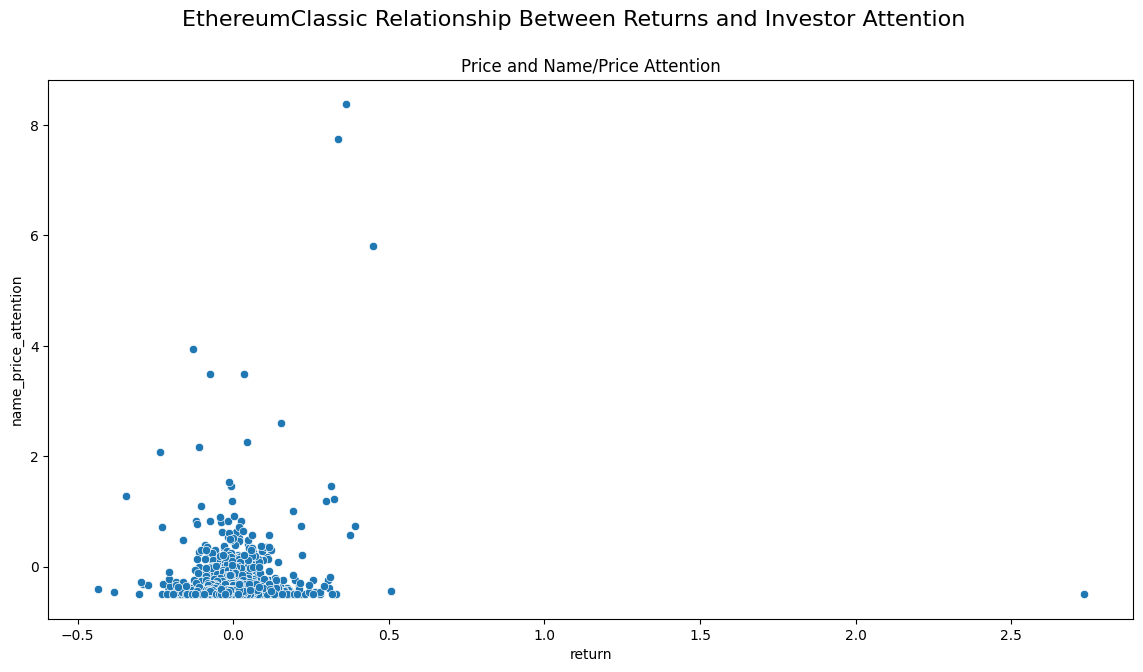

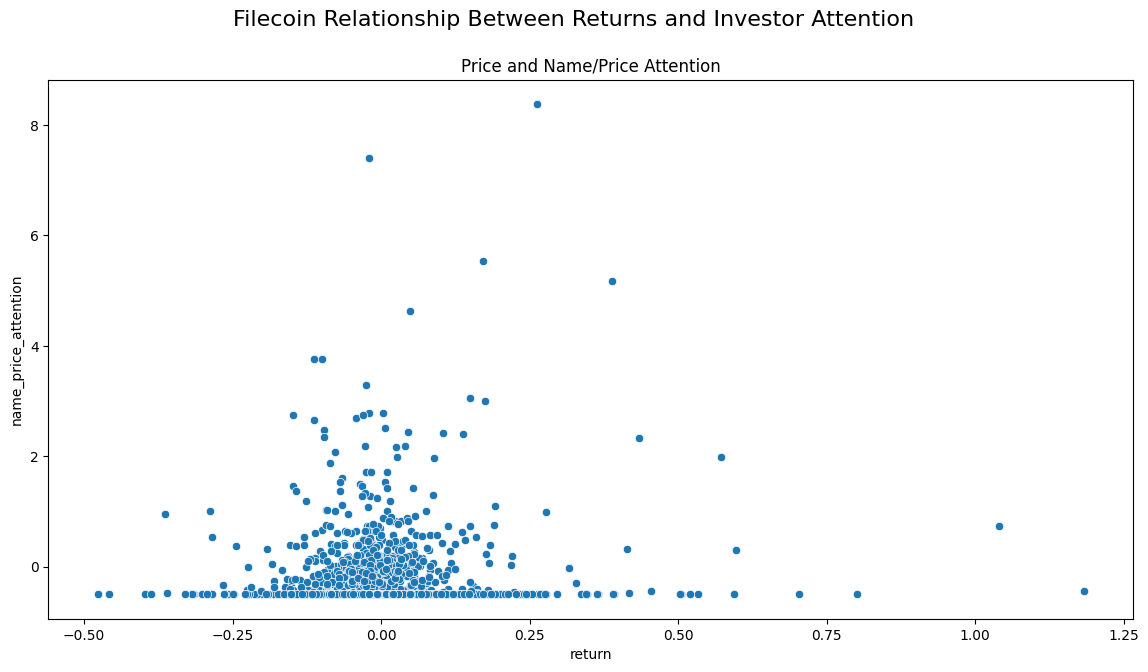

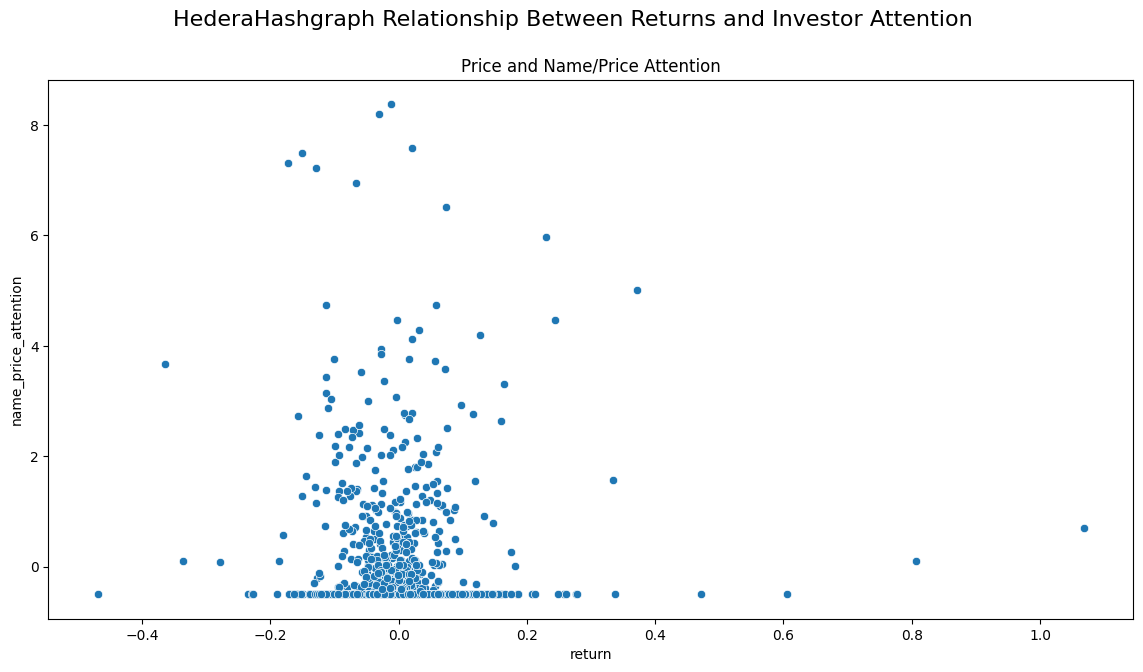

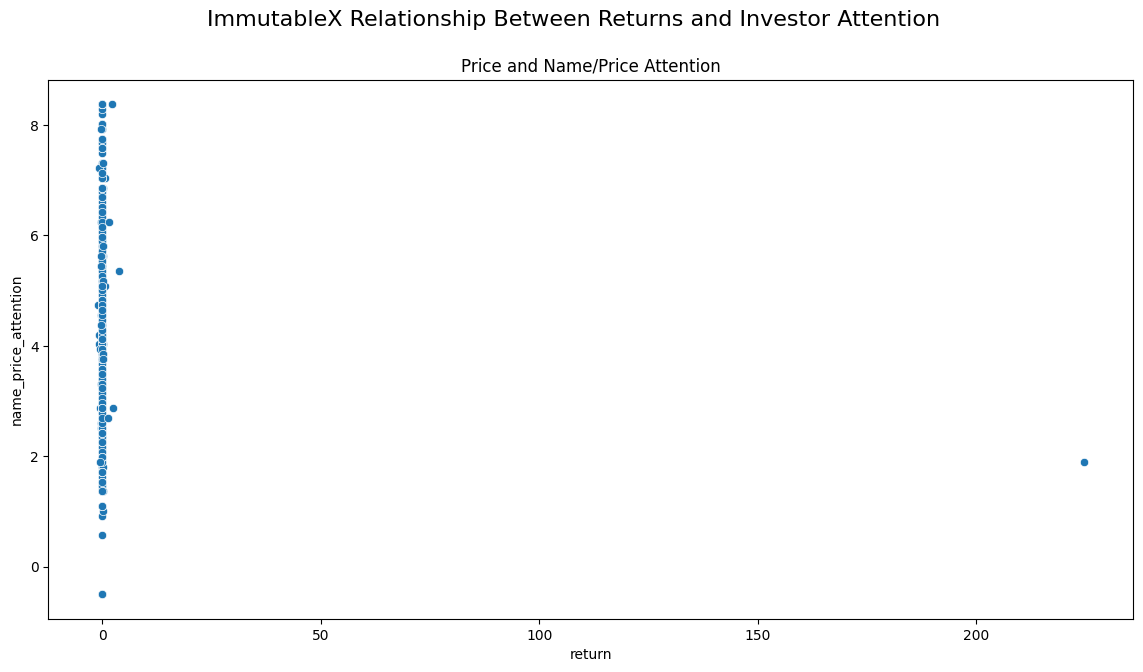

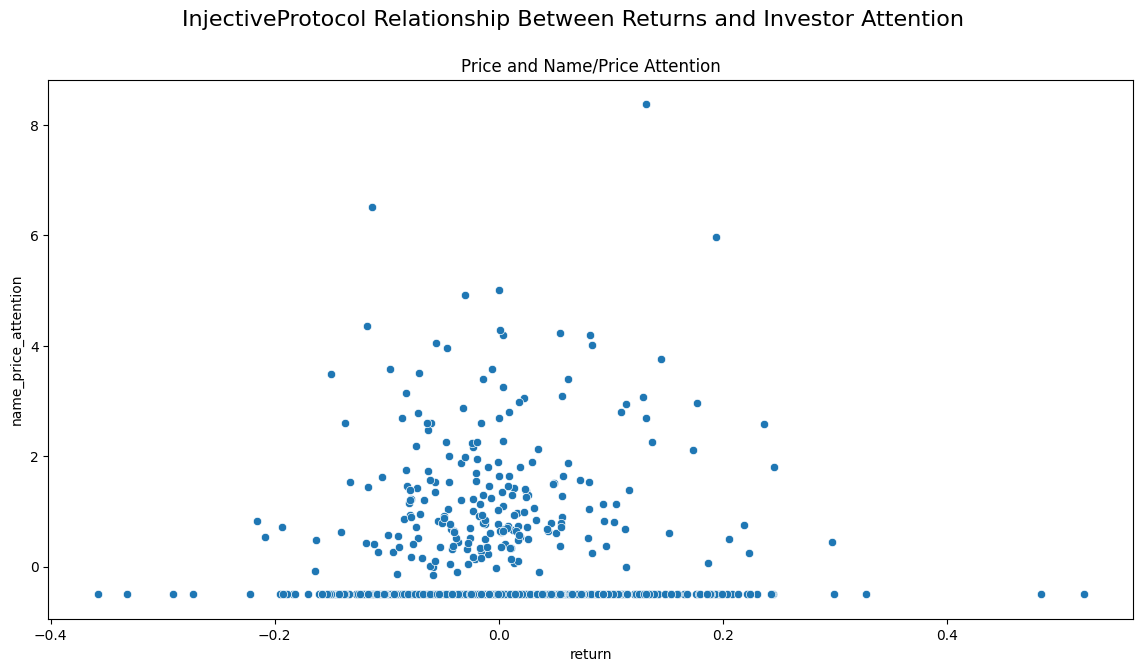

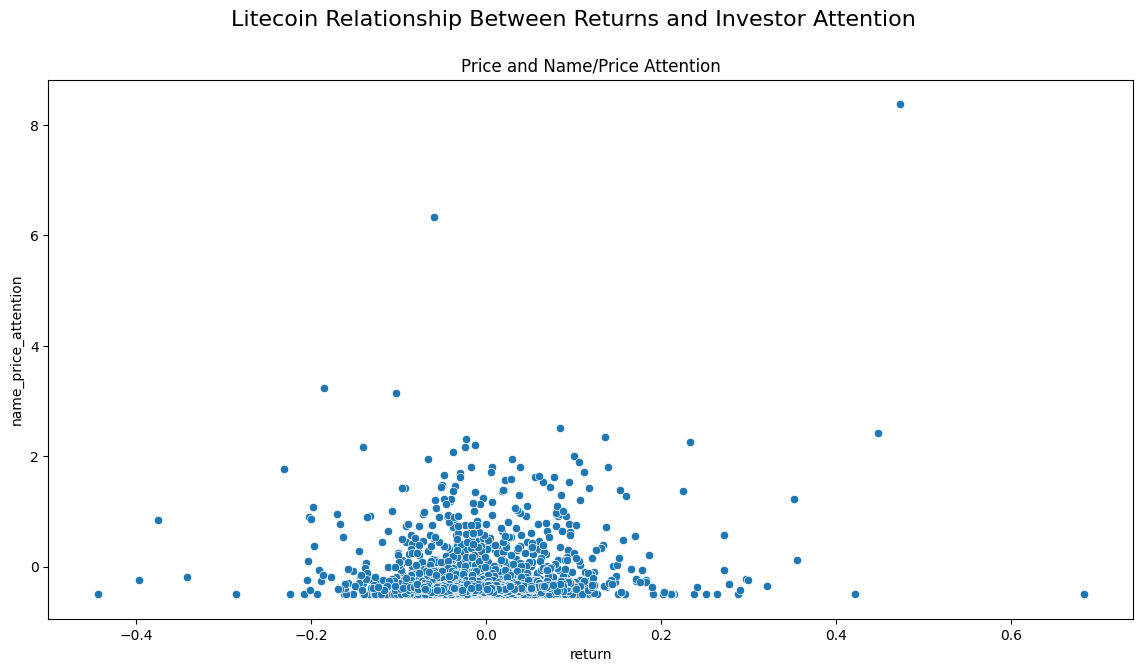

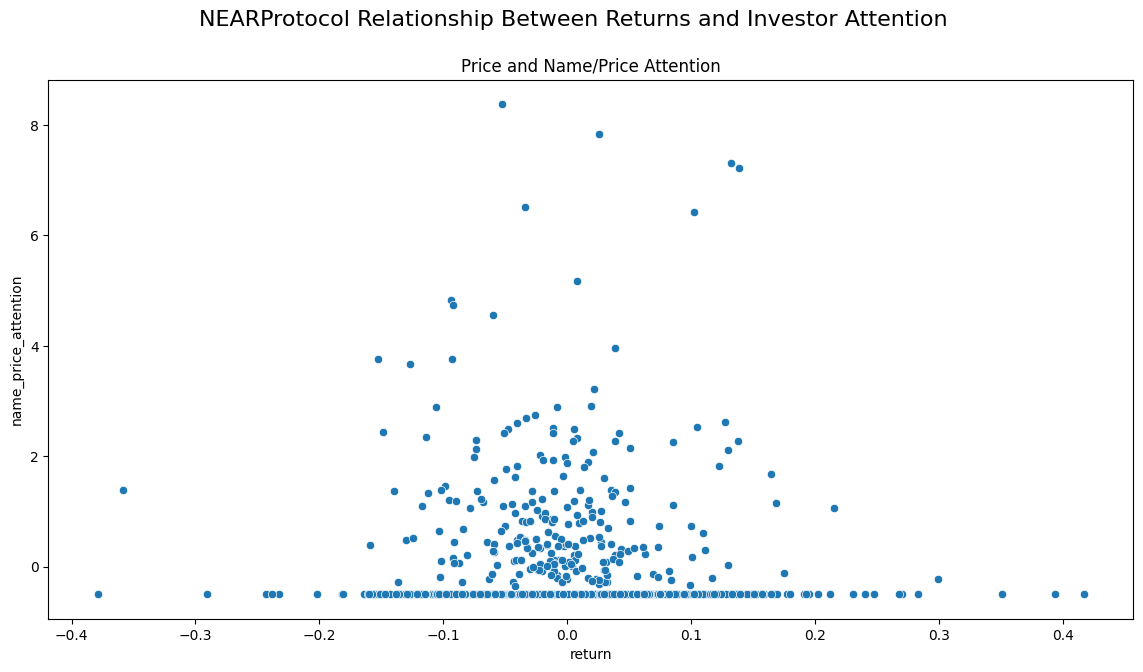

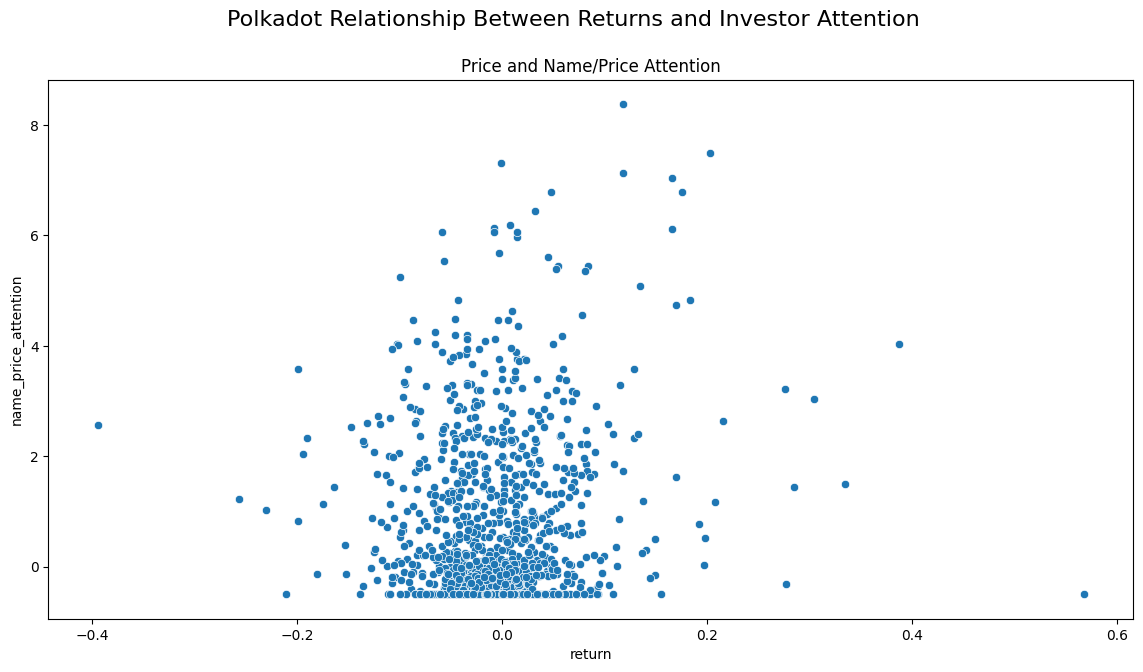

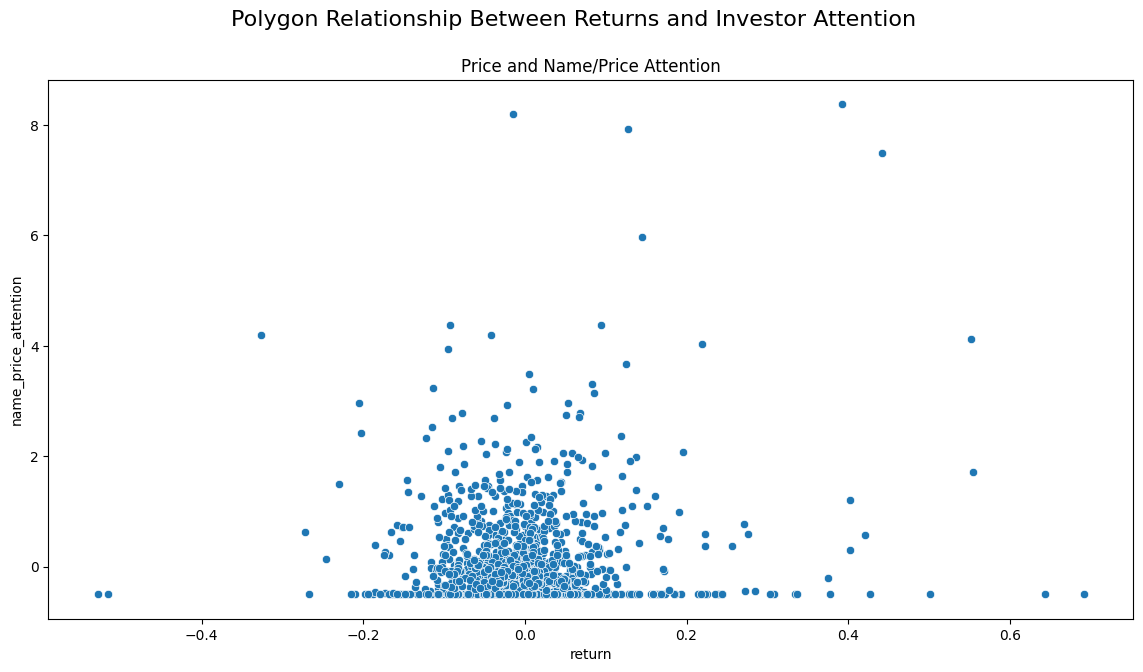

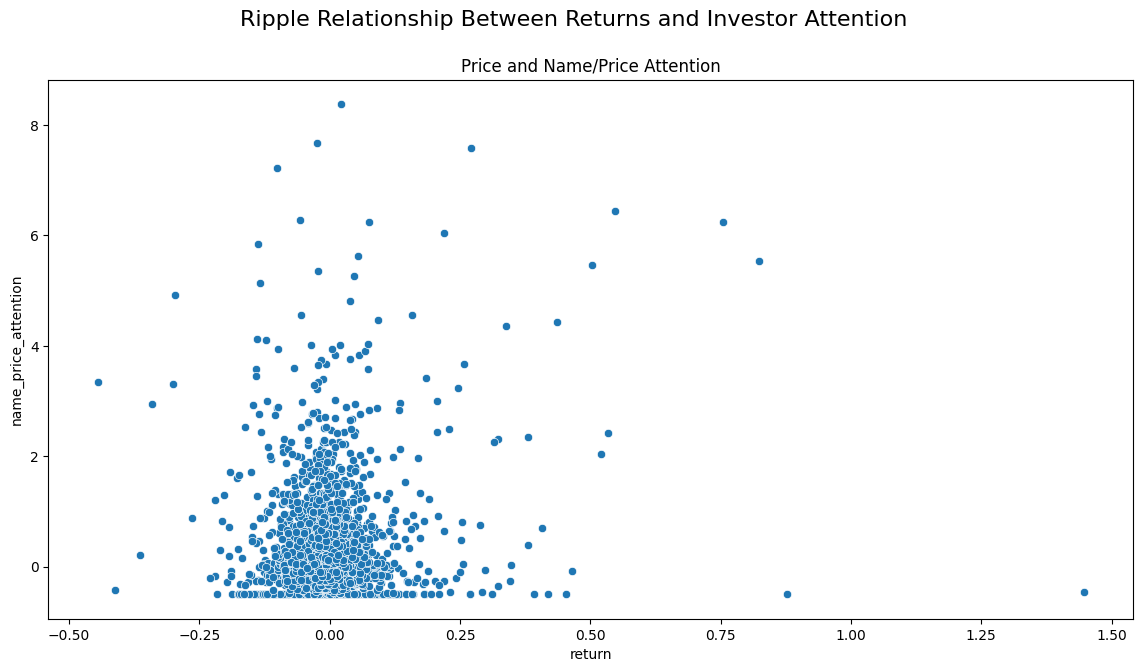

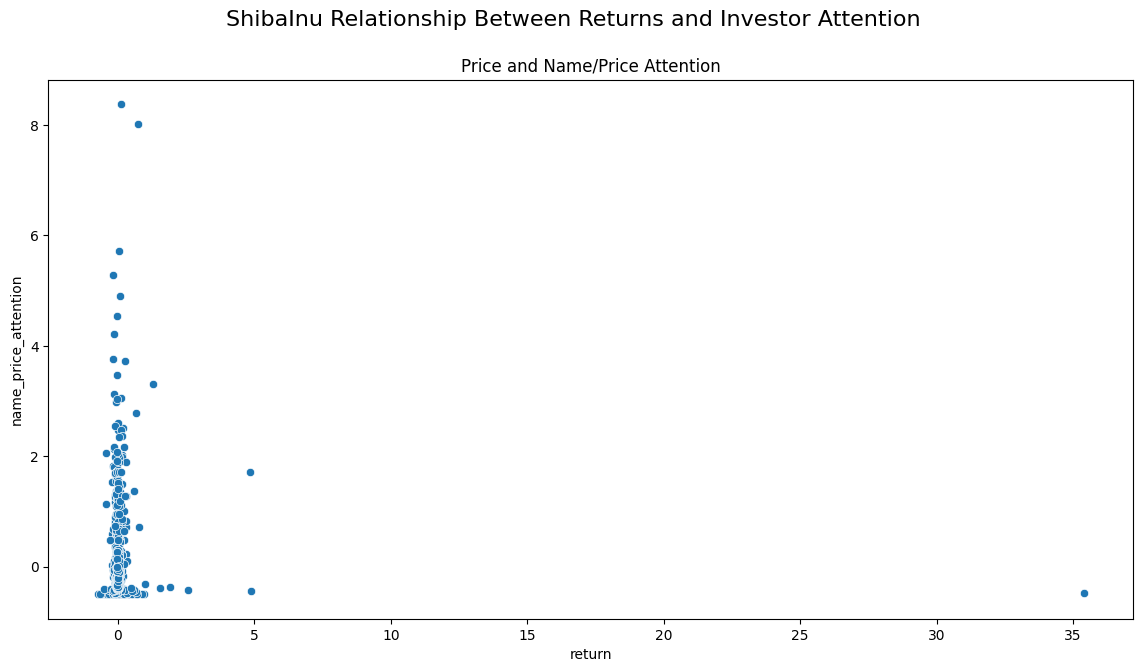

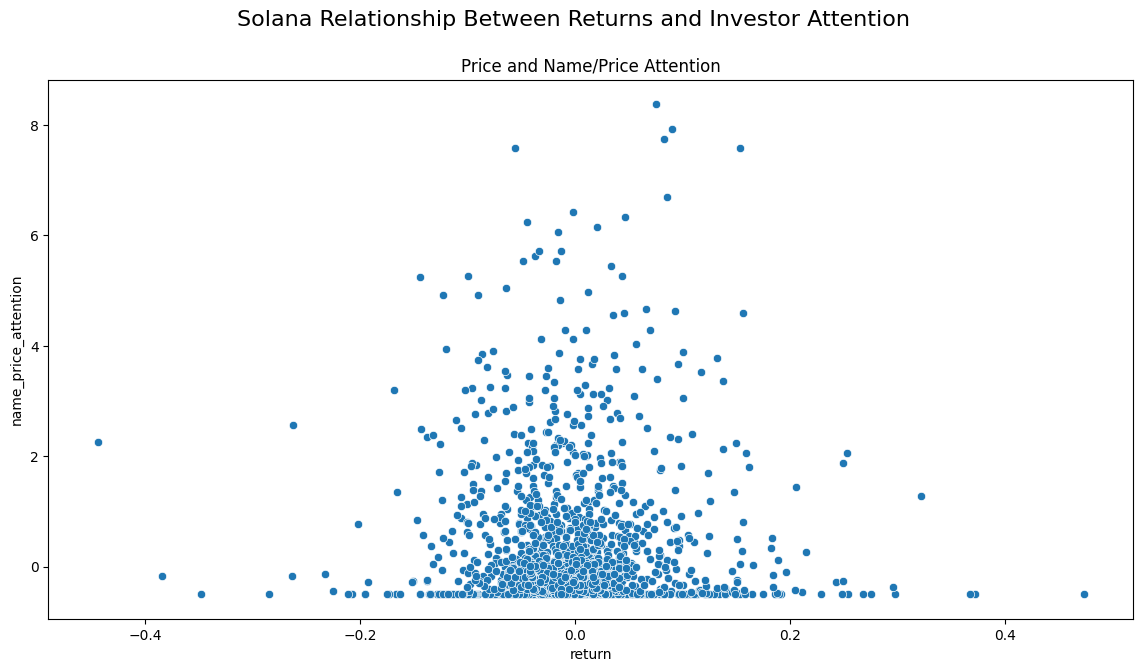

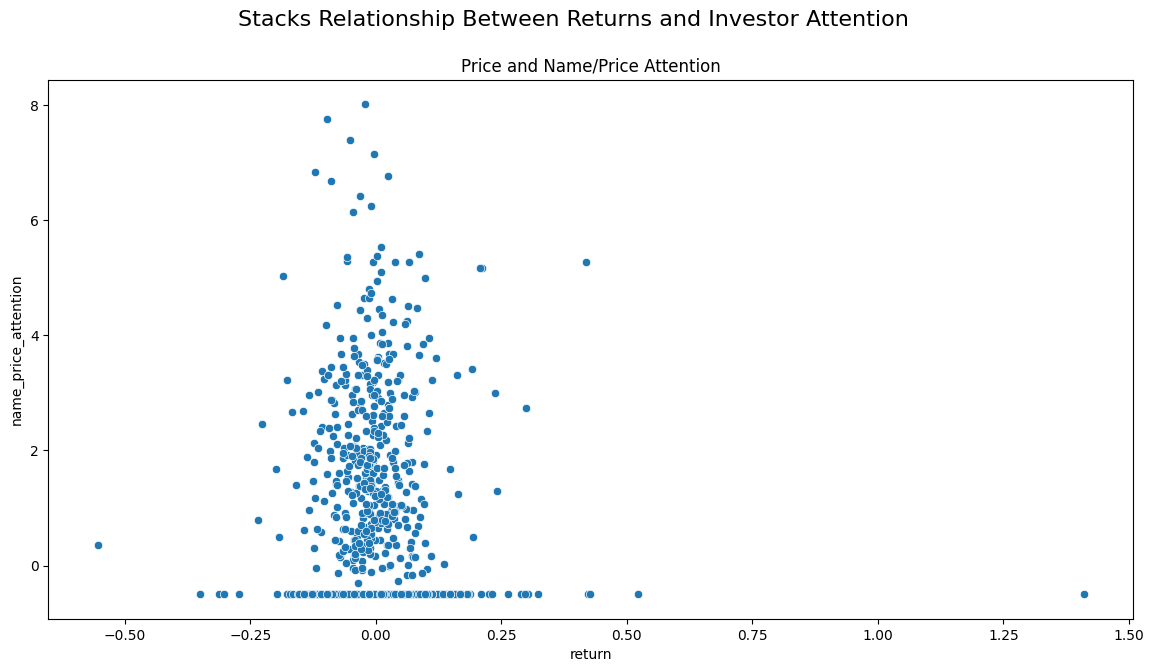

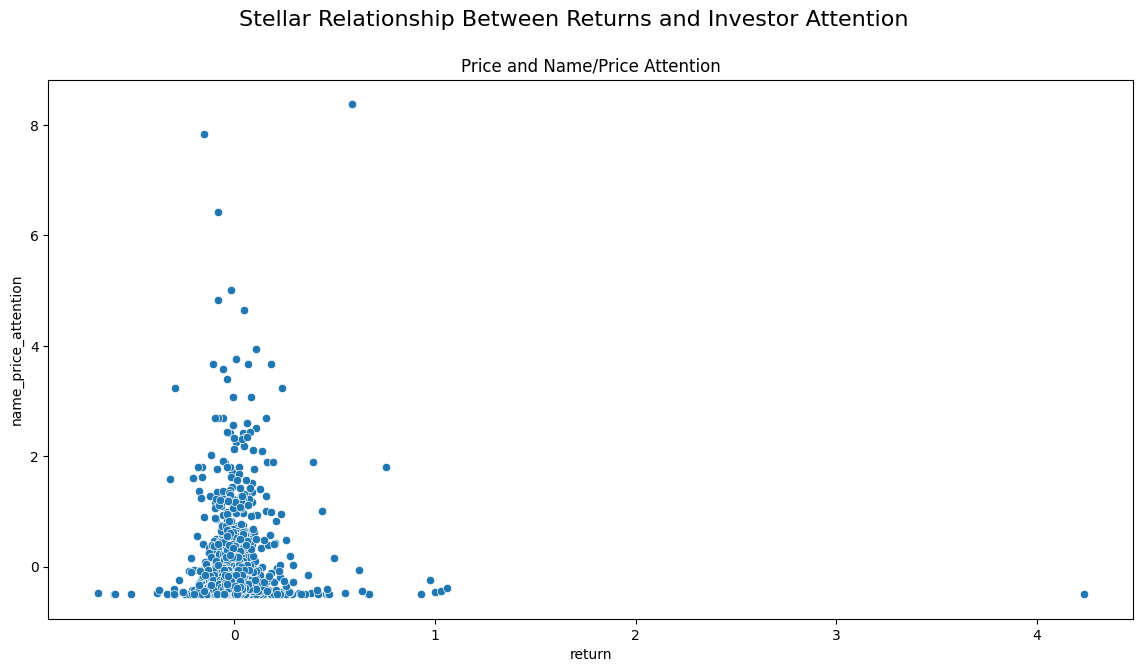

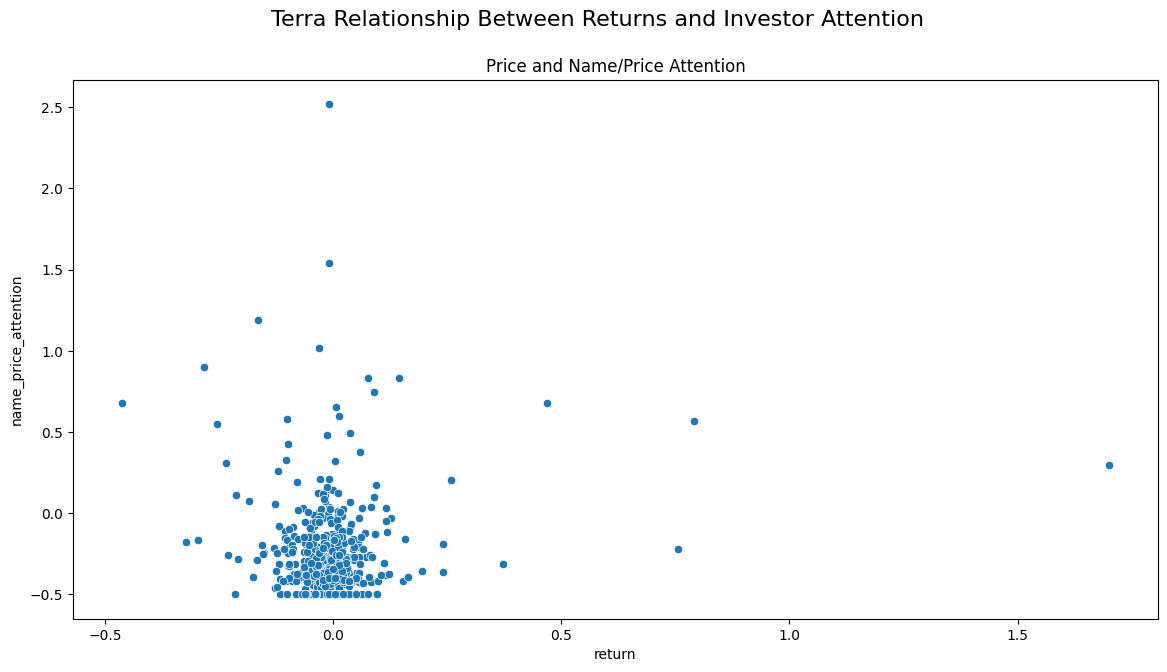

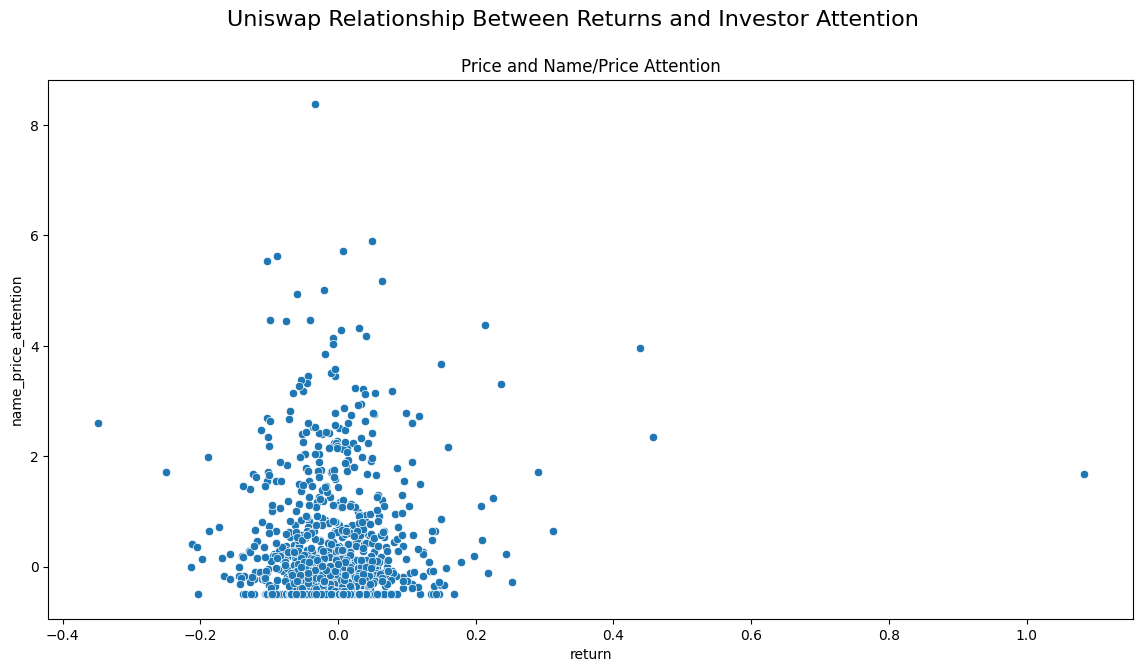

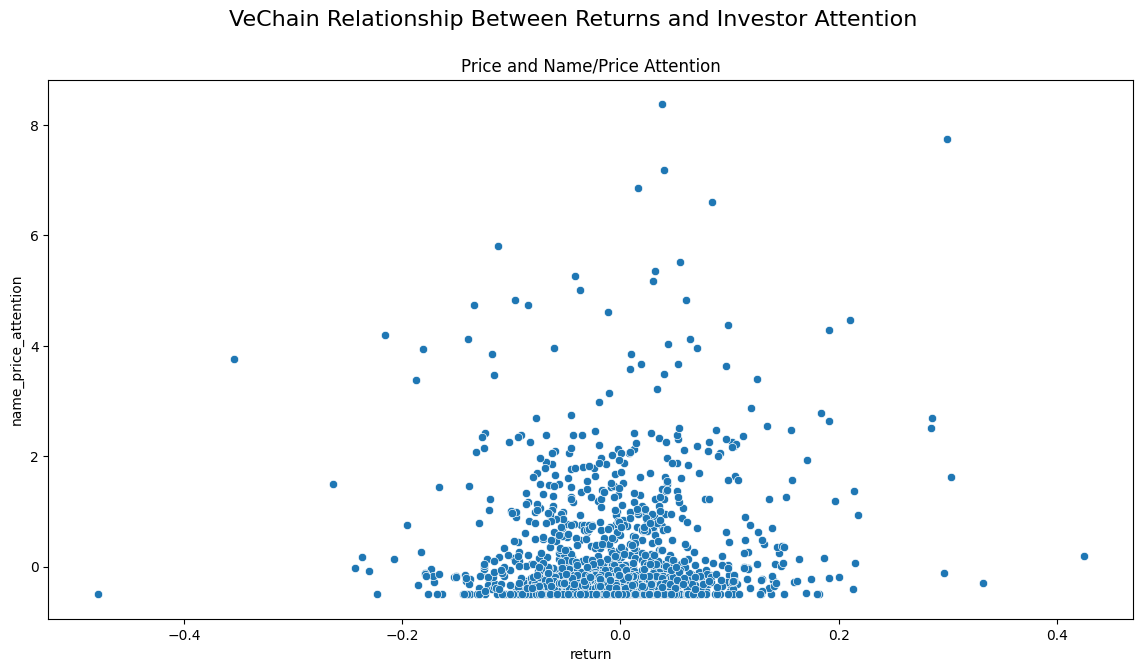

In [28]:
for currency in crypto:
    stock_data = data[data['crypto_name'] == currency]
    fig, ax = plt.subplots(1, figsize=(14, 7))
    fig.suptitle(f'{currency} Relationship Between Returns and Investor Attention', fontsize=16)
    sns.scatterplot(x=stock_data['return'], y=stock_data['name_price_attention'], ax=ax)
    ax.set_title('Price and Name/Price Attention')
    plt.show()